In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
df = pd.read_excel('/Users/yolanda/Downloads/excel_file1.xlsx')
df.set_index('year_month', inplace=True)

v = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_2.xlsx')
v.set_index('year_month', inplace=True)
w = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_4.xlsx')
w.set_index('year_month', inplace=True)
z = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_5.xlsx')
z.set_index('year_month', inplace=True)

In [3]:
df

Temperature  Precipitation  Discharge  Abstraction  \
year_month                                                       
1950-01-01        23.90           95.9        NaN          NaN   
1950-02-01        25.10           52.8        NaN          NaN   
1950-03-01        23.75           71.4        NaN          NaN   
1950-04-01        19.65           58.6        NaN          NaN   
1950-05-01        14.60           27.7        NaN          NaN   
...                 ...            ...        ...          ...   
2019-08-01          NaN            NaN        NaN          NaN   
2019-09-01          NaN            NaN        NaN          NaN   
2019-10-01          NaN            NaN        NaN          NaN   
2019-11-01          NaN            NaN        NaN          NaN   
2019-12-01          NaN            NaN        NaN          NaN   

            scenario_usage  scenario_precip100  scenario_precip200  \
year_month                                                           
1950-01-01             NaN                95.9                95.9   
1950-02-01             NaN                52.8                52.8   
1950-03-01             NaN                71.4                71.4   
1950-04-01             NaN                58.6                58.6   
1950-05-01             NaN                27.7                27.7   
...                    ...                 ...                 ...   
2019-08-01             0.0                 0.0                 0.0   
2019-09-01             0.0                 0.0                 0.0   
2019-10-01             0.0                 0.0                 0.0   
2019-11-01             0.0                 0.0                 0.0   
2019-12-01             0.0                 0.0                 0.0   

            scenario_preciphalf  precip_trend  trend_scenario100  \
year_month                                                         
1950-01-01                47.95           NaN                NaN   
1950-02-01                26.40           NaN                NaN   
1950-03-01                35.70           NaN                NaN   
1950-04-01                29.30           NaN                NaN   
1950-05-01                13.85           NaN                NaN   
...                         ...           ...                ...   
2019-08-01                 0.00           NaN                NaN   
2019-09-01                 0.00           NaN                NaN   
2019-10-01                 0.00           NaN                NaN   
2019-11-01                 0.00           NaN                NaN   
2019-12-01                 0.00           NaN                NaN   

            trend_scenario200  trend_scenariohalf  
year_month                                         
1950-01-01                NaN                 NaN  
1950-02-01                NaN                 NaN  
1950-03-01                NaN                 NaN  
1950-04-01                NaN                 NaN  
1950-05-01                NaN                 NaN  
...                       ...                 ...  
2019-08-01                NaN                 NaN  
2019-09-01                NaN                 NaN  
2019-10-01                NaN                 NaN  
2019-11-01                NaN                 NaN  
2019-12-01                NaN                 NaN  

[840 rows x 12 columns]

In [5]:
df['Abstraction'] = w['Usage']
df['D4N0834'] = w[' D4N0834']
df['D4N0111'] = v[' D4N0111']
df['D4N0122'] = v[' D4N0122']
df['D4N0037'] = v[' D4N0037']
df['D4N0115'] = z[' D4N0115']
df['D4N0110'] = z[' D4N0110']
df['D4N0112'] = z[' D4N0112']

In [6]:
df

Temperature  Precipitation  Discharge  Abstraction  \
year_month                                                       
1950-01-01        23.90           95.9        NaN          NaN   
1950-02-01        25.10           52.8        NaN          NaN   
1950-03-01        23.75           71.4        NaN          NaN   
1950-04-01        19.65           58.6        NaN          NaN   
1950-05-01        14.60           27.7        NaN          NaN   
...                 ...            ...        ...          ...   
2019-08-01          NaN            NaN        NaN          NaN   
2019-09-01          NaN            NaN        NaN          NaN   
2019-10-01          NaN            NaN        NaN          NaN   
2019-11-01          NaN            NaN        NaN          NaN   
2019-12-01          NaN            NaN        NaN          NaN   

            scenario_usage  scenario_precip100  scenario_precip200  \
year_month                                                           
1950-01-01             NaN                95.9                95.9   
1950-02-01             NaN                52.8                52.8   
1950-03-01             NaN                71.4                71.4   
1950-04-01             NaN                58.6                58.6   
1950-05-01             NaN                27.7                27.7   
...                    ...                 ...                 ...   
2019-08-01             0.0                 0.0                 0.0   
2019-09-01             0.0                 0.0                 0.0   
2019-10-01             0.0                 0.0                 0.0   
2019-11-01             0.0                 0.0                 0.0   
2019-12-01             0.0                 0.0                 0.0   

            scenario_preciphalf  precip_trend  trend_scenario100  \
year_month                                                         
1950-01-01                47.95           NaN                NaN   
1950-02-01                26.40           NaN                NaN   
1950-03-01                35.70           NaN                NaN   
1950-04-01                29.30           NaN                NaN   
1950-05-01                13.85           NaN                NaN   
...                         ...           ...                ...   
2019-08-01                 0.00           NaN                NaN   
2019-09-01                 0.00           NaN                NaN   
2019-10-01                 0.00           NaN                NaN   
2019-11-01                 0.00           NaN                NaN   
2019-12-01                 0.00           NaN                NaN   

            trend_scenario200  trend_scenariohalf  D4N0834  D4N0111  D4N0122  \
year_month                                                                     
1950-01-01                NaN                 NaN      NaN      NaN      NaN   
1950-02-01                NaN                 NaN      NaN      NaN      NaN   
1950-03-01                NaN                 NaN      NaN      NaN      NaN   
1950-04-01                NaN                 NaN      NaN      NaN      NaN   
1950-05-01                NaN                 NaN      NaN      NaN      NaN   
...                       ...                 ...      ...      ...      ...   
2019-08-01                NaN                 NaN      NaN      NaN      NaN   
2019-09-01                NaN                 NaN      NaN      NaN      NaN   
2019-10-01                NaN                 NaN      NaN      NaN      NaN   
2019-11-01                NaN                 NaN      NaN      NaN      NaN   
2019-12-01                NaN                 NaN      NaN      NaN      NaN   

            D4N0037  D4N0115  D4N0110  D4N0112  
year_month                                      
1950-01-01      NaN      NaN      NaN      NaN  
1950-02-01      NaN      NaN      NaN      NaN  
1950-03-01      NaN      NaN      NaN      NaN  
1950-04-01      NaN      NaN      NaN      NaN  
1950-05-01      NaN   

In [7]:
df = df[['D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110','D4N0112' ,'Temperature' ,'precip_trend' ,'Discharge' ,'Abstraction']]

In [8]:
df

D4N0834  D4N0111  D4N0122  D4N0037  D4N0115  D4N0110  D4N0112  \
year_month                                                                  
1950-01-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1950-02-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1950-03-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1950-04-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1950-05-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
...             ...      ...      ...      ...      ...      ...      ...   
2019-08-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2019-09-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2019-10-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2019-11-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2019-12-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

            Temperature  precip_trend  Discharge  Abstraction  
year_month                                                     
1950-01-01        23.90           NaN        NaN          NaN  
1950-02-01        25.10           NaN        NaN          NaN  
1950-03-01        23.75           NaN        NaN          NaN  
1950-04-01        19.65           NaN        NaN          NaN  
1950-05-01        14.60           NaN        NaN          NaN  
...                 ...           ...        ...          ...  
2019-08-01          NaN           NaN        NaN          NaN  
2019-09-01          NaN           NaN        NaN          NaN  
2019-10-01          NaN           NaN        NaN          NaN  
2019-11-01          NaN           NaN        NaN          NaN  
2019-12-01          NaN           NaN        NaN          NaN  

[840 rows x 11 columns]

In [9]:
f = lambda x: -x; 
gwls = df[['D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110', 'D4N0112']].apply(f, axis=1)

#### checking when each varibale starts and ends 

In [10]:
result_dict = {}
def check_date(column):
    x = column.notnull()
    print(type(column[x]))
    result_dict[column.name] = [column[x].head(1).index[0], 
    column[x].tail(1).index[0]]
    
gwls.apply(check_date)
dates = pd.DataFrame(result_dict)
dates

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


D4N0834    D4N0111    D4N0122    D4N0037    D4N0115    D4N0110    D4N0112
0 1986-09-01 1976-01-01 1975-05-01 1973-08-01 1975-05-01 1976-11-01 1977-01-01
1 2005-01-01 2009-11-01 2003-11-01 2012-02-01 2005-03-01 2000-01-01 2003-08-01

#### Limiting period based on minimum start of all 6 bh's and maximum finish of all 6 bh's

In [11]:

gwls = gwls[gwls.index > '1974-01-01']  
gwls = gwls[gwls.index < '2012-03-01']  

#### These boreholes are the onles with less that 32% missing data. 

Text(0, 0.5, 'Groundwater levels')

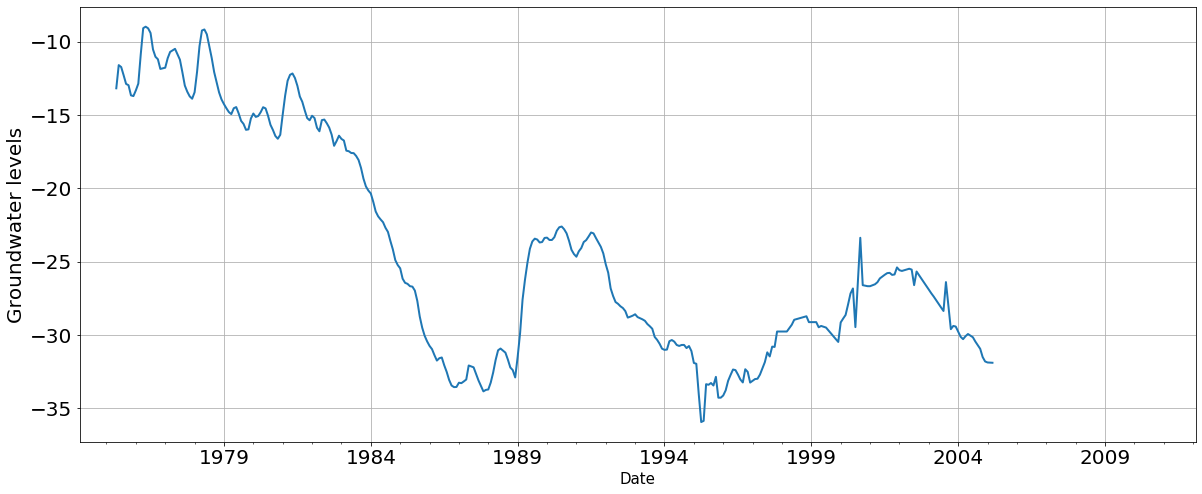

In [12]:
#visual illustration just to show all groundwater levels 

gwls['D4N0115'].plot(figsize=(20,8), linewidth=2, fontsize = 20, grid=True);
plt.xlabel("Date",fontsize=15)
plt.ylabel("Groundwater levels",fontsize=20)


In [13]:
gwls['Temperature'] = df['Temperature']
gwls['precip_trend'] = df['precip_trend']
gwls['Discharge'] = df['Discharge']
gwls['Abstraction'] = df['Abstraction']
gwls

D4N0834  D4N0111  D4N0122    D4N0037  D4N0115  D4N0110  D4N0112  \
year_month                                                                    
1974-02-01      NaN      NaN      NaN -20.347500      NaN      NaN      NaN   
1974-03-01      NaN      NaN      NaN -19.760000      NaN      NaN      NaN   
1974-04-01      NaN      NaN      NaN -19.440000      NaN      NaN      NaN   
1974-05-01      NaN      NaN      NaN -19.250000      NaN      NaN      NaN   
1974-06-01      NaN      NaN      NaN -19.170000      NaN      NaN      NaN   
...             ...      ...      ...        ...      ...      ...      ...   
2011-10-01      NaN      NaN      NaN -30.700000      NaN      NaN      NaN   
2011-11-01      NaN      NaN      NaN -30.069891      NaN      NaN      NaN   
2011-12-01      NaN      NaN      NaN -29.460109      NaN      NaN      NaN   
2012-01-01      NaN      NaN      NaN -28.830000      NaN      NaN      NaN   
2012-02-01      NaN      NaN      NaN -28.850000      NaN      NaN      NaN   

            Temperature  precip_trend  Discharge   Abstraction  
year_month                                                      
1974-02-01        23.50     71.141667      0.079  7.444367e+04  
1974-03-01        21.75     68.741667      0.211  7.444367e+04  
1974-04-01        18.25     70.870833      0.399  7.444367e+04  
1974-05-01        14.70     70.804167      0.520  7.444367e+04  
1974-06-01        12.60     63.408333      0.528  7.444367e+04  
...                 ...           ...        ...           ...  
2011-10-01        19.30     44.183333      0.644  2.424806e+06  
2011-11-01        21.50     38.333333      0.633  2.424806e+06  
2011-12-01        22.00     35.783333      0.629  2.424806e+06  
2012-01-01        23.35     34.008333      0.612  2.417254e+06  
2012-02-01        22.70     33.908333      0.588  2.417254e+06  

[457 rows x 11 columns]

### Reframing length of dataset based on bhid D4N0115 start and end dates 

In [14]:
pima = gwls.filter(['D4N0115', 'Temperature', 'precip_trend', 'Discharge', 'Abstraction'])
pima = pima[pima.index > '1975-04-01']  
pima = pima[pima.index < '2005-04-01'] 

In [15]:
pima.apply(lambda x: sum(x.isnull()), axis=0)

D4N0115          0
Temperature     13
precip_trend     0
Discharge       65
Abstraction      0
dtype: int64

#### Interpolating independant varibales only 

In [16]:
pima['Discharge']= pima['Discharge'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())
pima['precip_trend']= pima['precip_trend'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())
pima['Temperature']= pima['Temperature'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())

#### Calculating start and end dates for new dataframa

In [17]:
result_dict = {}
def check_date(column):
    x = column.notnull()
    print(type(column[x]))
    result_dict[column.name] = [column[x].head(1).index[0], 
    column[x].tail(1).index[0]]
    
pima.apply(check_date)
dates = pd.DataFrame(result_dict)
dates

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


D4N0115 Temperature precip_trend  Discharge Abstraction
0 1975-05-01  1975-05-01   1975-05-01 1975-05-01  1975-05-01
1 2005-03-01  2005-03-01   2005-03-01 2005-03-01  2005-03-01

### Mutual information stats

In [18]:
from sklearn.feature_selection import mutual_info_regression

In [19]:
X = pima[['Temperature', 'precip_trend', 'Discharge','Abstraction']] # Features
y = pima[['D4N0115']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110' 

In [20]:
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Temperature     0.025580
precip_trend    0.354495
Discharge       0.751652
Abstraction     1.000000
dtype: float64

## LAG TESTING 

In [21]:
precip1  = pima.filter(['D4N0115', 'precip_trend'])
discha1 = pima.filter(['D4N0115', 'Discharge'])
temp1   = pima.filter(['D4N0115', 'Temperature'])
abstr1   = pima.filter(['D4N0115', 'Abstraction'])

In [22]:
lags = range(1, 24)  # 2year lag

# precip_trend
precip = precip1.assign(**{ '{} (t-{})'.format([ 'precip_trend'], t): precip1[[ 'precip_trend']].shift(t) for t in lags for col in precip1})
# disharge
discha = discha1.assign(**{ '{} (t-{})'.format([ 'Discharge'], t): discha1[[ 'Discharge']].shift(t) for t in lags for col in discha1})
# temperature
temp = temp1.assign(**{ '{} (t-{})'.format([ 'Temperature'], t): temp1[[ 'Temperature']].shift(t) for t in lags for col in temp1})
# abstraction
abstr = abstr1.assign(**{ '{} (t-{})'.format([ 'Abstraction'], t): abstr1[[ 'Abstraction']].shift(t) for t in lags for col in abstr1})

## Cross Correlation

- degree of similarity between two time series in different times or space 
- lag is considred since time is under investigation

### Rainfall

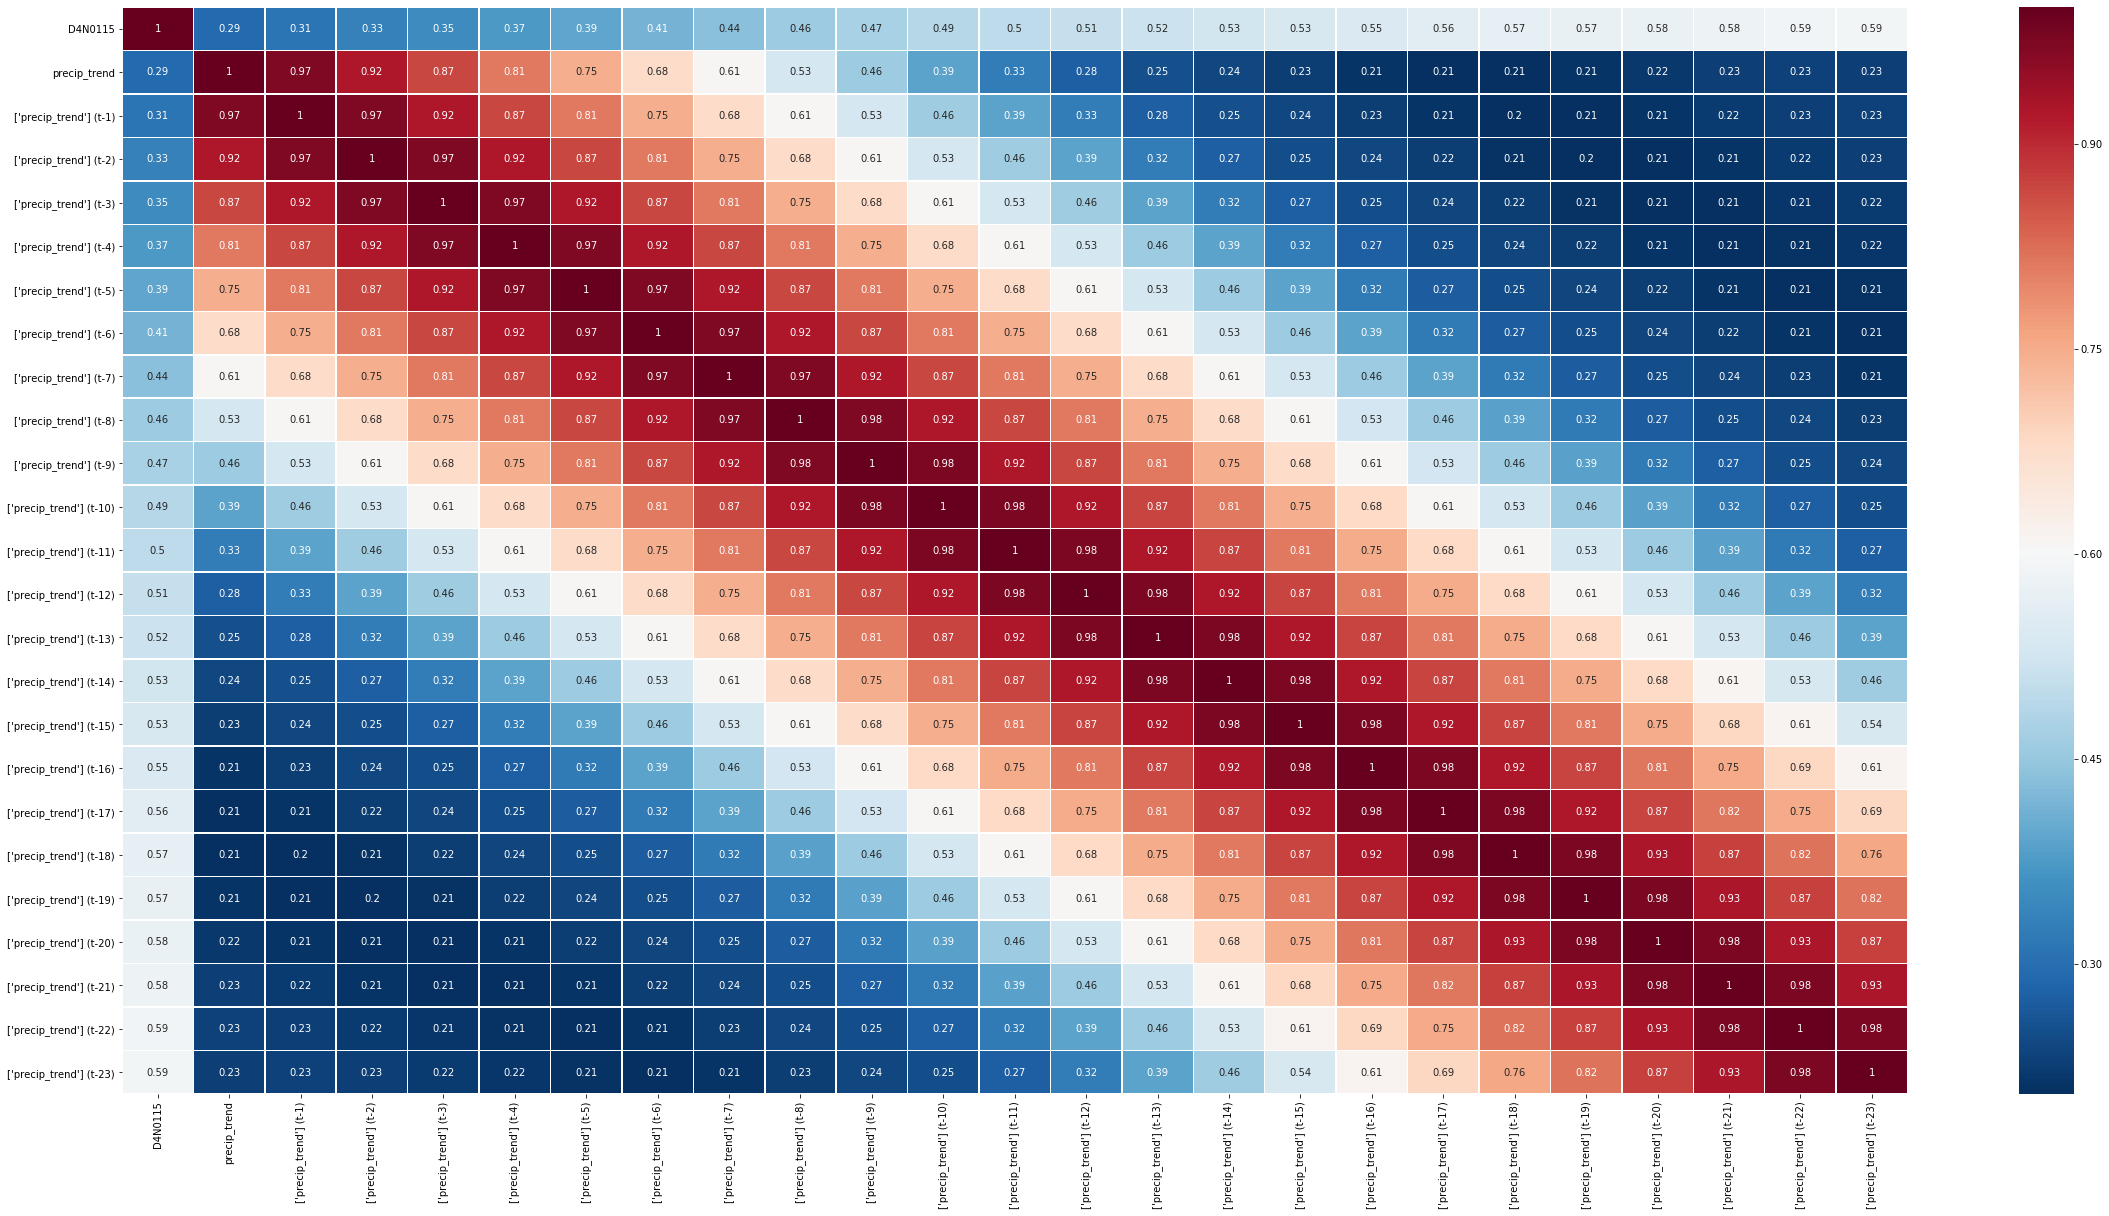

In [23]:
# precip0834 , 0111, 0122 , 0037, 0115, 0110

import seaborn as sns
corrm1 = precip.corr(method = 'spearman')
corrm2 = precip.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm2.columns,
            yticklabels=corrm2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

### Discharge

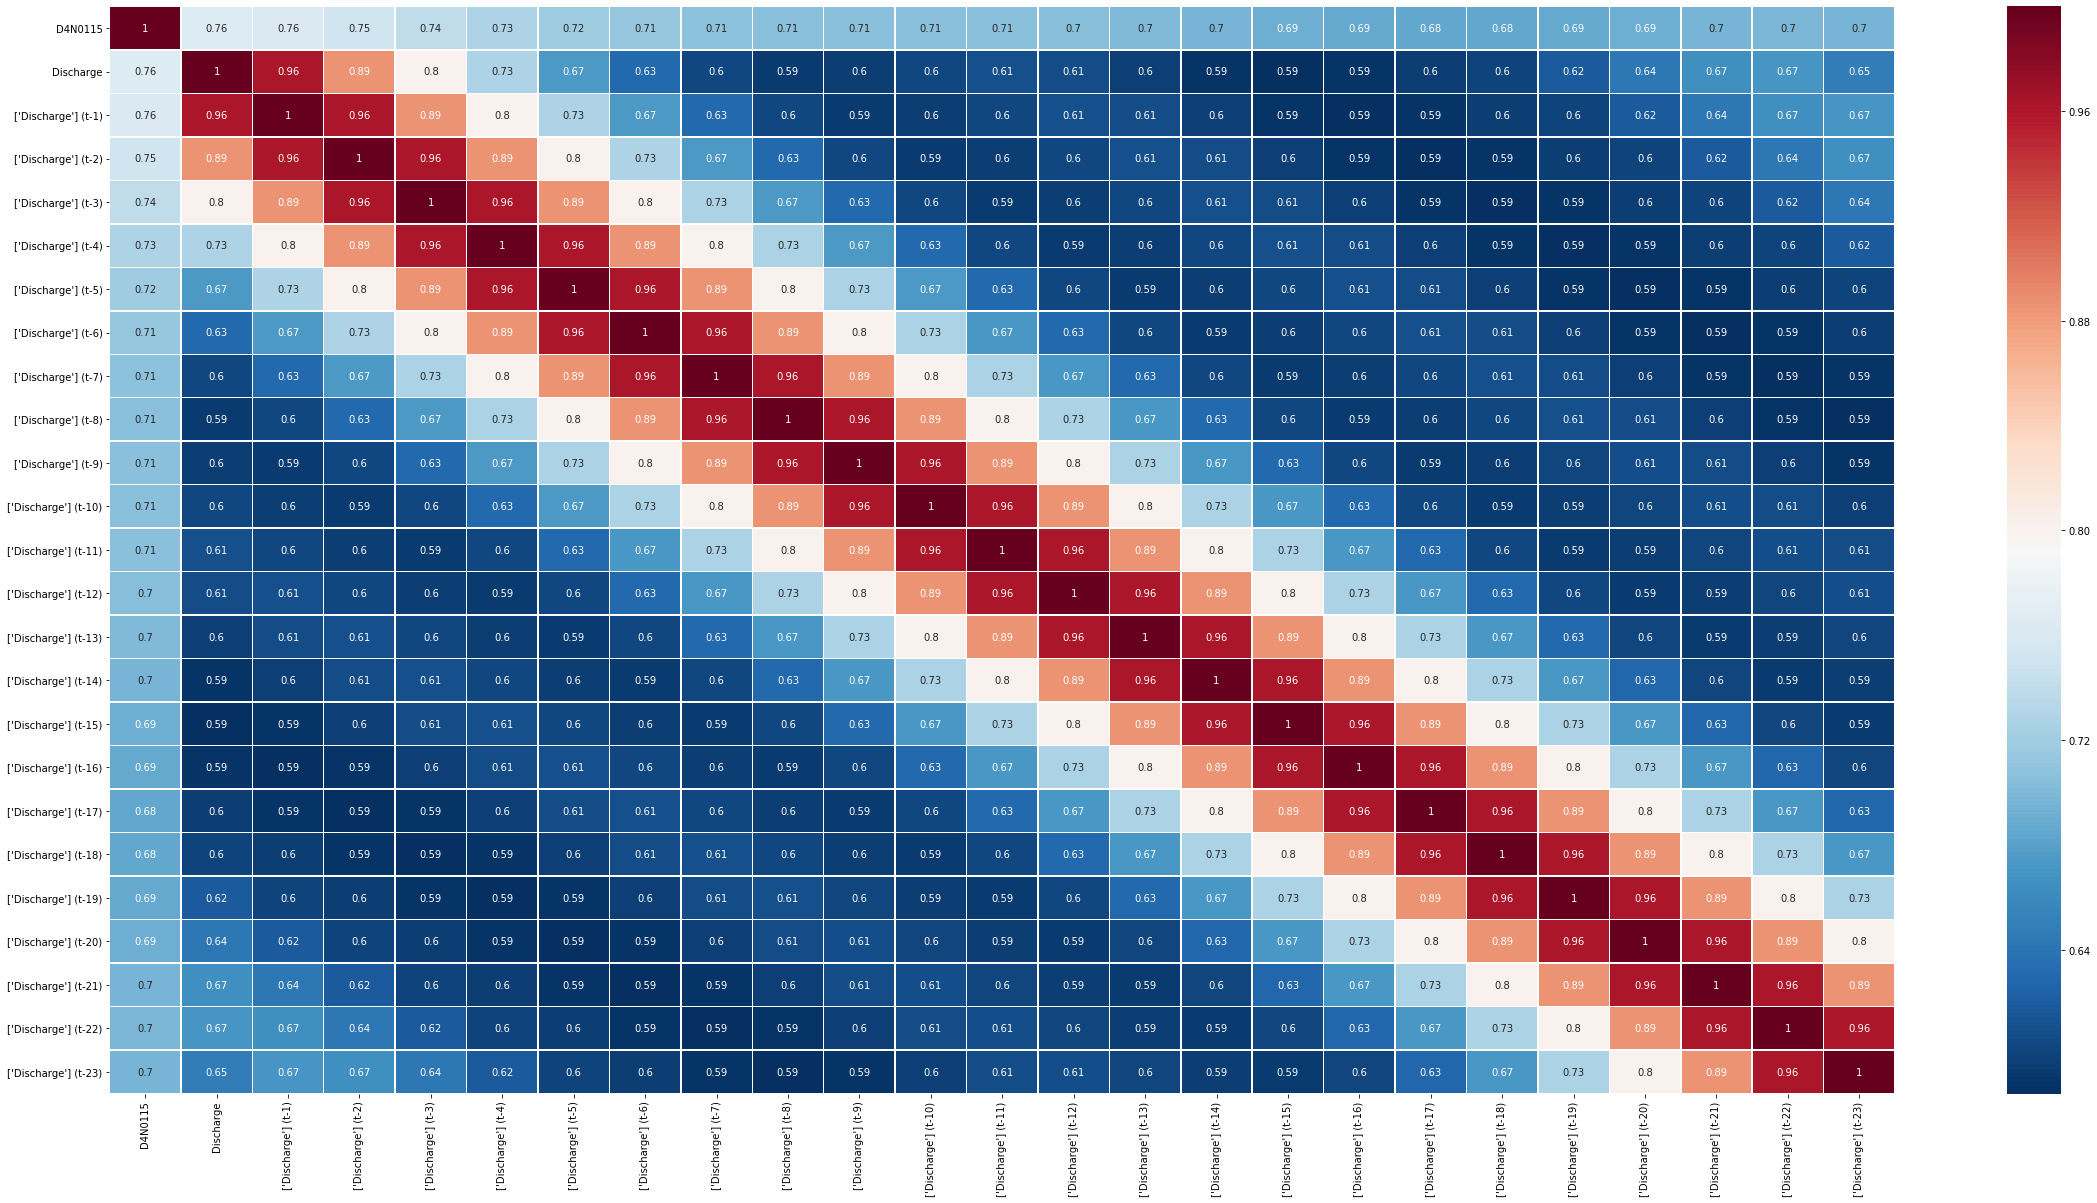

In [24]:
# temp0834 , 0111, 0122 , 0037, 0115, 0110

import seaborn as sns
corrm1 = discha.corr(method = 'spearman')
corrm2 = discha.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm2.columns,
            yticklabels=corrm2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

### Temperature

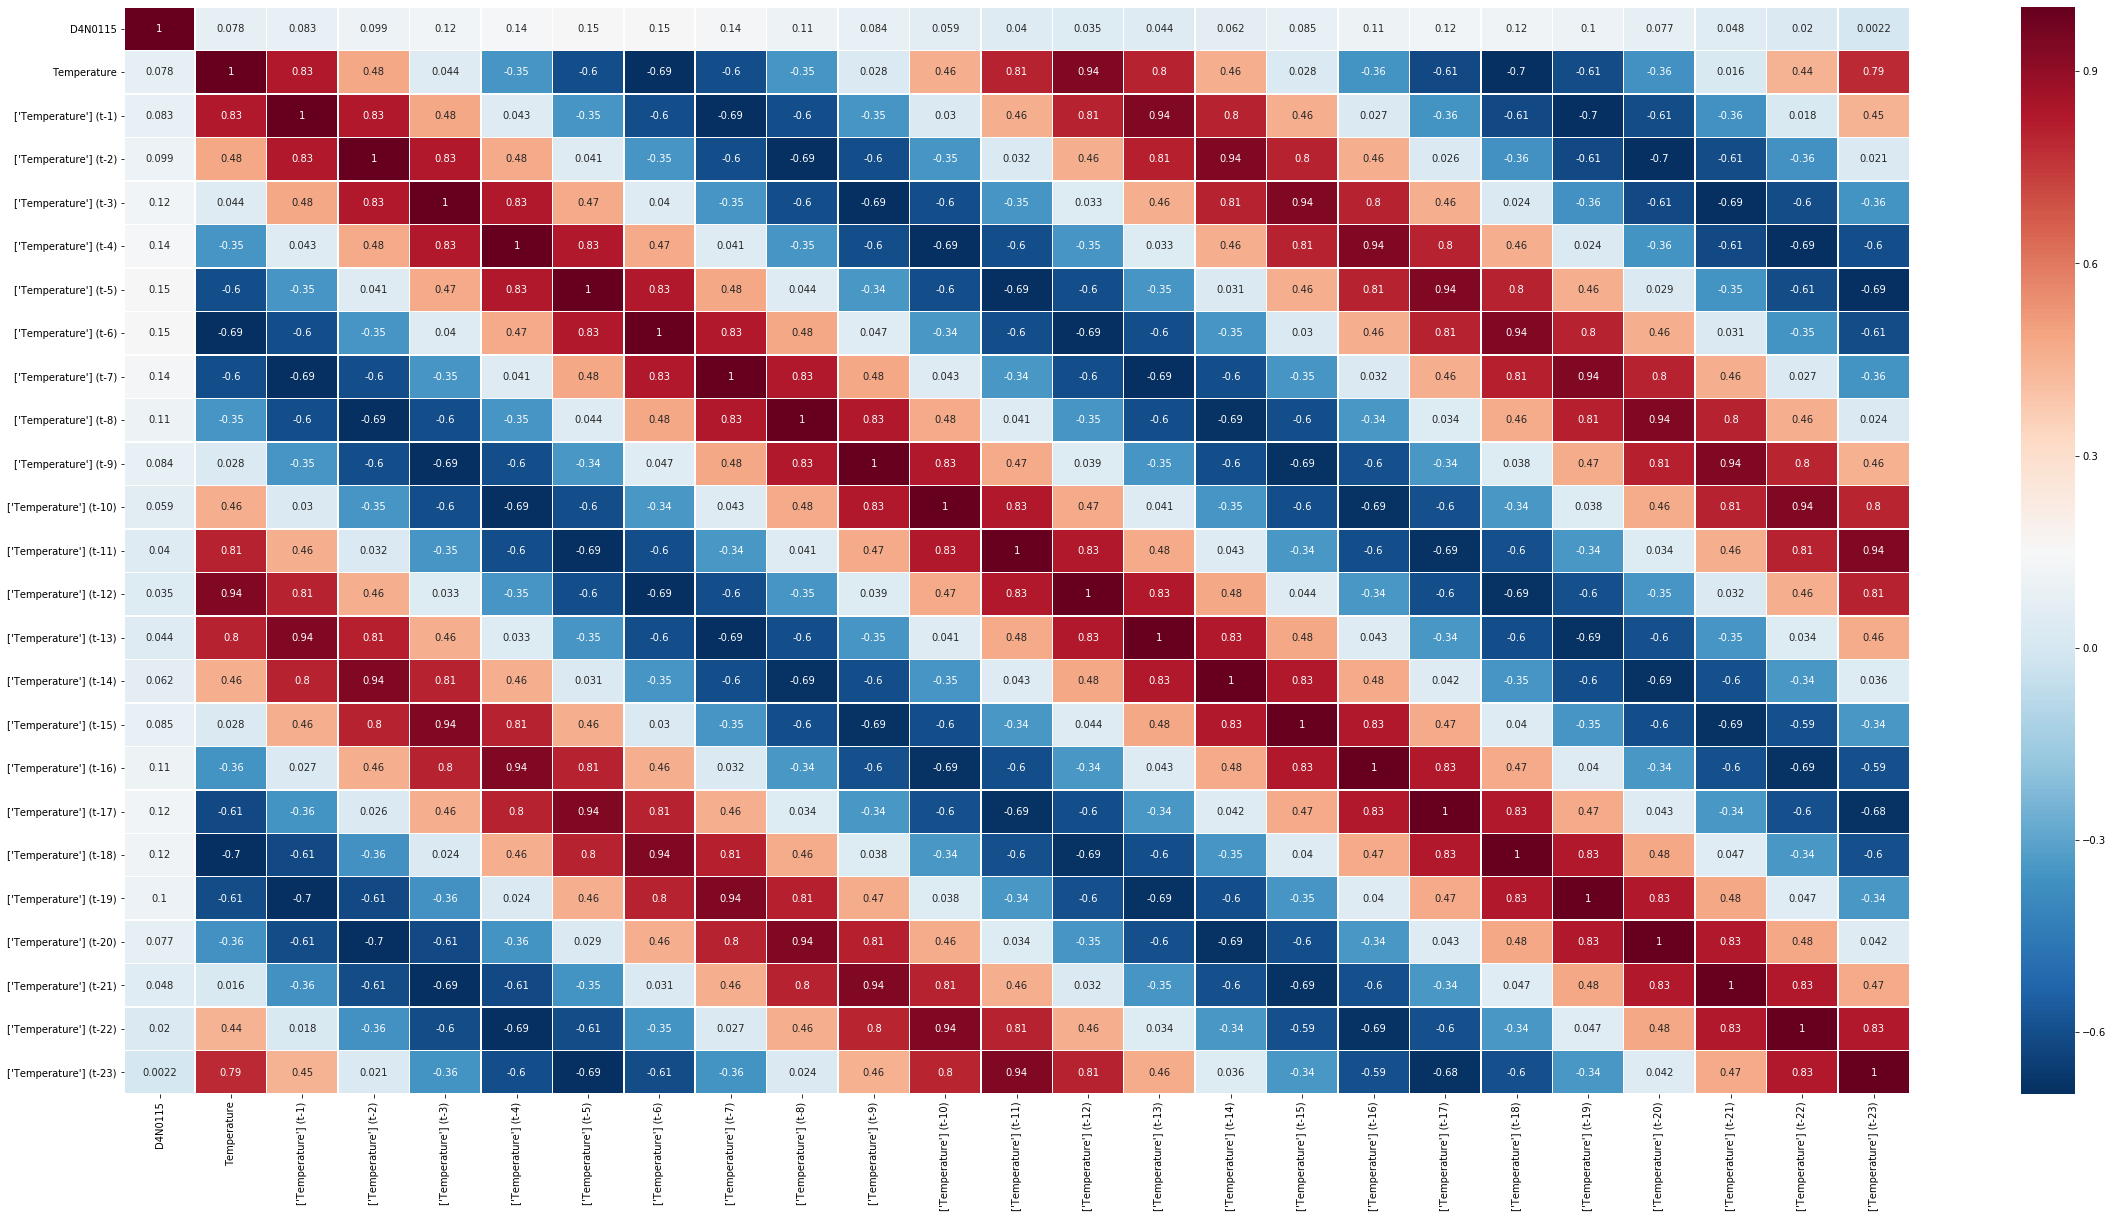

In [25]:
# temp0834 , 0111, 0122 , 0037, 0115, 0110

import seaborn as sns
corrm1 = temp.corr(method = 'spearman')
corrm2 = temp.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm2.columns,
            yticklabels=corrm2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

#### Shifting variables based on lag variables 

In [26]:
#pima=pima.drop(['Temperature (t-3)'], axis=1)
#pima=pima.drop(['precip_trend (t-5)'], axis=1)
#pima

In [47]:
pima['Temperature (t-3)'] = pima.Temperature.shift(5)
pima['precip_trend (t-5)'] = pima.precip_trend.shift(0)
#pima = pima['Discharge (t-6)'].drop(axis=1)
pima

D4N0115  Temperature  precip_trend  Discharge   Abstraction  \
year_month                                                                  
1975-05-01 -13.180000        15.30     76.900000      1.032  1.665429e+05   
1975-06-01 -11.600000        12.10     83.904167      0.938  1.665429e+05   
1975-07-01 -11.730000        11.85     89.433333      0.872  1.665429e+05   
1975-08-01 -12.290000        14.30     93.183333      0.814  1.665429e+05   
1975-09-01 -12.880000        19.80     93.183333      0.809  1.665429e+05   
...               ...          ...           ...        ...           ...   
2004-11-01 -31.500000        23.75     53.341667      0.344  2.572182e+06   
2004-12-01 -31.800000        23.10     53.633333      0.341  2.572182e+06   
2005-01-01 -31.870000        23.50     53.616667      0.360  2.722572e+06   
2005-02-01 -31.880508        22.70     53.400000      0.348  2.722572e+06   
2005-03-01 -31.890000        20.30     53.954167      0.350  2.722572e+06   

            Temperature (t-3)  precip_trend (t-5)  
year_month                                         
1975-05-01                NaN           76.900000  
1975-06-01                NaN           83.904167  
1975-07-01                NaN           89.433333  
1975-08-01                NaN           93.183333  
1975-09-01                NaN           93.183333  
...                       ...                 ...  
2004-11-01              10.15           53.341667  
2004-12-01               8.55           53.633333  
2005-01-01              14.60           53.616667  
2005-02-01              15.55           53.400000  
2005-03-01              20.35           53.954167  

[359 rows x 7 columns]

In [48]:
X = pima[['Temperature (t-3)', 'precip_trend (t-5)', 'Discharge','Abstraction']] # Features
y = pima[['D4N0115']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110' 

In [49]:
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [50]:
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Temperature (t-3)     0.070505
precip_trend (t-5)    0.353989
Discharge             0.749085
Abstraction           1.000000
dtype: float64

### Auto and Cross corr plots combined 

In [51]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [52]:
rainfall = X['precip_trend (t-5)']
temperature = X['Temperature (t-3)']
discharge = X['Discharge']
usage =  X['Abstraction']
bhid =  y['D4N0115']

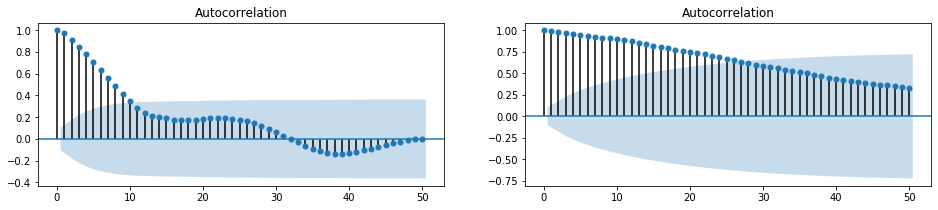

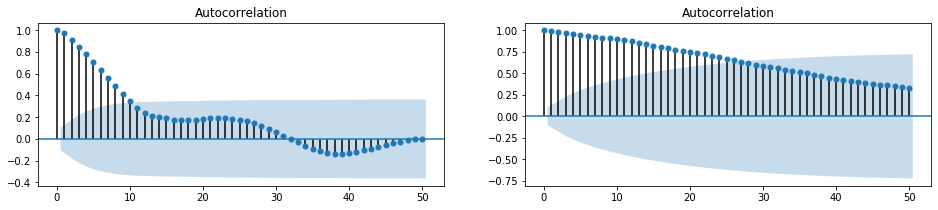

In [53]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(rainfall.tolist(), lags=50, ax=axes[0])
plot_acf(bhid.tolist(), lags=50, ax=axes[1])

Checking if target variable is auto correlated.
Auto-corr (similarity between observations as a function of the lag time)

- plot looks like a sigmoid funtion (hint for seasonality)

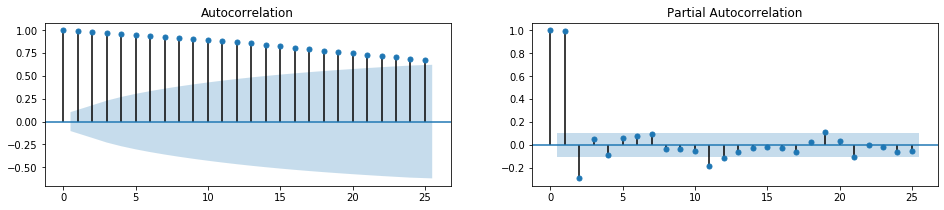

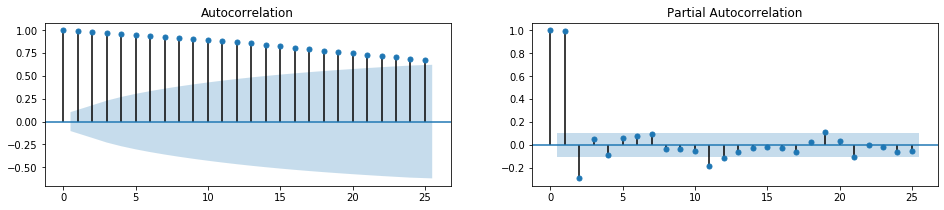

In [54]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(bhid, lags=25, ax=axes[0])
plot_pacf(bhid, lags=25, ax=axes[1])

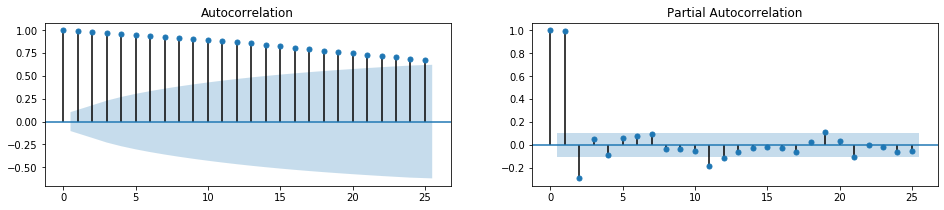

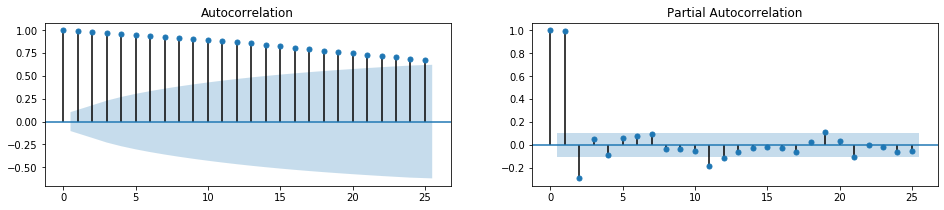

In [55]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(bhid, lags=25, ax=axes[0])
plot_pacf(bhid, lags=25, ax=axes[1])

#### To check whether data is stationary we use Augmented Dickey-Fuller (ADF) Test

For time series modeling, data needs to be stationary — if there is a trend in the data we need to get rid of it. 

#### BHID

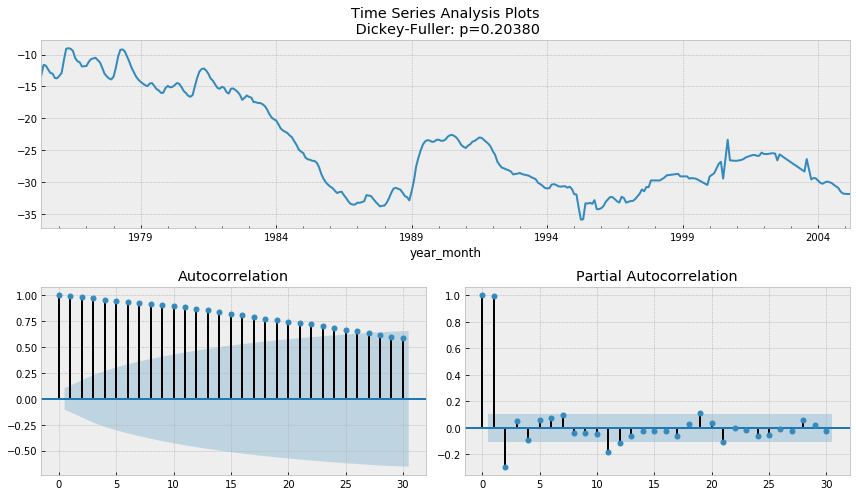

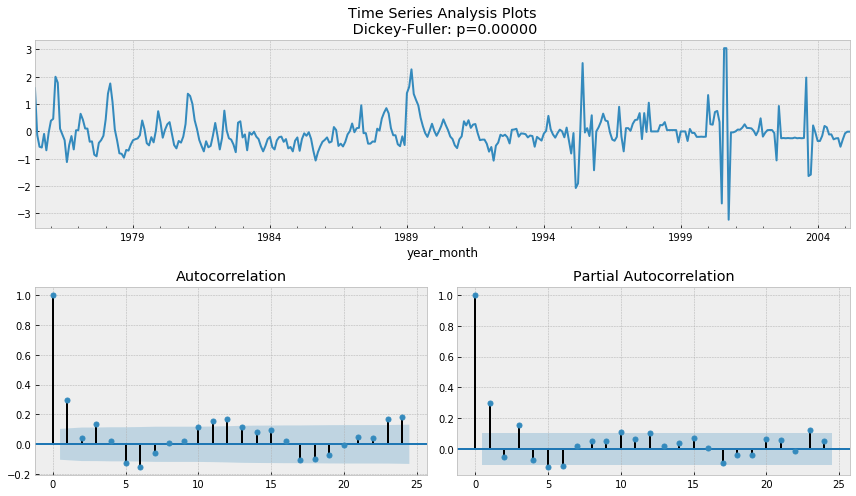

In [56]:
In [2]: import statsmodels.api as sm
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(bhid, lags=30)

# Take the first difference to remove to make the process stationary
D4N0115_diff = bhid - bhid.shift(1)

tsplot(D4N0115_diff[1:], lags=24)

#### Rainfall

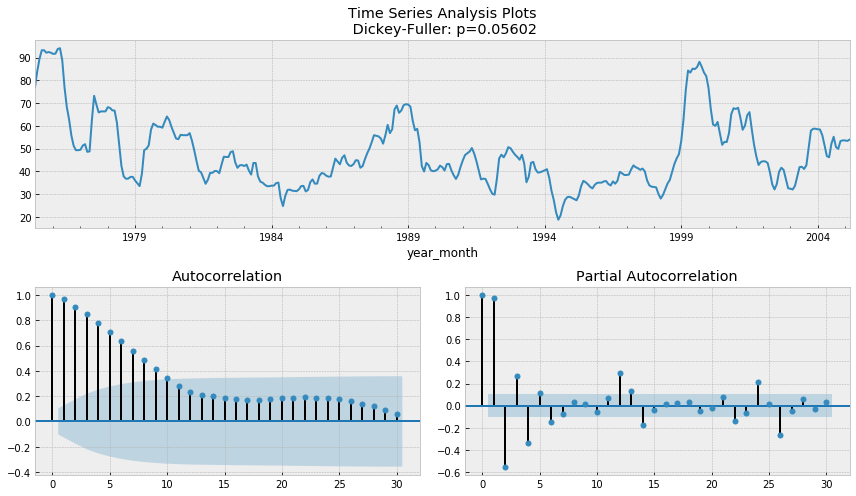

In [57]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(rainfall, lags=30)

#### Temp

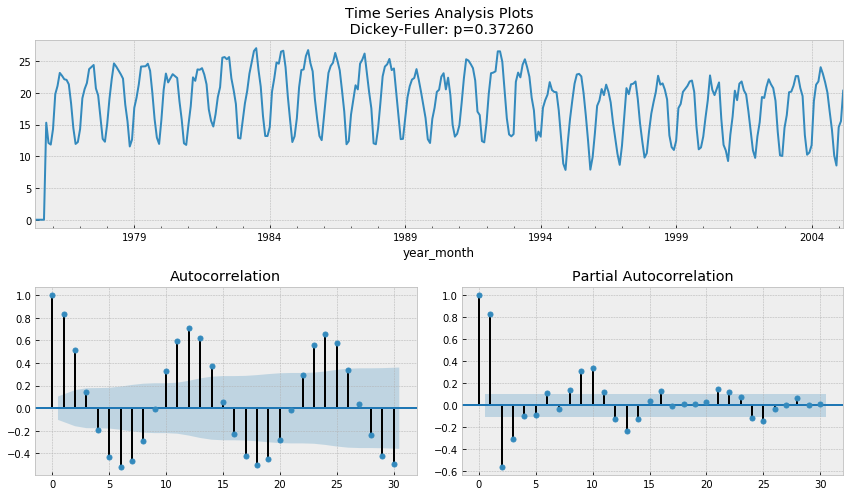

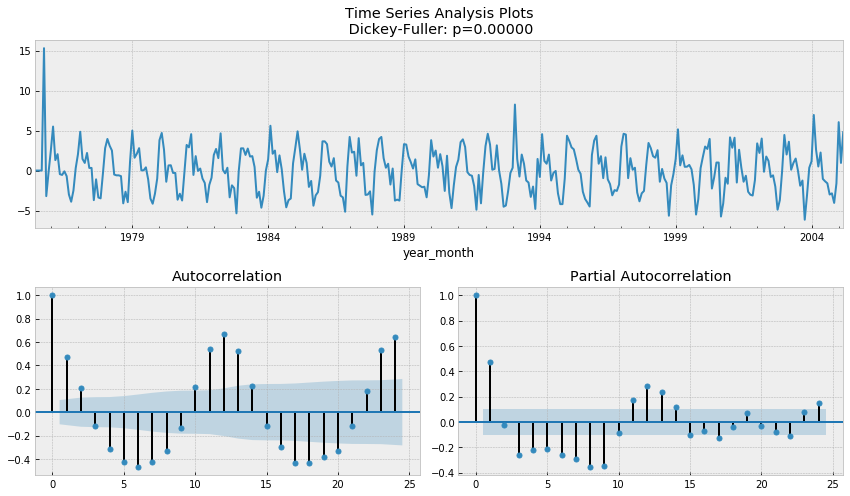

In [58]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(temperature, lags=30)

# Take the first difference to remove to make the process stationary
temp_diff = temperature - temperature.shift(1)

tsplot(temp_diff[1:], lags=24)


#### Discharge

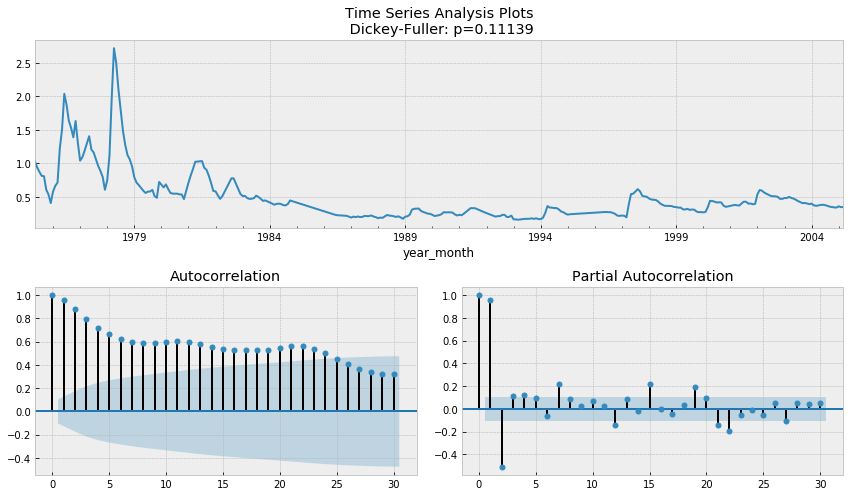

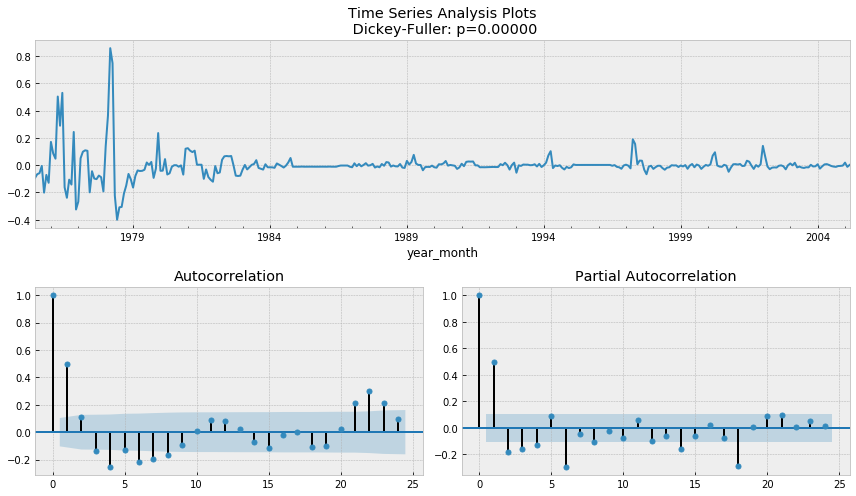

In [59]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(discharge, lags=30)

# Take the first difference to remove to make the process stationary
dis_diff = discharge - discharge.shift(1)

tsplot(dis_diff[1:], lags=24)

#### Usage

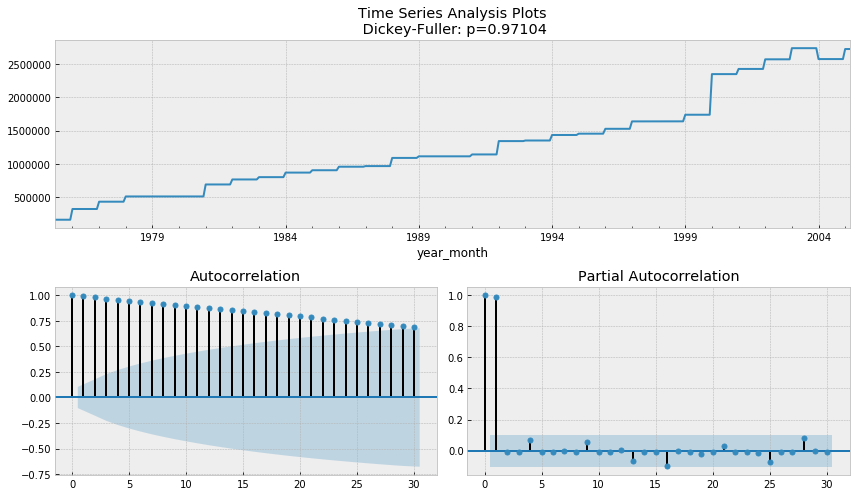

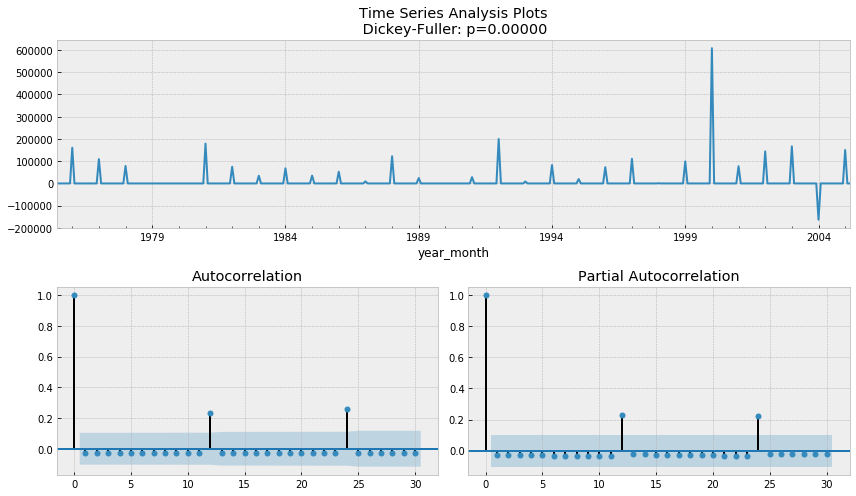

In [60]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(usage, lags=30)

#Take the first difference to remove to make the process stationary
usage_diff = usage - usage.shift(1)


tsplot(usage_diff[1:], lags=30)



### Differenced dataframe (poor model results)

In [61]:
pima_diff = pd.DataFrame({'D4N0115': D4N0115_diff ,'Temperature': temp_diff,  'Rainfall': rainfall,  'Discharge': dis_diff, 'Abstraction': usage_diff}, columns=['D4N0115','Temperature','precip_trend','Discharge', 'Abstraction'])
pima_diff.apply(lambda x: sum(x.isnull()), axis=0)

D4N0115           1
Temperature       1
precip_trend    359
Discharge         1
Abstraction       1
dtype: int64

In [62]:
#X = pima_diff[['Temperature', 'Discharge','Abstraction']] # Features
#y = pima_diff[['D4N0834']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110' 

### Visual illustration to help select train and test data

Text(0, 0.5, 'Groundwater levels')

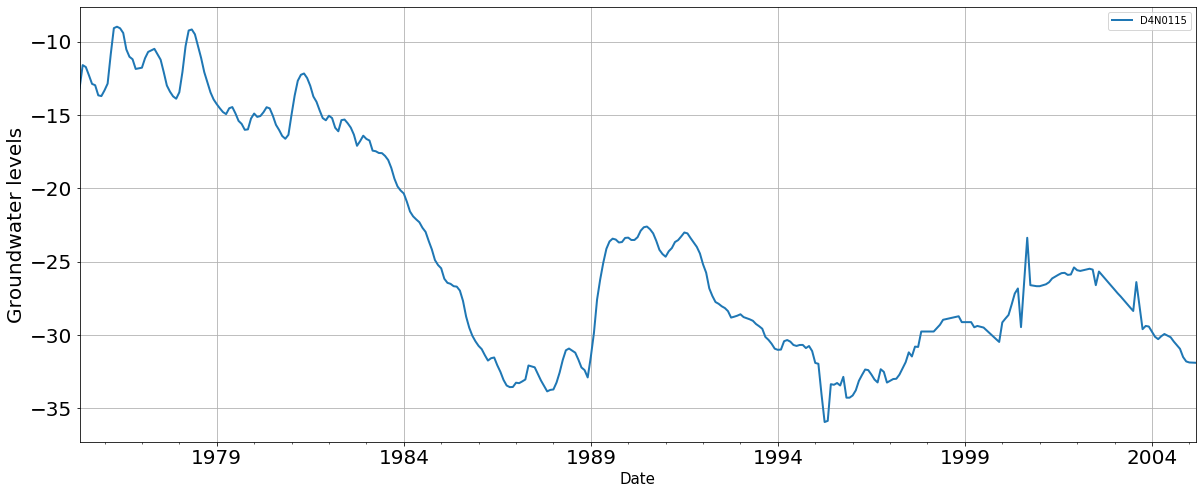

In [63]:
pima[['D4N0115']].plot(figsize=(20,8), linewidth=2, fontsize = 20, grid=True);
plt.xlabel("Date",fontsize=15)
plt.ylabel("Groundwater levels",fontsize=20)


### Model Parameters

In [64]:
pima['precip_trend_log'] = 1 +np.log1p(pima['precip_trend (t-5)'])
pima['Temperature_log'] = 1 +np.log1p(pima['Temperature (t-3)'])
pima['Discharge_log'] = 1 + np.log1p(pima['Discharge'])
pima['Abstraction_log'] = 1 + np.log1p(pima['Abstraction'])

In [65]:
pima

D4N0115  Temperature  precip_trend  Discharge   Abstraction  \
year_month                                                                  
1975-05-01 -13.180000        15.30     76.900000      1.032  1.665429e+05   
1975-06-01 -11.600000        12.10     83.904167      0.938  1.665429e+05   
1975-07-01 -11.730000        11.85     89.433333      0.872  1.665429e+05   
1975-08-01 -12.290000        14.30     93.183333      0.814  1.665429e+05   
1975-09-01 -12.880000        19.80     93.183333      0.809  1.665429e+05   
...               ...          ...           ...        ...           ...   
2004-11-01 -31.500000        23.75     53.341667      0.344  2.572182e+06   
2004-12-01 -31.800000        23.10     53.633333      0.341  2.572182e+06   
2005-01-01 -31.870000        23.50     53.616667      0.360  2.722572e+06   
2005-02-01 -31.880508        22.70     53.400000      0.348  2.722572e+06   
2005-03-01 -31.890000        20.30     53.954167      0.350  2.722572e+06   

            Temperature (t-3)  precip_trend (t-5)  precip_trend_log  \
year_month                                                            
1975-05-01                NaN           76.900000          5.355426   
1975-06-01                NaN           83.904167          5.441523   
1975-07-01                NaN           89.433333          5.504613   
1975-08-01                NaN           93.183333          5.545243   
1975-09-01                NaN           93.183333          5.545243   
...                       ...                 ...               ...   
2004-11-01              10.15           53.341667          4.995291   
2004-12-01               8.55           53.633333          5.000644   
2005-01-01              14.60           53.616667          5.000339   
2005-02-01              15.55           53.400000          4.996364   
2005-03-01              20.35           53.954167          5.006500   

            Temperature_log  Discharge_log  Abstraction_log  
year_month                                                   
1975-05-01              NaN       1.709021        13.023014  
1975-06-01              NaN       1.661657        13.023014  
1975-07-01              NaN       1.627007        13.023014  
1975-08-01              NaN       1.595534        13.023014  
1975-09-01              NaN       1.592774        13.023014  
...                     ...            ...              ...  
2004-11-01         3.411439       1.295650        15.760266  
2004-12-01         3.256541       1.293416        15.760266  
2005-01-01         3.747271       1.307485        15.817088  
2005-02-01         3.806386       1.298622        15.817088  
2005-03-01         4.061052       1.300105        15.817088  

[359 rows x 11 columns]

In [66]:
for obs in range(1,5):
    pima["t_" + str(obs)] = pima.D4N0115.shift(obs)
pima.fillna(0, inplace=True)

In [67]:
pima

D4N0115  Temperature  precip_trend  Discharge   Abstraction  \
year_month                                                                  
1975-05-01 -13.180000        15.30     76.900000      1.032  1.665429e+05   
1975-06-01 -11.600000        12.10     83.904167      0.938  1.665429e+05   
1975-07-01 -11.730000        11.85     89.433333      0.872  1.665429e+05   
1975-08-01 -12.290000        14.30     93.183333      0.814  1.665429e+05   
1975-09-01 -12.880000        19.80     93.183333      0.809  1.665429e+05   
...               ...          ...           ...        ...           ...   
2004-11-01 -31.500000        23.75     53.341667      0.344  2.572182e+06   
2004-12-01 -31.800000        23.10     53.633333      0.341  2.572182e+06   
2005-01-01 -31.870000        23.50     53.616667      0.360  2.722572e+06   
2005-02-01 -31.880508        22.70     53.400000      0.348  2.722572e+06   
2005-03-01 -31.890000        20.30     53.954167      0.350  2.722572e+06   

            Temperature (t-3)  precip_trend (t-5)  precip_trend_log  \
year_month                                                            
1975-05-01               0.00           76.900000          5.355426   
1975-06-01               0.00           83.904167          5.441523   
1975-07-01               0.00           89.433333          5.504613   
1975-08-01               0.00           93.183333          5.545243   
1975-09-01               0.00           93.183333          5.545243   
...                       ...                 ...               ...   
2004-11-01              10.15           53.341667          4.995291   
2004-12-01               8.55           53.633333          5.000644   
2005-01-01              14.60           53.616667          5.000339   
2005-02-01              15.55           53.400000          4.996364   
2005-03-01              20.35           53.954167          5.006500   

            Temperature_log  Discharge_log  Abstraction_log        t_1  \
year_month                                                               
1975-05-01         0.000000       1.709021        13.023014   0.000000   
1975-06-01         0.000000       1.661657        13.023014 -13.180000   
1975-07-01         0.000000       1.627007        13.023014 -11.600000   
1975-08-01         0.000000       1.595534        13.023014 -11.730000   
1975-09-01         0.000000       1.592774        13.023014 -12.290000   
...                     ...            ...              ...        ...   
2004-11-01         3.411439       1.295650        15.760266 -30.940000   
2004-12-01         3.256541       1.293416        15.760266 -31.500000   
2005-01-01         3.747271       1.307485        15.817088 -31.800000   
2005-02-01         3.806386       1.298622        15.817088 -31.870000   
2005-03-01         4.061052       1.300105        15.817088 -31.880508   

                  t_2        t_3        t_4  
year_month                                   
1975-05-01   0.000000   0.000000   0.000000  
1975-06-01   0.000000   0.000000   0.000000  
1975-07-01 -13.180000   0.000000   0.000000  
1975-08-01 -11.600000 -13.180000   0.000000  
1975-09-01 -11.730000 -11.600000 -13.180000  
...               ...        ...        ...  
2004-11-01 -30.694098 -30.440000 -30.150000  
2004-12-01 -30.940000 -30.694098 -30.440000  
2005-01-01 -31.500000 -30.940000 -30.694098  
2005-02-01 -31.800000 -31.500000 -30.940000  
2005-03-01 -31.870000 -31.800000 -31.500000  

[359 rows x 15 columns]

In [68]:
pima.shape

(359, 15)

In [69]:
pima1  = pima[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2','D4N0115']]
scaler = StandardScaler()
pima1  = pd.DataFrame(scaler.fit_transform(pima1), columns=pima1.columns, index=pima1.index)

### All variables

In [70]:
X = pima1[['Temperature_log','precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']]
y = pima1['D4N0115']

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

Temperature_log     0.057293
precip_trend_log    0.219932
Discharge_log       0.483548
Abstraction_log     0.637036
t_1                 1.000000
t_2                 0.785945
dtype: float64

In [71]:
X = pima1[['Discharge_log' ,'precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']].values
y = pima1['D4N0115'].values
y = y.reshape(-1,1)

In [72]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tss.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(300, 6) (300, 1)
(59, 6) (59, 1)


In [73]:
def forecast(model, test_forecast, gwl, steps_ahead):
    y_pred = []
    current_output = gwl
    for step in range(steps_ahead):
        #print(test_forecast[step])
        input_test = np.concatenate([test_forecast[step][:-1], [current_output]])
        #input_test = [test_forecast[0][0][:-1], gwl]
        #print(input_test)
        pred = model.predict(input_test.reshape(1,1,6))
        y_pred.append(pred[0][0])
        #print(pred)
        current_output = pred[0][0]
    return y_pred

In [75]:
y_test[0]

array([-0.36470768])

### LSTM

In [77]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import GRU, LSTM
from tensorflow.keras.optimizers import Adam

In [78]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_lstm', 'rmse_lstm', 'r2_lstm','mae_lstm'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    optimizer = Adam(lr=0.00001)
    model = Sequential()
    model.add(LSTM(50, input_shape=(1, 6)))
    model.add(Dropout(0.1))

    model.add(Dense(1))

    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    X_val_reshaped = X_val_reshaped.reshape(59, 6)

    #running function
    gwl = -0.36470768
    test_forecast = X_test
    steps_ahead = 59
    y_pred = forecast(model, test_forecast, gwl, steps_ahead)
    y_pred = np.array(y_pred)
    
    #metrics for test
    y_lstm = y_pred
    test_pred.append(y_lstm)
    mse_lstm = mean_squared_error(y_test, y_lstm)
    rmse_lstm = np.sqrt(mse_lstm)
    r2_lstm = r2_score(y_test, y_lstm)
    mae_lstm = mean_absolute_error(y_test, y_lstm)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_lstm,Round), round(rmse_lstm,Round), round(r2_lstm,Round),round(mae_lstm,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(300, 6)
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 300 samples, validate on 59 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/1000
 96/300 [========>.....................] - ETA: 4s - loss: 1.1461 - mean_squared_error: 1.1461
Epoch 00001: val_loss improved from inf to 0.22769, saving model to model.h5
300/300 [==============================] - 3s 9ms/sample - loss: 1.0868 - mean_squared_error: 1.0868 - val_loss: 0.2277 - val_mean_squared_error: 0.2277
Epoch 2/1000
288/300 [===========================>..] - ETA: 0s - loss: 0.8940 - mean_squared_error: 0.8940
Epoch 00002: val_loss improved from 0.22769 to 0.19483, saving model to model.h5
300/300 [==============================] - 0s 387us/sample - loss: 0.8874 - mean_squared_error: 0.8874 - val_loss: 0.1948 - val_mean_squared_error: 0.1948
Epoch 3/1000
288/300 [===============

Epoch 23/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0445 - mean_squared_error: 0.0445
Epoch 00023: val_loss did not improve from 0.03878
300/300 [==============================] - 0s 139us/sample - loss: 0.0543 - mean_squared_error: 0.0543 - val_loss: 0.0484 - val_mean_squared_error: 0.0484
Epoch 24/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0557 - mean_squared_error: 0.0557
Epoch 00024: val_loss did not improve from 0.03878
300/300 [==============================] - 0s 128us/sample - loss: 0.0479 - mean_squared_error: 0.0479 - val_loss: 0.0497 - val_mean_squared_error: 0.0497
Epoch 25/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0436 - mean_squared_error: 0.0436
Epoch 00025: val_loss did not improve from 0.03878
300/300 [==============================] - 0s 162us/sample - loss: 0.0461 - mean_squared_error: 0.0461 - val_loss: 0.0550 - val_mean_squared_error: 0.0550
Epoch 26/1000
 96/300 [========>.....................] 

 96/300 [========>.....................] - ETA: 0s - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 00048: val_loss improved from 0.01679 to 0.01471, saving model to model.h5
300/300 [==============================] - 0s 169us/sample - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 49/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0145 - mean_squared_error: 0.0145
Epoch 00049: val_loss improved from 0.01471 to 0.01465, saving model to model.h5
300/300 [==============================] - 0s 172us/sample - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 50/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 00050: val_loss improved from 0.01465 to 0.01452, saving model to model.h5
300/300 [==============================] - 0s 306us/sample - loss: 0.0162 - mean_squared_error: 0.0162 - val_loss: 0.0145 - val_mean_s

Epoch 74/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 00074: val_loss did not improve from 0.01452
300/300 [==============================] - 0s 154us/sample - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 75/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 00075: val_loss did not improve from 0.01452
300/300 [==============================] - 0s 139us/sample - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 76/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0085 - mean_squared_error: 0.0085
Epoch 00076: val_loss did not improve from 0.01452
300/300 [==============================] - 0s 136us/sample - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 77/1000
 96/300 [========>.....................] 

 96/300 [========>.....................] - ETA: 0s - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 00100: val_loss did not improve from 0.01452
300/300 [==============================] - 0s 105us/sample - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 101/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0116 - mean_squared_error: 0.0116
Epoch 00101: val_loss did not improve from 0.01452
300/300 [==============================] - 0s 121us/sample - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0181 - val_mean_squared_error: 0.0181
Epoch 102/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 00102: val_loss did not improve from 0.01452
300/300 [==============================] - 0s 127us/sample - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0178 - val_mean_squared_error: 0.0178
Epoch 103/1000
 96/300 [========>.....................] - ETA: 0s -

Epoch 126/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0082 - mean_squared_error: 0.0082
Epoch 00126: val_loss did not improve from 0.01452
300/300 [==============================] - 0s 113us/sample - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0183 - val_mean_squared_error: 0.0183
Epoch 127/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 00127: val_loss did not improve from 0.01452
300/300 [==============================] - 0s 109us/sample - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0166 - val_mean_squared_error: 0.0166
Epoch 128/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 00128: val_loss did not improve from 0.01452
300/300 [==============================] - 0s 114us/sample - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0184 - val_mean_squared_error: 0.0184
Epoch 129/1000
 96/300 [========>...................

Epoch 2/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.8158 - mean_squared_error: 0.8158
Epoch 00002: val_loss improved from 0.25760 to 0.22480, saving model to model.h5
300/300 [==============================] - 0s 178us/sample - loss: 0.8256 - mean_squared_error: 0.8256 - val_loss: 0.2248 - val_mean_squared_error: 0.2248
Epoch 3/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.7492 - mean_squared_error: 0.7492
Epoch 00003: val_loss improved from 0.22480 to 0.20406, saving model to model.h5
300/300 [==============================] - 0s 164us/sample - loss: 0.7067 - mean_squared_error: 0.7067 - val_loss: 0.2041 - val_mean_squared_error: 0.2041
Epoch 4/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.6791 - mean_squared_error: 0.6791
Epoch 00004: val_loss improved from 0.20406 to 0.18725, saving model to model.h5
300/300 [==============================] - 0s 167us/sample - loss: 0.6105 - mean_squared_error: 0.6105 - val_loss: 0.1872 -

Epoch 26/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0456 - mean_squared_error: 0.0456
Epoch 00026: val_loss did not improve from 0.02427
300/300 [==============================] - 0s 136us/sample - loss: 0.0442 - mean_squared_error: 0.0442 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 27/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0455 - mean_squared_error: 0.0455
Epoch 00027: val_loss did not improve from 0.02427
300/300 [==============================] - 0s 132us/sample - loss: 0.0397 - mean_squared_error: 0.0397 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 28/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0419 - mean_squared_error: 0.0419
Epoch 00028: val_loss improved from 0.02427 to 0.02425, saving model to model.h5
300/300 [==============================] - 0s 171us/sample - loss: 0.0367 - mean_squared_error: 0.0367 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 29/1000
 96/300 [==

Epoch 51/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0131 - mean_squared_error: 0.0131
Epoch 00051: val_loss did not improve from 0.01431
300/300 [==============================] - 0s 114us/sample - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 52/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 00052: val_loss did not improve from 0.01431
300/300 [==============================] - 0s 106us/sample - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 53/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 00053: val_loss did not improve from 0.01431
300/300 [==============================] - 0s 117us/sample - loss: 0.0138 - mean_squared_error: 0.0138 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 54/1000
 96/300 [========>.....................] 

 96/300 [========>.....................] - ETA: 0s - loss: 0.0095 - mean_squared_error: 0.0095
Epoch 00077: val_loss did not improve from 0.01431
300/300 [==============================] - 0s 174us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0203 - val_mean_squared_error: 0.0203
Epoch 78/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 00078: val_loss did not improve from 0.01431
300/300 [==============================] - 0s 120us/sample - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0190 - val_mean_squared_error: 0.0190
Epoch 79/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0137 - mean_squared_error: 0.0137
Epoch 00079: val_loss did not improve from 0.01431
300/300 [==============================] - 0s 154us/sample - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 80/1000
 96/300 [========>.....................] - ETA: 0s - lo

 96/300 [========>.....................] - ETA: 0s - loss: 0.0120 - mean_squared_error: 0.0120
Epoch 00103: val_loss did not improve from 0.01431
300/300 [==============================] - 0s 141us/sample - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0182 - val_mean_squared_error: 0.0182
Epoch 104/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0094 - mean_squared_error: 0.0094
Epoch 00104: val_loss did not improve from 0.01431
300/300 [==============================] - 0s 114us/sample - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0181 - val_mean_squared_error: 0.0181
Epoch 105/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0138 - mean_squared_error: 0.0138
Epoch 00105: val_loss did not improve from 0.01431
300/300 [==============================] - 0s 114us/sample - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0182 - val_mean_squared_error: 0.0182
Epoch 106/1000
 96/300 [========>.....................] - ETA: 0s -

Epoch 129/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 00129: val_loss did not improve from 0.01431
300/300 [==============================] - 0s 125us/sample - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0228 - val_mean_squared_error: 0.0228
Epoch 130/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 00130: val_loss did not improve from 0.01431
300/300 [==============================] - 0s 97us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0186 - val_mean_squared_error: 0.0186
Epoch 131/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 00131: val_loss did not improve from 0.01431
300/300 [==============================] - 0s 109us/sample - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0197 - val_mean_squared_error: 0.0197
Epoch 132/1000
 96/300 [========>....................

300/300 [==============================] - 0s 176us/sample - loss: 0.4620 - mean_squared_error: 0.4620 - val_loss: 0.0871 - val_mean_squared_error: 0.0871
Epoch 6/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.3566 - mean_squared_error: 0.3566
Epoch 00006: val_loss improved from 0.08714 to 0.07465, saving model to model.h5
300/300 [==============================] - 0s 245us/sample - loss: 0.3874 - mean_squared_error: 0.3874 - val_loss: 0.0747 - val_mean_squared_error: 0.0747
Epoch 7/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.3492 - mean_squared_error: 0.3492
Epoch 00007: val_loss improved from 0.07465 to 0.06584, saving model to model.h5
300/300 [==============================] - 0s 296us/sample - loss: 0.3321 - mean_squared_error: 0.3321 - val_loss: 0.0658 - val_mean_squared_error: 0.0658
Epoch 8/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.3208 - mean_squared_error: 0.3208
Epoch 00008: val_loss improved from 0.06584 to 0.

Epoch 31/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0295 - mean_squared_error: 0.0295
Epoch 00031: val_loss did not improve from 0.03652
300/300 [==============================] - 0s 111us/sample - loss: 0.0258 - mean_squared_error: 0.0258 - val_loss: 0.0417 - val_mean_squared_error: 0.0417
Epoch 32/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0189 - mean_squared_error: 0.0189
Epoch 00032: val_loss did not improve from 0.03652
300/300 [==============================] - 0s 168us/sample - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.0389 - val_mean_squared_error: 0.0389
Epoch 33/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0283 - mean_squared_error: 0.0283
Epoch 00033: val_loss improved from 0.03652 to 0.03487, saving model to model.h5
300/300 [==============================] - 0s 224us/sample - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0349 - val_mean_squared_error: 0.0349
Epoch 34/1000
 96/300 [==

Epoch 56/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 00056: val_loss did not improve from 0.01519
300/300 [==============================] - 0s 118us/sample - loss: 0.0144 - mean_squared_error: 0.0144 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 57/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0131 - mean_squared_error: 0.0131
Epoch 00057: val_loss did not improve from 0.01519
300/300 [==============================] - 0s 143us/sample - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 58/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 00058: val_loss did not improve from 0.01519
300/300 [==============================] - 0s 190us/sample - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 59/1000
 96/300 [========>.....................] 

 96/300 [========>.....................] - ETA: 0s - loss: 0.0139 - mean_squared_error: 0.0139
Epoch 00082: val_loss did not improve from 0.01519
300/300 [==============================] - 0s 140us/sample - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0202 - val_mean_squared_error: 0.0202
Epoch 83/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0137 - mean_squared_error: 0.0137
Epoch 00083: val_loss did not improve from 0.01519
300/300 [==============================] - 0s 109us/sample - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0215 - val_mean_squared_error: 0.0215
Epoch 84/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 00084: val_loss did not improve from 0.01519
300/300 [==============================] - 0s 102us/sample - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0206 - val_mean_squared_error: 0.0206
Epoch 85/1000
 96/300 [========>.....................] - ETA: 0s - lo

 96/300 [========>.....................] - ETA: 0s - loss: 0.0147 - mean_squared_error: 0.0147
Epoch 00108: val_loss did not improve from 0.01519
300/300 [==============================] - 0s 155us/sample - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0202 - val_mean_squared_error: 0.0202
Epoch 109/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0112 - mean_squared_error: 0.0112
Epoch 00109: val_loss did not improve from 0.01519
300/300 [==============================] - 0s 165us/sample - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0219 - val_mean_squared_error: 0.0219
Epoch 110/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 00110: val_loss did not improve from 0.01519
300/300 [==============================] - 0s 133us/sample - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0226 - val_mean_squared_error: 0.0226
Epoch 111/1000
 96/300 [========>.....................] - ETA: 0s -

Epoch 134/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 00134: val_loss did not improve from 0.01519
300/300 [==============================] - 0s 211us/sample - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0203 - val_mean_squared_error: 0.0203
Epoch 135/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0093 - mean_squared_error: 0.0093
Epoch 00135: val_loss did not improve from 0.01519
300/300 [==============================] - 0s 218us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0191 - val_mean_squared_error: 0.0191
Epoch 136/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 00136: val_loss did not improve from 0.01519
300/300 [==============================] - 0s 141us/sample - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0185 - val_mean_squared_error: 0.0185
Epoch 137/1000
 96/300 [========>...................

Epoch 5/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.5685 - mean_squared_error: 0.5685
Epoch 00005: val_loss improved from 0.17877 to 0.16134, saving model to model.h5
300/300 [==============================] - 0s 195us/sample - loss: 0.5751 - mean_squared_error: 0.5751 - val_loss: 0.1613 - val_mean_squared_error: 0.1613
Epoch 6/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.4882 - mean_squared_error: 0.4882
Epoch 00006: val_loss improved from 0.16134 to 0.14907, saving model to model.h5
300/300 [==============================] - 0s 174us/sample - loss: 0.4956 - mean_squared_error: 0.4956 - val_loss: 0.1491 - val_mean_squared_error: 0.1491
Epoch 7/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.4594 - mean_squared_error: 0.4594
Epoch 00007: val_loss improved from 0.14907 to 0.13367, saving model to model.h5
300/300 [==============================] - 0s 286us/sample - loss: 0.4329 - mean_squared_error: 0.4329 - val_loss: 0.1337 -

 96/300 [========>.....................] - ETA: 0s - loss: 0.0273 - mean_squared_error: 0.0273
Epoch 00029: val_loss improved from 0.02367 to 0.02356, saving model to model.h5
300/300 [==============================] - 0s 198us/sample - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 30/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0458 - mean_squared_error: 0.0458
Epoch 00030: val_loss improved from 0.02356 to 0.02342, saving model to model.h5
300/300 [==============================] - 0s 302us/sample - loss: 0.0332 - mean_squared_error: 0.0332 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 31/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 00031: val_loss did not improve from 0.02342
300/300 [==============================] - 0s 193us/sample - loss: 0.0282 - mean_squared_error: 0.0282 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 32/

Epoch 54/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0113 - mean_squared_error: 0.0113
Epoch 00054: val_loss did not improve from 0.01544
300/300 [==============================] - 0s 167us/sample - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 55/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 00055: val_loss did not improve from 0.01544
300/300 [==============================] - 0s 172us/sample - loss: 0.0152 - mean_squared_error: 0.0152 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 56/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 00056: val_loss did not improve from 0.01544
300/300 [==============================] - 0s 132us/sample - loss: 0.0141 - mean_squared_error: 0.0141 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 57/1000
 96/300 [========>.....................] 

 96/300 [========>.....................] - ETA: 0s - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 00080: val_loss did not improve from 0.01544
300/300 [==============================] - 0s 112us/sample - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0178 - val_mean_squared_error: 0.0178
Epoch 81/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0138 - mean_squared_error: 0.0138
Epoch 00081: val_loss did not improve from 0.01544
300/300 [==============================] - 0s 123us/sample - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0164 - val_mean_squared_error: 0.0164
Epoch 82/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 00082: val_loss did not improve from 0.01544
300/300 [==============================] - 0s 147us/sample - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0171 - val_mean_squared_error: 0.0171
Epoch 83/1000
 96/300 [========>.....................] - ETA: 0s - lo

 96/300 [========>.....................] - ETA: 0s - loss: 0.0145 - mean_squared_error: 0.0145
Epoch 00106: val_loss did not improve from 0.01544
300/300 [==============================] - 0s 109us/sample - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0183 - val_mean_squared_error: 0.0183
Epoch 107/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 00107: val_loss did not improve from 0.01544
300/300 [==============================] - 0s 140us/sample - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 108/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0131 - mean_squared_error: 0.0131
Epoch 00108: val_loss did not improve from 0.01544
300/300 [==============================] - 0s 126us/sample - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0185 - val_mean_squared_error: 0.0185
Epoch 109/1000
 96/300 [========>.....................] - ETA: 0s -

Epoch 132/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0134 - mean_squared_error: 0.0134
Epoch 00132: val_loss did not improve from 0.01544
300/300 [==============================] - 0s 108us/sample - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0193 - val_mean_squared_error: 0.0193
Epoch 133/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 00133: val_loss did not improve from 0.01544
300/300 [==============================] - 0s 116us/sample - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0210 - val_mean_squared_error: 0.0210
Epoch 134/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 00134: val_loss did not improve from 0.01544
300/300 [==============================] - 0s 122us/sample - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0207 - val_mean_squared_error: 0.0207
Epoch 135/1000
 96/300 [========>...................

 96/300 [========>.....................] - ETA: 0s - loss: 0.5271 - mean_squared_error: 0.5271
Epoch 00007: val_loss improved from 0.15512 to 0.13815, saving model to model.h5
300/300 [==============================] - 0s 252us/sample - loss: 0.4660 - mean_squared_error: 0.4660 - val_loss: 0.1382 - val_mean_squared_error: 0.1382
Epoch 8/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.3943 - mean_squared_error: 0.3943
Epoch 00008: val_loss improved from 0.13815 to 0.12038, saving model to model.h5
300/300 [==============================] - 0s 195us/sample - loss: 0.3965 - mean_squared_error: 0.3965 - val_loss: 0.1204 - val_mean_squared_error: 0.1204
Epoch 9/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.3690 - mean_squared_error: 0.3690
Epoch 00009: val_loss improved from 0.12038 to 0.10595, saving model to model.h5
300/300 [==============================] - 0s 196us/sample - loss: 0.3383 - mean_squared_error: 0.3383 - val_loss: 0.1059 - val_mean_squ

 96/300 [========>.....................] - ETA: 0s - loss: 0.0232 - mean_squared_error: 0.0232
Epoch 00031: val_loss did not improve from 0.01989
300/300 [==============================] - 0s 118us/sample - loss: 0.0207 - mean_squared_error: 0.0207 - val_loss: 0.0210 - val_mean_squared_error: 0.0210
Epoch 32/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0221 - mean_squared_error: 0.0221
Epoch 00032: val_loss did not improve from 0.01989
300/300 [==============================] - 0s 119us/sample - loss: 0.0193 - mean_squared_error: 0.0193 - val_loss: 0.0203 - val_mean_squared_error: 0.0203
Epoch 33/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 00033: val_loss improved from 0.01989 to 0.01917, saving model to model.h5
300/300 [==============================] - 0s 202us/sample - loss: 0.0189 - mean_squared_error: 0.0189 - val_loss: 0.0192 - val_mean_squared_error: 0.0192
Epoch 34/1000
 96/300 [========>.......

 96/300 [========>.....................] - ETA: 0s - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 00056: val_loss did not improve from 0.01465
300/300 [==============================] - 0s 233us/sample - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 57/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0102 - mean_squared_error: 0.0102
Epoch 00057: val_loss did not improve from 0.01465
300/300 [==============================] - 0s 166us/sample - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0171 - val_mean_squared_error: 0.0171
Epoch 58/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0130 - mean_squared_error: 0.0130
Epoch 00058: val_loss did not improve from 0.01465
300/300 [==============================] - 0s 137us/sample - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.0179 - val_mean_squared_error: 0.0179
Epoch 59/1000
 96/300 [========>.....................] - ETA: 0s - lo

 96/300 [========>.....................] - ETA: 0s - loss: 0.0130 - mean_squared_error: 0.0130
Epoch 00082: val_loss did not improve from 0.01465
300/300 [==============================] - 0s 161us/sample - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0206 - val_mean_squared_error: 0.0206
Epoch 83/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 00083: val_loss did not improve from 0.01465
300/300 [==============================] - 0s 158us/sample - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.0186 - val_mean_squared_error: 0.0186
Epoch 84/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0131 - mean_squared_error: 0.0131
Epoch 00084: val_loss did not improve from 0.01465
300/300 [==============================] - 0s 104us/sample - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0189 - val_mean_squared_error: 0.0189
Epoch 85/1000
 96/300 [========>.....................] - ETA: 0s - lo

 96/300 [========>.....................] - ETA: 0s - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 00108: val_loss did not improve from 0.01465
300/300 [==============================] - 0s 121us/sample - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0198 - val_mean_squared_error: 0.0198
Epoch 109/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 00109: val_loss did not improve from 0.01465
300/300 [==============================] - 0s 117us/sample - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0185 - val_mean_squared_error: 0.0185
Epoch 110/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0095 - mean_squared_error: 0.0095
Epoch 00110: val_loss did not improve from 0.01465
300/300 [==============================] - 0s 149us/sample - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 111/1000
 96/300 [========>.....................] - ETA: 0s -

Epoch 134/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 00134: val_loss did not improve from 0.01465
300/300 [==============================] - 0s 114us/sample - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 135/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0154 - mean_squared_error: 0.0154
Epoch 00135: val_loss did not improve from 0.01465
300/300 [==============================] - 0s 124us/sample - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 136/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0116 - mean_squared_error: 0.0116
Epoch 00136: val_loss did not improve from 0.01465
300/300 [==============================] - 0s 160us/sample - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0226 - val_mean_squared_error: 0.0226
Epoch 137/1000
 96/300 [========>...................

Epoch 17/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.1006 - mean_squared_error: 0.1006
Epoch 00017: val_loss improved from 0.03616 to 0.03362, saving model to model.h5
300/300 [==============================] - 0s 198us/sample - loss: 0.0940 - mean_squared_error: 0.0940 - val_loss: 0.0336 - val_mean_squared_error: 0.0336
Epoch 18/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0772 - mean_squared_error: 0.0772
Epoch 00018: val_loss improved from 0.03362 to 0.03266, saving model to model.h5
300/300 [==============================] - 0s 188us/sample - loss: 0.0813 - mean_squared_error: 0.0813 - val_loss: 0.0327 - val_mean_squared_error: 0.0327
Epoch 19/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0714 - mean_squared_error: 0.0714
Epoch 00019: val_loss improved from 0.03266 to 0.03250, saving model to model.h5
300/300 [==============================] - 0s 315us/sample - loss: 0.0746 - mean_squared_error: 0.0746 - val_loss: 0.032

 96/300 [========>.....................] - ETA: 0s - loss: 0.0179 - mean_squared_error: 0.0179
Epoch 00042: val_loss improved from 0.01841 to 0.01770, saving model to model.h5
300/300 [==============================] - 0s 394us/sample - loss: 0.0180 - mean_squared_error: 0.0180 - val_loss: 0.0177 - val_mean_squared_error: 0.0177
Epoch 43/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0120 - mean_squared_error: 0.0120
Epoch 00043: val_loss improved from 0.01770 to 0.01668, saving model to model.h5
300/300 [==============================] - 0s 375us/sample - loss: 0.0147 - mean_squared_error: 0.0147 - val_loss: 0.0167 - val_mean_squared_error: 0.0167
Epoch 44/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0168 - mean_squared_error: 0.0168
Epoch 00044: val_loss did not improve from 0.01668
300/300 [==============================] - 0s 227us/sample - loss: 0.0163 - mean_squared_error: 0.0163 - val_loss: 0.0171 - val_mean_squared_error: 0.0171
Epoch 45/

Epoch 68/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 00068: val_loss did not improve from 0.01490
300/300 [==============================] - 0s 152us/sample - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
Epoch 69/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0159 - mean_squared_error: 0.0159
Epoch 00069: val_loss did not improve from 0.01490
300/300 [==============================] - 0s 147us/sample - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0159 - val_mean_squared_error: 0.0159
Epoch 70/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 00070: val_loss did not improve from 0.01490
300/300 [==============================] - 0s 170us/sample - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0178 - val_mean_squared_error: 0.0178
Epoch 71/1000
 96/300 [========>.....................] 

 96/300 [========>.....................] - ETA: 0s - loss: 0.0119 - mean_squared_error: 0.0119
Epoch 00094: val_loss did not improve from 0.01490
300/300 [==============================] - 0s 202us/sample - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0186 - val_mean_squared_error: 0.0186
Epoch 95/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 00095: val_loss did not improve from 0.01490
300/300 [==============================] - 0s 222us/sample - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0214 - val_mean_squared_error: 0.0214
Epoch 96/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0098 - mean_squared_error: 0.0098
Epoch 00096: val_loss did not improve from 0.01490
300/300 [==============================] - 0s 148us/sample - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0195 - val_mean_squared_error: 0.0195
Epoch 97/1000
 96/300 [========>.....................] - ETA: 0s - lo

Epoch 120/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 00120: val_loss did not improve from 0.01490
300/300 [==============================] - 0s 129us/sample - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0168 - val_mean_squared_error: 0.0168
Epoch 121/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0083 - mean_squared_error: 0.0083
Epoch 00121: val_loss did not improve from 0.01490
300/300 [==============================] - 0s 120us/sample - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 122/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 00122: val_loss did not improve from 0.01490
300/300 [==============================] - 0s 112us/sample - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0171 - val_mean_squared_error: 0.0171
Epoch 123/1000
 96/300 [========>...................

Epoch 146/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0154 - mean_squared_error: 0.0154
Epoch 00146: val_loss did not improve from 0.01490
300/300 [==============================] - 0s 126us/sample - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0180 - val_mean_squared_error: 0.0180
Epoch 147/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0089 - mean_squared_error: 0.0089
Epoch 00147: val_loss did not improve from 0.01490
300/300 [==============================] - 0s 112us/sample - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0194 - val_mean_squared_error: 0.0194
Epoch 148/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 00148: val_loss did not improve from 0.01490
300/300 [==============================] - 0s 188us/sample - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0188 - val_mean_squared_error: 0.0188
Epoch 149/1000
 96/300 [========>...................

300/300 [==============================] - 0s 171us/sample - loss: 0.1821 - mean_squared_error: 0.1821 - val_loss: 0.0529 - val_mean_squared_error: 0.0529
Epoch 16/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.1528 - mean_squared_error: 0.1528
Epoch 00016: val_loss improved from 0.05292 to 0.04680, saving model to model.h5
300/300 [==============================] - 0s 161us/sample - loss: 0.1643 - mean_squared_error: 0.1643 - val_loss: 0.0468 - val_mean_squared_error: 0.0468
Epoch 17/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.1568 - mean_squared_error: 0.1568
Epoch 00017: val_loss improved from 0.04680 to 0.04224, saving model to model.h5
300/300 [==============================] - 0s 170us/sample - loss: 0.1463 - mean_squared_error: 0.1463 - val_loss: 0.0422 - val_mean_squared_error: 0.0422
Epoch 18/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.1449 - mean_squared_error: 0.1449
Epoch 00018: val_loss improved from 0.04224 to

Epoch 41/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0219 - mean_squared_error: 0.0219
Epoch 00041: val_loss improved from 0.03146 to 0.02897, saving model to model.h5
300/300 [==============================] - 0s 176us/sample - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 0.0290 - val_mean_squared_error: 0.0290
Epoch 42/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0235 - mean_squared_error: 0.0235
Epoch 00042: val_loss did not improve from 0.02897
300/300 [==============================] - 0s 159us/sample - loss: 0.0207 - mean_squared_error: 0.0207 - val_loss: 0.0318 - val_mean_squared_error: 0.0318
Epoch 43/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 00043: val_loss improved from 0.02897 to 0.02871, saving model to model.h5
300/300 [==============================] - 0s 190us/sample - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.0287 - val_mean_squared_error: 0.

Epoch 66/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0138 - mean_squared_error: 0.0138
Epoch 00066: val_loss did not improve from 0.01499
300/300 [==============================] - 0s 120us/sample - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 67/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0168 - mean_squared_error: 0.0168
Epoch 00067: val_loss did not improve from 0.01499
300/300 [==============================] - 0s 123us/sample - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 68/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 00068: val_loss did not improve from 0.01499
300/300 [==============================] - 0s 113us/sample - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 69/1000
 96/300 [========>.....................] 

 96/300 [========>.....................] - ETA: 0s - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 00092: val_loss did not improve from 0.01499
300/300 [==============================] - 0s 113us/sample - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0184 - val_mean_squared_error: 0.0184
Epoch 93/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 00093: val_loss did not improve from 0.01499
300/300 [==============================] - 0s 118us/sample - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0189 - val_mean_squared_error: 0.0189
Epoch 94/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 00094: val_loss did not improve from 0.01499
300/300 [==============================] - 0s 118us/sample - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0181 - val_mean_squared_error: 0.0181
Epoch 95/1000
 96/300 [========>.....................] - ETA: 0s - lo

Epoch 118/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 00118: val_loss did not improve from 0.01499
300/300 [==============================] - 0s 109us/sample - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0227 - val_mean_squared_error: 0.0227
Epoch 119/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 00119: val_loss did not improve from 0.01499
300/300 [==============================] - 0s 126us/sample - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0212 - val_mean_squared_error: 0.0212
Epoch 120/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 00120: val_loss did not improve from 0.01499
300/300 [==============================] - 0s 114us/sample - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0175 - val_mean_squared_error: 0.0175
Epoch 121/1000
 96/300 [========>...................

Epoch 144/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0135 - mean_squared_error: 0.0135
Epoch 00144: val_loss did not improve from 0.01499
300/300 [==============================] - 0s 123us/sample - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0171 - val_mean_squared_error: 0.0171
Epoch 145/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 00145: val_loss did not improve from 0.01499
300/300 [==============================] - 0s 122us/sample - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0180 - val_mean_squared_error: 0.0180
Epoch 146/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0095 - mean_squared_error: 0.0095
Epoch 00146: val_loss did not improve from 0.01499
300/300 [==============================] - 0s 120us/sample - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 147/1000
 96/300 [========>...................

Epoch 5/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.6222 - mean_squared_error: 0.6222
Epoch 00005: val_loss improved from 0.18404 to 0.16718, saving model to model.h5
300/300 [==============================] - 0s 244us/sample - loss: 0.6427 - mean_squared_error: 0.6427 - val_loss: 0.1672 - val_mean_squared_error: 0.1672
Epoch 6/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.6572 - mean_squared_error: 0.6572
Epoch 00006: val_loss improved from 0.16718 to 0.15052, saving model to model.h5
300/300 [==============================] - 0s 232us/sample - loss: 0.5766 - mean_squared_error: 0.5766 - val_loss: 0.1505 - val_mean_squared_error: 0.1505
Epoch 7/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.5262 - mean_squared_error: 0.5262
Epoch 00007: val_loss improved from 0.15052 to 0.14002, saving model to model.h5
300/300 [==============================] - 0s 304us/sample - loss: 0.5009 - mean_squared_error: 0.5009 - val_loss: 0.1400 -

 96/300 [========>.....................] - ETA: 0s - loss: 0.0370 - mean_squared_error: 0.0370
Epoch 00029: val_loss did not improve from 0.02634
300/300 [==============================] - 0s 168us/sample - loss: 0.0364 - mean_squared_error: 0.0364 - val_loss: 0.0277 - val_mean_squared_error: 0.0277
Epoch 30/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0295 - mean_squared_error: 0.0295
Epoch 00030: val_loss improved from 0.02634 to 0.02573, saving model to model.h5
300/300 [==============================] - 0s 250us/sample - loss: 0.0326 - mean_squared_error: 0.0326 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 31/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0337 - mean_squared_error: 0.0337
Epoch 00031: val_loss did not improve from 0.02573
300/300 [==============================] - 0s 190us/sample - loss: 0.0307 - mean_squared_error: 0.0307 - val_loss: 0.0288 - val_mean_squared_error: 0.0288
Epoch 32/1000
 96/300 [========>.......

Epoch 54/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 00054: val_loss did not improve from 0.01516
300/300 [==============================] - 0s 170us/sample - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 55/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 00055: val_loss did not improve from 0.01516
300/300 [==============================] - 0s 162us/sample - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 56/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0185 - mean_squared_error: 0.0185
Epoch 00056: val_loss did not improve from 0.01516
300/300 [==============================] - 0s 186us/sample - loss: 0.0161 - mean_squared_error: 0.0161 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 57/1000
 96/300 [========>.....................] 

 96/300 [========>.....................] - ETA: 0s - loss: 0.0134 - mean_squared_error: 0.0134
Epoch 00080: val_loss did not improve from 0.01516
300/300 [==============================] - 0s 136us/sample - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0171 - val_mean_squared_error: 0.0171
Epoch 81/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 00081: val_loss did not improve from 0.01516
300/300 [==============================] - 0s 112us/sample - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0179 - val_mean_squared_error: 0.0179
Epoch 82/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 00082: val_loss did not improve from 0.01516
300/300 [==============================] - 0s 114us/sample - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0186 - val_mean_squared_error: 0.0186
Epoch 83/1000
 96/300 [========>.....................] - ETA: 0s - lo

 96/300 [========>.....................] - ETA: 0s - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 00106: val_loss did not improve from 0.01516
300/300 [==============================] - 0s 188us/sample - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 107/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0126 - mean_squared_error: 0.0126
Epoch 00107: val_loss did not improve from 0.01516
300/300 [==============================] - 0s 137us/sample - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.0207 - val_mean_squared_error: 0.0207
Epoch 108/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0132 - mean_squared_error: 0.0132
Epoch 00108: val_loss did not improve from 0.01516
300/300 [==============================] - 0s 141us/sample - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0211 - val_mean_squared_error: 0.0211
Epoch 109/1000
 96/300 [========>.....................] - ETA: 0s -

Epoch 132/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 00132: val_loss did not improve from 0.01516
300/300 [==============================] - 0s 178us/sample - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0231 - val_mean_squared_error: 0.0231
Epoch 133/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0128 - mean_squared_error: 0.0128
Epoch 00133: val_loss did not improve from 0.01516
300/300 [==============================] - 0s 207us/sample - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0206 - val_mean_squared_error: 0.0206
Epoch 134/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0116 - mean_squared_error: 0.0116
Epoch 00134: val_loss did not improve from 0.01516
300/300 [==============================] - 0s 161us/sample - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0216 - val_mean_squared_error: 0.0216
Epoch 135/1000
 96/300 [========>...................

Epoch 6/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.5212 - mean_squared_error: 0.5212
Epoch 00006: val_loss improved from 0.21340 to 0.19468, saving model to model.h5
300/300 [==============================] - 0s 192us/sample - loss: 0.5232 - mean_squared_error: 0.5232 - val_loss: 0.1947 - val_mean_squared_error: 0.1947
Epoch 7/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.4914 - mean_squared_error: 0.4914
Epoch 00007: val_loss improved from 0.19468 to 0.18257, saving model to model.h5
300/300 [==============================] - 0s 192us/sample - loss: 0.4630 - mean_squared_error: 0.4630 - val_loss: 0.1826 - val_mean_squared_error: 0.1826
Epoch 8/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.4496 - mean_squared_error: 0.4496
Epoch 00008: val_loss improved from 0.18257 to 0.16919, saving model to model.h5
300/300 [==============================] - 0s 164us/sample - loss: 0.4046 - mean_squared_error: 0.4046 - val_loss: 0.1692 -

 96/300 [========>.....................] - ETA: 0s - loss: 0.0369 - mean_squared_error: 0.0369
Epoch 00030: val_loss did not improve from 0.02569
300/300 [==============================] - 0s 114us/sample - loss: 0.0392 - mean_squared_error: 0.0392 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 31/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0275 - mean_squared_error: 0.0275
Epoch 00031: val_loss did not improve from 0.02569
300/300 [==============================] - 0s 123us/sample - loss: 0.0351 - mean_squared_error: 0.0351 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 32/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 00032: val_loss did not improve from 0.02569
300/300 [==============================] - 0s 128us/sample - loss: 0.0340 - mean_squared_error: 0.0340 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 33/1000
 96/300 [========>.....................] - ETA: 0s - lo

Epoch 55/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0113 - mean_squared_error: 0.0113
Epoch 00055: val_loss improved from 0.01518 to 0.01503, saving model to model.h5
300/300 [==============================] - 0s 166us/sample - loss: 0.0148 - mean_squared_error: 0.0148 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 56/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0128 - mean_squared_error: 0.0128
Epoch 00056: val_loss did not improve from 0.01503
300/300 [==============================] - 0s 159us/sample - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 57/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 00057: val_loss improved from 0.01503 to 0.01498, saving model to model.h5
300/300 [==============================] - 0s 188us/sample - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0150 - val_mean_squared_error: 0.

Epoch 81/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 00081: val_loss did not improve from 0.01498
300/300 [==============================] - 0s 119us/sample - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
Epoch 82/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 00082: val_loss did not improve from 0.01498
300/300 [==============================] - 0s 117us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0178 - val_mean_squared_error: 0.0178
Epoch 83/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 00083: val_loss did not improve from 0.01498
300/300 [==============================] - 0s 124us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0204 - val_mean_squared_error: 0.0204
Epoch 84/1000
 96/300 [========>.....................] 

Epoch 107/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 00107: val_loss did not improve from 0.01498
300/300 [==============================] - 0s 148us/sample - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 108/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 00108: val_loss did not improve from 0.01498
300/300 [==============================] - 0s 226us/sample - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0204 - val_mean_squared_error: 0.0204
Epoch 109/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0167 - mean_squared_error: 0.0167
Epoch 00109: val_loss did not improve from 0.01498
300/300 [==============================] - 0s 173us/sample - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0206 - val_mean_squared_error: 0.0206
Epoch 110/1000
 96/300 [========>...................

Epoch 133/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0126 - mean_squared_error: 0.0126
Epoch 00133: val_loss did not improve from 0.01498
300/300 [==============================] - 0s 142us/sample - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0201 - val_mean_squared_error: 0.0201
Epoch 134/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 00134: val_loss did not improve from 0.01498
300/300 [==============================] - 0s 115us/sample - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0182 - val_mean_squared_error: 0.0182
Epoch 135/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 00135: val_loss did not improve from 0.01498
300/300 [==============================] - 0s 133us/sample - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0185 - val_mean_squared_error: 0.0185
Epoch 136/1000
 96/300 [========>...................

Epoch 2/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.7345 - mean_squared_error: 0.7345
Epoch 00002: val_loss improved from 0.28379 to 0.25933, saving model to model.h5
300/300 [==============================] - 0s 174us/sample - loss: 0.7229 - mean_squared_error: 0.7229 - val_loss: 0.2593 - val_mean_squared_error: 0.2593
Epoch 3/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.6311 - mean_squared_error: 0.6311
Epoch 00003: val_loss improved from 0.25933 to 0.23691, saving model to model.h5
300/300 [==============================] - 0s 155us/sample - loss: 0.6206 - mean_squared_error: 0.6206 - val_loss: 0.2369 - val_mean_squared_error: 0.2369
Epoch 4/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.5406 - mean_squared_error: 0.5406
Epoch 00004: val_loss improved from 0.23691 to 0.21973, saving model to model.h5
300/300 [==============================] - 0s 153us/sample - loss: 0.5223 - mean_squared_error: 0.5223 - val_loss: 0.2197 -

Epoch 26/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0385 - mean_squared_error: 0.0385
Epoch 00026: val_loss improved from 0.01960 to 0.01944, saving model to model.h5
300/300 [==============================] - 0s 161us/sample - loss: 0.0369 - mean_squared_error: 0.0369 - val_loss: 0.0194 - val_mean_squared_error: 0.0194
Epoch 27/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0296 - mean_squared_error: 0.0296
Epoch 00027: val_loss improved from 0.01944 to 0.01801, saving model to model.h5
300/300 [==============================] - 0s 181us/sample - loss: 0.0360 - mean_squared_error: 0.0360 - val_loss: 0.0180 - val_mean_squared_error: 0.0180
Epoch 28/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0387 - mean_squared_error: 0.0387
Epoch 00028: val_loss improved from 0.01801 to 0.01741, saving model to model.h5
300/300 [==============================] - 0s 163us/sample - loss: 0.0340 - mean_squared_error: 0.0340 - val_loss: 0.017

Epoch 51/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0130 - mean_squared_error: 0.0130
Epoch 00051: val_loss did not improve from 0.01544
300/300 [==============================] - 0s 109us/sample - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.0169 - val_mean_squared_error: 0.0169
Epoch 52/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0160 - mean_squared_error: 0.0160
Epoch 00052: val_loss did not improve from 0.01544
300/300 [==============================] - 0s 106us/sample - loss: 0.0156 - mean_squared_error: 0.0156 - val_loss: 0.0188 - val_mean_squared_error: 0.0188
Epoch 53/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 00053: val_loss did not improve from 0.01544
300/300 [==============================] - 0s 139us/sample - loss: 0.0148 - mean_squared_error: 0.0148 - val_loss: 0.0168 - val_mean_squared_error: 0.0168
Epoch 54/1000
 96/300 [========>.....................] 

 96/300 [========>.....................] - ETA: 0s - loss: 0.0100 - mean_squared_error: 0.0100
Epoch 00077: val_loss did not improve from 0.01544
300/300 [==============================] - 0s 110us/sample - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0216 - val_mean_squared_error: 0.0216
Epoch 78/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0098 - mean_squared_error: 0.0098
Epoch 00078: val_loss did not improve from 0.01544
300/300 [==============================] - 0s 154us/sample - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0192 - val_mean_squared_error: 0.0192
Epoch 79/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0169 - mean_squared_error: 0.0169
Epoch 00079: val_loss did not improve from 0.01544
300/300 [==============================] - 0s 115us/sample - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0225 - val_mean_squared_error: 0.0225
Epoch 80/1000
 96/300 [========>.....................] - ETA: 0s - lo

 96/300 [========>.....................] - ETA: 0s - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 00103: val_loss did not improve from 0.01544
300/300 [==============================] - 0s 123us/sample - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0199 - val_mean_squared_error: 0.0199
Epoch 104/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 00104: val_loss did not improve from 0.01544
300/300 [==============================] - 0s 107us/sample - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0227 - val_mean_squared_error: 0.0227
Epoch 105/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0138 - mean_squared_error: 0.0138
Epoch 00105: val_loss did not improve from 0.01544
300/300 [==============================] - 0s 110us/sample - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0211 - val_mean_squared_error: 0.0211
Epoch 106/1000
 96/300 [========>.....................] - ETA: 0s -

Epoch 129/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 00129: val_loss did not improve from 0.01544
300/300 [==============================] - 0s 118us/sample - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 130/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 00130: val_loss did not improve from 0.01544
300/300 [==============================] - 0s 133us/sample - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0274 - val_mean_squared_error: 0.0274
Epoch 131/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 00131: val_loss did not improve from 0.01544
300/300 [==============================] - 0s 118us/sample - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0227 - val_mean_squared_error: 0.0227
Epoch 132/1000
 96/300 [========>...................

In [79]:
summary

Iteration_No  mse_lstm  rmse_lstm  r2_lstm  mae_lstm
0   Iteration_1     0.021      0.144    0.744     0.116
1   Iteration_2     0.024      0.155    0.706     0.130
2   Iteration_3     0.037      0.193    0.539     0.177
3   Iteration_4     0.026      0.161    0.681     0.139
4   Iteration_5     0.022      0.148    0.732     0.121
5   Iteration_6     0.020      0.140    0.760     0.112
6   Iteration_7     0.020      0.141    0.755     0.112
7   Iteration_8     0.031      0.176    0.619     0.157
8   Iteration_9     0.029      0.171    0.642     0.150
9  Iteration_10     0.032      0.179    0.606     0.159

In [80]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]

train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:300, 6].values

In [81]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]

test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[300:359, 6].values

In [82]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:300]

a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))

#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[300:359]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.007
Root mean squared error is: 0.085
Mean absolute error is: 0.061
R^2 score is:  0.994

The model performance for the test set
--------------------------------------
R^2 score is:  0.678
Mean squared error is: 0.026
Root mean squared error is: 0.161
Mean absolute error is: 0.137
Stdv    0.018
dtype: float32


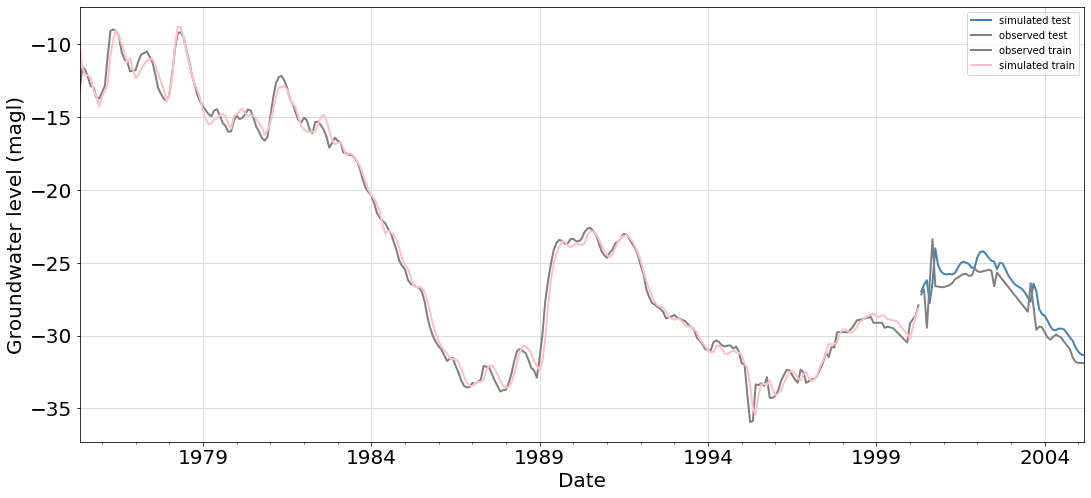

In [83]:
mse_lstm  = summary['mse_lstm'].mean(axis=0)
rmse_lstm = summary['rmse_lstm'].mean(axis=0)
mae_lstm  = summary['mae_lstm'].mean(axis=0)
r2_lstm   = summary['r2_lstm'].mean(axis=0)
stdv_lstm = stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_lstm, 3))
print("Mean squared error is:",round(mse_lstm,3))
print("Root mean squared error is:",round(rmse_lstm, 3))
print("Mean absolute error is:",round(mae_lstm,3))
print(round(stdv_lstm,3))


df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima1.iloc[300:359].index)
df1['observed test']      = pima['D4N0115'].iloc[300:359].values

df2 = pd.DataFrame(train_inverse_trans[6].values, columns = ['simulated train'],index =pima1.iloc[0:300].index)
df2['observed train'] = pima['D4N0115'].iloc[0:300].values

out_df = df2.append(df1, sort=True)




#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed train'].plot(color='grey', linewidth=2)
out_df['simulated train'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [84]:
y_lstm = out_df['simulated test']

### GRU

In [85]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import GRU
from tensorflow.keras.optimizers import Adam

In [86]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_gru', 'rmse_gru', 'r2_gru','mae_gru'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    optimizer = Adam(lr=0.00001)
    model = Sequential()
    model.add(GRU(20, input_shape=(1, 6)))
    model.add(Dropout(0.1))

    model.add(Dense(1))

    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    X_val_reshaped = X_val_reshaped.reshape(59, 6)

    #running function
    gwl = -0.36470768
    test_forecast = X_test
    steps_ahead = 59
    y_gru = forecast(model, test_forecast, gwl, steps_ahead)
    y_gru = np.array(y_gru)
    
    #metrics for test
    y_gru = y_gru
    test_pred.append(y_gru)
    mse_gru = mean_squared_error(y_test, y_gru)
    rmse_gru = np.sqrt(mse_gru)
    r2_gru = r2_score(y_test, y_gru)
    mae_gru = mean_absolute_error(y_test, y_gru)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_gru,Round), round(rmse_gru,Round), round(r2_gru,Round),round(mae_gru,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(300, 6)
Train on 300 samples, validate on 59 samples
Epoch 1/1000
 96/300 [========>.....................] - ETA: 4s - loss: 1.1571 - mean_squared_error: 1.1571
Epoch 00001: val_loss improved from inf to 0.32682, saving model to model.h5
300/300 [==============================] - 5s 17ms/sample - loss: 1.1134 - mean_squared_error: 1.1134 - val_loss: 0.3268 - val_mean_squared_error: 0.3268
Epoch 2/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.8877 - mean_squared_error: 0.8877
Epoch 00002: val_loss improved from 0.32682 to 0.29240, saving model to model.h5
300/300 [==============================] - 0s 175us/sample - loss: 0.9137 - mean_squared_error: 0.9137 - val_loss: 0.2924 - val_mean_squared_error: 0.2924
Epoch 3/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.8394 - mean_squared_error: 0.8394
Epoch 00003: val_loss improved from 0.29240 to 0.27303, saving model to model.h5
300/300 [==============================] - 0s 182us/sample 

Epoch 25/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0691 - mean_squared_error: 0.0691
Epoch 00025: val_loss improved from 0.03062 to 0.02925, saving model to model.h5
300/300 [==============================] - 0s 177us/sample - loss: 0.0794 - mean_squared_error: 0.0794 - val_loss: 0.0293 - val_mean_squared_error: 0.0293
Epoch 26/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0774 - mean_squared_error: 0.0774
Epoch 00026: val_loss improved from 0.02925 to 0.02804, saving model to model.h5
300/300 [==============================] - 0s 173us/sample - loss: 0.0829 - mean_squared_error: 0.0829 - val_loss: 0.0280 - val_mean_squared_error: 0.0280
Epoch 27/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0723 - mean_squared_error: 0.0723
Epoch 00027: val_loss improved from 0.02804 to 0.02704, saving model to model.h5
300/300 [==============================] - 0s 178us/sample - loss: 0.0771 - mean_squared_error: 0.0771 - val_loss: 0.027

Epoch 49/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0259 - mean_squared_error: 0.0259
Epoch 00049: val_loss improved from 0.01675 to 0.01662, saving model to model.h5
300/300 [==============================] - 0s 145us/sample - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0166 - val_mean_squared_error: 0.0166
Epoch 50/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0195 - mean_squared_error: 0.0195
Epoch 00050: val_loss improved from 0.01662 to 0.01648, saving model to model.h5
300/300 [==============================] - 0s 130us/sample - loss: 0.0247 - mean_squared_error: 0.0247 - val_loss: 0.0165 - val_mean_squared_error: 0.0165
Epoch 51/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0254 - mean_squared_error: 0.0254
Epoch 00051: val_loss did not improve from 0.01648
300/300 [==============================] - 0s 93us/sample - loss: 0.0227 - mean_squared_error: 0.0227 - val_loss: 0.0171 - val_mean_squared_error: 0.0

 96/300 [========>.....................] - ETA: 0s - loss: 0.0216 - mean_squared_error: 0.0216
Epoch 00074: val_loss did not improve from 0.01559
300/300 [==============================] - 0s 80us/sample - loss: 0.0205 - mean_squared_error: 0.0205 - val_loss: 0.0176 - val_mean_squared_error: 0.0176
Epoch 75/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0175 - mean_squared_error: 0.0175
Epoch 00075: val_loss did not improve from 0.01559
300/300 [==============================] - 0s 94us/sample - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 76/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0173 - mean_squared_error: 0.0173
Epoch 00076: val_loss did not improve from 0.01559
300/300 [==============================] - 0s 88us/sample - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 77/1000
 96/300 [========>.....................] - ETA: 0s - loss:

Epoch 100/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0143 - mean_squared_error: 0.0143
Epoch 00100: val_loss did not improve from 0.01522
300/300 [==============================] - 0s 139us/sample - loss: 0.0161 - mean_squared_error: 0.0161 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 101/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0120 - mean_squared_error: 0.0120
Epoch 00101: val_loss did not improve from 0.01522
300/300 [==============================] - 0s 138us/sample - loss: 0.0178 - mean_squared_error: 0.0178 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 102/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 00102: val_loss did not improve from 0.01522
300/300 [==============================] - 0s 99us/sample - loss: 0.0171 - mean_squared_error: 0.0171 - val_loss: 0.0164 - val_mean_squared_error: 0.0164
Epoch 103/1000
 96/300 [========>....................

Epoch 126/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0260 - mean_squared_error: 0.0260
Epoch 00126: val_loss did not improve from 0.01500
300/300 [==============================] - 0s 87us/sample - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 127/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0200 - mean_squared_error: 0.0200
Epoch 00127: val_loss did not improve from 0.01500
300/300 [==============================] - 0s 114us/sample - loss: 0.0185 - mean_squared_error: 0.0185 - val_loss: 0.0173 - val_mean_squared_error: 0.0173
Epoch 128/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0157 - mean_squared_error: 0.0157
Epoch 00128: val_loss did not improve from 0.01500
300/300 [==============================] - 0s 177us/sample - loss: 0.0167 - mean_squared_error: 0.0167 - val_loss: 0.0159 - val_mean_squared_error: 0.0159
Epoch 129/1000
 96/300 [========>....................

Epoch 152/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0164 - mean_squared_error: 0.0164
Epoch 00152: val_loss did not improve from 0.01482
300/300 [==============================] - 0s 138us/sample - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 153/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 00153: val_loss did not improve from 0.01482
300/300 [==============================] - 0s 126us/sample - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 0.0166 - val_mean_squared_error: 0.0166
Epoch 154/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0145 - mean_squared_error: 0.0145
Epoch 00154: val_loss did not improve from 0.01482
300/300 [==============================] - 0s 94us/sample - loss: 0.0161 - mean_squared_error: 0.0161 - val_loss: 0.0171 - val_mean_squared_error: 0.0171
Epoch 155/1000
 96/300 [========>....................

Epoch 178/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 00178: val_loss did not improve from 0.01482
300/300 [==============================] - 0s 143us/sample - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 179/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 00179: val_loss did not improve from 0.01482
300/300 [==============================] - 0s 118us/sample - loss: 0.0151 - mean_squared_error: 0.0151 - val_loss: 0.0184 - val_mean_squared_error: 0.0184
Epoch 180/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0194 - mean_squared_error: 0.0194
Epoch 00180: val_loss did not improve from 0.01482
300/300 [==============================] - 0s 103us/sample - loss: 0.0163 - mean_squared_error: 0.0163 - val_loss: 0.0175 - val_mean_squared_error: 0.0175
Epoch 181/1000
 96/300 [========>...................

Epoch 204/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 00204: val_loss did not improve from 0.01482
300/300 [==============================] - 0s 94us/sample - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch 205/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 00205: val_loss did not improve from 0.01482
300/300 [==============================] - 0s 79us/sample - loss: 0.0144 - mean_squared_error: 0.0144 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 206/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0147 - mean_squared_error: 0.0147
Epoch 00206: val_loss did not improve from 0.01482
300/300 [==============================] - 0s 112us/sample - loss: 0.0148 - mean_squared_error: 0.0148 - val_loss: 0.0166 - val_mean_squared_error: 0.0166
Epoch 207/1000
 96/300 [========>.....................

Epoch 230/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0095 - mean_squared_error: 0.0095
Epoch 00230: val_loss did not improve from 0.01482
300/300 [==============================] - 0s 288us/sample - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
Epoch 231/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 00231: val_loss did not improve from 0.01482
300/300 [==============================] - 0s 86us/sample - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 232/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0155 - mean_squared_error: 0.0155
Epoch 00232: val_loss did not improve from 0.01482
300/300 [==============================] - 0s 92us/sample - loss: 0.0147 - mean_squared_error: 0.0147 - val_loss: 0.0176 - val_mean_squared_error: 0.0176
Epoch 233/1000
 96/300 [========>.....................

 96/300 [========>.....................] - ETA: 0s - loss: 0.0344 - mean_squared_error: 0.0344
Epoch 00020: val_loss did not improve from 0.03709
300/300 [==============================] - 0s 302us/sample - loss: 0.0382 - mean_squared_error: 0.0382 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 21/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0451 - mean_squared_error: 0.0451
Epoch 00021: val_loss did not improve from 0.03709
300/300 [==============================] - 0s 187us/sample - loss: 0.0389 - mean_squared_error: 0.0389 - val_loss: 0.0447 - val_mean_squared_error: 0.0447
Epoch 22/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0346 - mean_squared_error: 0.0346
Epoch 00022: val_loss did not improve from 0.03709
300/300 [==============================] - 0s 104us/sample - loss: 0.0363 - mean_squared_error: 0.0364 - val_loss: 0.0406 - val_mean_squared_error: 0.0406
Epoch 23/1000
 96/300 [========>.....................] - ETA: 0s - lo

Epoch 45/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0218 - mean_squared_error: 0.0218
Epoch 00045: val_loss improved from 0.01661 to 0.01655, saving model to model.h5
300/300 [==============================] - 0s 175us/sample - loss: 0.0200 - mean_squared_error: 0.0200 - val_loss: 0.0165 - val_mean_squared_error: 0.0165
Epoch 46/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0278 - mean_squared_error: 0.0278
Epoch 00046: val_loss did not improve from 0.01655
300/300 [==============================] - 0s 87us/sample - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.0168 - val_mean_squared_error: 0.0168
Epoch 47/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0251 - mean_squared_error: 0.0251
Epoch 00047: val_loss did not improve from 0.01655
300/300 [==============================] - 0s 138us/sample - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0169 - val_mean_squared_error: 0.0169
Epoch 48/1000
 96/300 [===

Epoch 71/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0206 - mean_squared_error: 0.0206
Epoch 00071: val_loss did not improve from 0.01655
300/300 [==============================] - 0s 106us/sample - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0178 - val_mean_squared_error: 0.0178
Epoch 72/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0275 - mean_squared_error: 0.0275
Epoch 00072: val_loss did not improve from 0.01655
300/300 [==============================] - 0s 86us/sample - loss: 0.0205 - mean_squared_error: 0.0205 - val_loss: 0.0194 - val_mean_squared_error: 0.0194
Epoch 73/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0178 - mean_squared_error: 0.0178
Epoch 00073: val_loss did not improve from 0.01655
300/300 [==============================] - 0s 88us/sample - loss: 0.0201 - mean_squared_error: 0.0201 - val_loss: 0.0198 - val_mean_squared_error: 0.0198
Epoch 74/1000
 96/300 [========>.....................] - 

Epoch 97/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0145 - mean_squared_error: 0.0145
Epoch 00097: val_loss did not improve from 0.01640
300/300 [==============================] - 0s 121us/sample - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0194 - val_mean_squared_error: 0.0194
Epoch 98/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0175 - mean_squared_error: 0.0175
Epoch 00098: val_loss did not improve from 0.01640
300/300 [==============================] - 0s 123us/sample - loss: 0.0179 - mean_squared_error: 0.0179 - val_loss: 0.0179 - val_mean_squared_error: 0.0179
Epoch 99/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0261 - mean_squared_error: 0.0261
Epoch 00099: val_loss did not improve from 0.01640
300/300 [==============================] - 0s 135us/sample - loss: 0.0181 - mean_squared_error: 0.0181 - val_loss: 0.0184 - val_mean_squared_error: 0.0184
Epoch 100/1000
 96/300 [========>.....................]

Epoch 123/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0173 - mean_squared_error: 0.0173
Epoch 00123: val_loss did not improve from 0.01627
300/300 [==============================] - 0s 127us/sample - loss: 0.0172 - mean_squared_error: 0.0172 - val_loss: 0.0181 - val_mean_squared_error: 0.0181
Epoch 124/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0199 - mean_squared_error: 0.0199
Epoch 00124: val_loss did not improve from 0.01627
300/300 [==============================] - 0s 125us/sample - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0187 - val_mean_squared_error: 0.0187
Epoch 125/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0145 - mean_squared_error: 0.0145
Epoch 00125: val_loss did not improve from 0.01627
300/300 [==============================] - 0s 111us/sample - loss: 0.0163 - mean_squared_error: 0.0163 - val_loss: 0.0207 - val_mean_squared_error: 0.0207
Epoch 126/1000
 96/300 [========>...................

Epoch 149/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0139 - mean_squared_error: 0.0139
Epoch 00149: val_loss did not improve from 0.01575
300/300 [==============================] - 0s 158us/sample - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.0184 - val_mean_squared_error: 0.0184
Epoch 150/1000
288/300 [===========================>..] - ETA: 0s - loss: 0.0169 - mean_squared_error: 0.0169
Epoch 00150: val_loss did not improve from 0.01575
300/300 [==============================] - 0s 271us/sample - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.0194 - val_mean_squared_error: 0.0194
Epoch 151/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0185 - mean_squared_error: 0.0185
Epoch 00151: val_loss did not improve from 0.01575
300/300 [==============================] - 0s 214us/sample - loss: 0.0188 - mean_squared_error: 0.0188 - val_loss: 0.0202 - val_mean_squared_error: 0.0202
Epoch 152/1000
 96/300 [========>...................

Epoch 175/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 00175: val_loss did not improve from 0.01567
300/300 [==============================] - 0s 103us/sample - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.0183 - val_mean_squared_error: 0.0183
Epoch 176/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 00176: val_loss did not improve from 0.01567
300/300 [==============================] - 0s 146us/sample - loss: 0.0155 - mean_squared_error: 0.0155 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 177/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 00177: val_loss did not improve from 0.01567
300/300 [==============================] - 0s 95us/sample - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0182 - val_mean_squared_error: 0.0182
Epoch 178/1000
 96/300 [========>....................

Epoch 201/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0182 - mean_squared_error: 0.0182
Epoch 00201: val_loss did not improve from 0.01567
300/300 [==============================] - 0s 112us/sample - loss: 0.0143 - mean_squared_error: 0.0143 - val_loss: 0.0186 - val_mean_squared_error: 0.0186
Epoch 202/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0129 - mean_squared_error: 0.0129
Epoch 00202: val_loss did not improve from 0.01567
300/300 [==============================] - 0s 148us/sample - loss: 0.0144 - mean_squared_error: 0.0144 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 203/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0179 - mean_squared_error: 0.0179
Epoch 00203: val_loss did not improve from 0.01567
300/300 [==============================] - 0s 113us/sample - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0201 - val_mean_squared_error: 0.0201
Epoch 204/1000
 96/300 [========>...................

Epoch 227/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0130 - mean_squared_error: 0.0130
Epoch 00227: val_loss did not improve from 0.01567
300/300 [==============================] - 0s 104us/sample - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.0179 - val_mean_squared_error: 0.0179
Epoch 228/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0158 - mean_squared_error: 0.0158
Epoch 00228: val_loss did not improve from 0.01567
300/300 [==============================] - 0s 119us/sample - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.0165 - val_mean_squared_error: 0.0165
Epoch 229/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 00229: val_loss did not improve from 0.01567
300/300 [==============================] - 0s 103us/sample - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0188 - val_mean_squared_error: 0.0188
Epoch 230/1000
 96/300 [========>...................

Epoch 253/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0145 - mean_squared_error: 0.0145
Epoch 00253: val_loss did not improve from 0.01567
300/300 [==============================] - 0s 92us/sample - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0166 - val_mean_squared_error: 0.0166
Epoch 254/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 00254: val_loss did not improve from 0.01567
300/300 [==============================] - 0s 83us/sample - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0182 - val_mean_squared_error: 0.0182
Epoch 255/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 00255: val_loss did not improve from 0.01567
300/300 [==============================] - 0s 81us/sample - loss: 0.0156 - mean_squared_error: 0.0156 - val_loss: 0.0183 - val_mean_squared_error: 0.0183
Epoch 256/1000
 96/300 [========>.....................]

 96/300 [========>.....................] - ETA: 0s - loss: 0.1992 - mean_squared_error: 0.1992
Epoch 00020: val_loss improved from 0.10474 to 0.09284, saving model to model.h5
300/300 [==============================] - 0s 186us/sample - loss: 0.2270 - mean_squared_error: 0.2270 - val_loss: 0.0928 - val_mean_squared_error: 0.0928
Epoch 21/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.2349 - mean_squared_error: 0.2349
Epoch 00021: val_loss improved from 0.09284 to 0.08405, saving model to model.h5
300/300 [==============================] - 0s 145us/sample - loss: 0.2081 - mean_squared_error: 0.2081 - val_loss: 0.0840 - val_mean_squared_error: 0.0840
Epoch 22/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.1923 - mean_squared_error: 0.1923
Epoch 00022: val_loss improved from 0.08405 to 0.07606, saving model to model.h5
300/300 [==============================] - 0s 185us/sample - loss: 0.1979 - mean_squared_error: 0.1979 - val_loss: 0.0761 - val_mean_s

Epoch 45/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0398 - mean_squared_error: 0.0398
Epoch 00045: val_loss did not improve from 0.02511
300/300 [==============================] - 0s 96us/sample - loss: 0.0431 - mean_squared_error: 0.0431 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 46/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0391 - mean_squared_error: 0.0391
Epoch 00046: val_loss improved from 0.02511 to 0.02506, saving model to model.h5
300/300 [==============================] - 0s 191us/sample - loss: 0.0394 - mean_squared_error: 0.0394 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 47/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0470 - mean_squared_error: 0.0470
Epoch 00047: val_loss did not improve from 0.02506
300/300 [==============================] - 0s 119us/sample - loss: 0.0453 - mean_squared_error: 0.0453 - val_loss: 0.0274 - val_mean_squared_error: 0.0274
Epoch 48/1000
 96/300 [===

Epoch 70/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0253 - mean_squared_error: 0.0253
Epoch 00070: val_loss did not improve from 0.01511
300/300 [==============================] - 0s 141us/sample - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 71/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0219 - mean_squared_error: 0.0219
Epoch 00071: val_loss did not improve from 0.01511
300/300 [==============================] - 0s 94us/sample - loss: 0.0183 - mean_squared_error: 0.0183 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 72/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0199 - mean_squared_error: 0.0199
Epoch 00072: val_loss did not improve from 0.01511
300/300 [==============================] - 0s 88us/sample - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 73/1000
 96/300 [========>.....................] - 

Epoch 96/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0202 - mean_squared_error: 0.0202
Epoch 00096: val_loss did not improve from 0.01504
300/300 [==============================] - 0s 104us/sample - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 97/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0175 - mean_squared_error: 0.0175
Epoch 00097: val_loss did not improve from 0.01504
300/300 [==============================] - 0s 126us/sample - loss: 0.0163 - mean_squared_error: 0.0163 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 98/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0159 - mean_squared_error: 0.0159
Epoch 00098: val_loss did not improve from 0.01504
300/300 [==============================] - 0s 87us/sample - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 99/1000
 96/300 [========>.....................] -

Epoch 122/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0169 - mean_squared_error: 0.0169
Epoch 00122: val_loss did not improve from 0.01504
300/300 [==============================] - 0s 87us/sample - loss: 0.0186 - mean_squared_error: 0.0186 - val_loss: 0.0192 - val_mean_squared_error: 0.0192
Epoch 123/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0190 - mean_squared_error: 0.0190
Epoch 00123: val_loss did not improve from 0.01504
300/300 [==============================] - 0s 82us/sample - loss: 0.0166 - mean_squared_error: 0.0166 - val_loss: 0.0185 - val_mean_squared_error: 0.0185
Epoch 124/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0200 - mean_squared_error: 0.0200
Epoch 00124: val_loss did not improve from 0.01504
300/300 [==============================] - 0s 117us/sample - loss: 0.0175 - mean_squared_error: 0.0175 - val_loss: 0.0199 - val_mean_squared_error: 0.0199
Epoch 125/1000
 96/300 [========>.....................

Epoch 148/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0170 - mean_squared_error: 0.0170
Epoch 00148: val_loss did not improve from 0.01504
300/300 [==============================] - 0s 98us/sample - loss: 0.0156 - mean_squared_error: 0.0156 - val_loss: 0.0201 - val_mean_squared_error: 0.0201
Epoch 149/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0150 - mean_squared_error: 0.0150
Epoch 00149: val_loss did not improve from 0.01504
300/300 [==============================] - 0s 91us/sample - loss: 0.0157 - mean_squared_error: 0.0157 - val_loss: 0.0205 - val_mean_squared_error: 0.0205
Epoch 150/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 00150: val_loss did not improve from 0.01504
300/300 [==============================] - 0s 91us/sample - loss: 0.0161 - mean_squared_error: 0.0161 - val_loss: 0.0194 - val_mean_squared_error: 0.0194
Epoch 151/1000
 96/300 [========>.....................]

Epoch 174/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0171 - mean_squared_error: 0.0171
Epoch 00174: val_loss did not improve from 0.01504
300/300 [==============================] - 0s 117us/sample - loss: 0.0157 - mean_squared_error: 0.0157 - val_loss: 0.0185 - val_mean_squared_error: 0.0185
Epoch 175/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0201 - mean_squared_error: 0.0201
Epoch 00175: val_loss did not improve from 0.01504
300/300 [==============================] - 0s 98us/sample - loss: 0.0156 - mean_squared_error: 0.0156 - val_loss: 0.0184 - val_mean_squared_error: 0.0184
Running fold 4
(300, 6)
Train on 300 samples, validate on 59 samples
Epoch 1/1000
 96/300 [========>.....................] - ETA: 4s - loss: 1.3612 - mean_squared_error: 1.3612
Epoch 00001: val_loss improved from inf to 0.28105, saving model to model.h5
300/300 [==============================] - 5s 18ms/sample - loss: 1.1032 - mean_squared_error: 1.1032 - val_loss: 0

Epoch 23/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0929 - mean_squared_error: 0.0929
Epoch 00023: val_loss improved from 0.03336 to 0.03320, saving model to model.h5
300/300 [==============================] - 0s 159us/sample - loss: 0.0824 - mean_squared_error: 0.0824 - val_loss: 0.0332 - val_mean_squared_error: 0.0332
Epoch 24/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0813 - mean_squared_error: 0.0813
Epoch 00024: val_loss improved from 0.03320 to 0.03265, saving model to model.h5
300/300 [==============================] - 0s 214us/sample - loss: 0.0730 - mean_squared_error: 0.0730 - val_loss: 0.0327 - val_mean_squared_error: 0.0327
Epoch 25/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0821 - mean_squared_error: 0.0821
Epoch 00025: val_loss improved from 0.03265 to 0.03259, saving model to model.h5
300/300 [==============================] - 0s 163us/sample - loss: 0.0667 - mean_squared_error: 0.0667 - val_loss: 0.032

Epoch 48/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0313 - mean_squared_error: 0.0313
Epoch 00048: val_loss did not improve from 0.01824
300/300 [==============================] - 0s 106us/sample - loss: 0.0257 - mean_squared_error: 0.0257 - val_loss: 0.0190 - val_mean_squared_error: 0.0190
Epoch 49/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0180 - mean_squared_error: 0.0180
Epoch 00049: val_loss did not improve from 0.01824
300/300 [==============================] - 0s 208us/sample - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 50/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0228 - mean_squared_error: 0.0228
Epoch 00050: val_loss improved from 0.01824 to 0.01780, saving model to model.h5
300/300 [==============================] - 0s 168us/sample - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0178 - val_mean_squared_error: 0.0178
Epoch 51/1000
 96/300 [==

Epoch 74/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0232 - mean_squared_error: 0.0232
Epoch 00074: val_loss did not improve from 0.01648
300/300 [==============================] - 0s 107us/sample - loss: 0.0203 - mean_squared_error: 0.0203 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 75/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0180 - mean_squared_error: 0.0180
Epoch 00075: val_loss did not improve from 0.01648
300/300 [==============================] - 0s 105us/sample - loss: 0.0201 - mean_squared_error: 0.0201 - val_loss: 0.0171 - val_mean_squared_error: 0.0171
Epoch 76/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 00076: val_loss did not improve from 0.01648
300/300 [==============================] - 0s 98us/sample - loss: 0.0166 - mean_squared_error: 0.0166 - val_loss: 0.0190 - val_mean_squared_error: 0.0190
Epoch 77/1000
 96/300 [========>.....................] -

 96/300 [========>.....................] - ETA: 0s - loss: 0.0193 - mean_squared_error: 0.0193
Epoch 00100: val_loss did not improve from 0.01648
300/300 [==============================] - 0s 89us/sample - loss: 0.0162 - mean_squared_error: 0.0162 - val_loss: 0.0182 - val_mean_squared_error: 0.0182
Epoch 101/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0170 - mean_squared_error: 0.0170
Epoch 00101: val_loss did not improve from 0.01648
300/300 [==============================] - 0s 111us/sample - loss: 0.0175 - mean_squared_error: 0.0175 - val_loss: 0.0167 - val_mean_squared_error: 0.0167
Epoch 102/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0240 - mean_squared_error: 0.0240
Epoch 00102: val_loss did not improve from 0.01648
300/300 [==============================] - 0s 89us/sample - loss: 0.0206 - mean_squared_error: 0.0206 - val_loss: 0.0179 - val_mean_squared_error: 0.0179
Epoch 103/1000
 96/300 [========>.....................] - ETA: 0s - l

Epoch 126/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0207 - mean_squared_error: 0.0207
Epoch 00126: val_loss did not improve from 0.01648
300/300 [==============================] - 0s 165us/sample - loss: 0.0161 - mean_squared_error: 0.0161 - val_loss: 0.0226 - val_mean_squared_error: 0.0226
Epoch 127/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0206 - mean_squared_error: 0.0206
Epoch 00127: val_loss did not improve from 0.01648
300/300 [==============================] - 0s 127us/sample - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.0185 - val_mean_squared_error: 0.0185
Epoch 128/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0174 - mean_squared_error: 0.0174
Epoch 00128: val_loss did not improve from 0.01648
300/300 [==============================] - 0s 137us/sample - loss: 0.0175 - mean_squared_error: 0.0175 - val_loss: 0.0191 - val_mean_squared_error: 0.0191
Epoch 129/1000
 96/300 [========>...................

Epoch 152/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0162 - mean_squared_error: 0.0162
Epoch 00152: val_loss did not improve from 0.01648
300/300 [==============================] - 0s 88us/sample - loss: 0.0147 - mean_squared_error: 0.0147 - val_loss: 0.0226 - val_mean_squared_error: 0.0226
Epoch 153/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0145 - mean_squared_error: 0.0145
Epoch 00153: val_loss did not improve from 0.01648
300/300 [==============================] - 0s 92us/sample - loss: 0.0170 - mean_squared_error: 0.0170 - val_loss: 0.0214 - val_mean_squared_error: 0.0214
Epoch 154/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0199 - mean_squared_error: 0.0199
Epoch 00154: val_loss did not improve from 0.01648
300/300 [==============================] - 0s 106us/sample - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.0200 - val_mean_squared_error: 0.0200
Epoch 155/1000
 96/300 [========>.....................

300/300 [==============================] - 0s 284us/sample - loss: 0.1035 - mean_squared_error: 0.1035 - val_loss: 0.0313 - val_mean_squared_error: 0.0313
Epoch 17/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0966 - mean_squared_error: 0.0966
Epoch 00017: val_loss improved from 0.03135 to 0.02685, saving model to model.h5
300/300 [==============================] - 0s 255us/sample - loss: 0.0922 - mean_squared_error: 0.0922 - val_loss: 0.0269 - val_mean_squared_error: 0.0269
Epoch 18/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0828 - mean_squared_error: 0.0828
Epoch 00018: val_loss improved from 0.02685 to 0.02341, saving model to model.h5
300/300 [==============================] - 0s 299us/sample - loss: 0.0798 - mean_squared_error: 0.0798 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 19/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0761 - mean_squared_error: 0.0761
Epoch 00019: val_loss improved from 0.02341 to

 96/300 [========>.....................] - ETA: 0s - loss: 0.0268 - mean_squared_error: 0.0268
Epoch 00041: val_loss did not improve from 0.01573
300/300 [==============================] - 0s 147us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 42/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 00042: val_loss did not improve from 0.01573
300/300 [==============================] - 0s 113us/sample - loss: 0.0206 - mean_squared_error: 0.0206 - val_loss: 0.0159 - val_mean_squared_error: 0.0159
Epoch 43/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0265 - mean_squared_error: 0.0265
Epoch 00043: val_loss did not improve from 0.01573
300/300 [==============================] - 0s 111us/sample - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0160 - val_mean_squared_error: 0.0160
Epoch 44/1000
 96/300 [========>.....................] - ETA: 0s - lo

 96/300 [========>.....................] - ETA: 0s - loss: 0.0211 - mean_squared_error: 0.0211
Epoch 00067: val_loss did not improve from 0.01573
300/300 [==============================] - 0s 113us/sample - loss: 0.0196 - mean_squared_error: 0.0196 - val_loss: 0.0208 - val_mean_squared_error: 0.0208
Epoch 68/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0247 - mean_squared_error: 0.0247
Epoch 00068: val_loss did not improve from 0.01573
300/300 [==============================] - 0s 96us/sample - loss: 0.0212 - mean_squared_error: 0.0212 - val_loss: 0.0200 - val_mean_squared_error: 0.0200
Epoch 69/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0158 - mean_squared_error: 0.0158
Epoch 00069: val_loss did not improve from 0.01573
300/300 [==============================] - 0s 104us/sample - loss: 0.0200 - mean_squared_error: 0.0200 - val_loss: 0.0190 - val_mean_squared_error: 0.0190
Epoch 70/1000
 96/300 [========>.....................] - ETA: 0s - los

 96/300 [========>.....................] - ETA: 0s - loss: 0.0276 - mean_squared_error: 0.0276
Epoch 00093: val_loss did not improve from 0.01573
300/300 [==============================] - 0s 141us/sample - loss: 0.0215 - mean_squared_error: 0.0215 - val_loss: 0.0226 - val_mean_squared_error: 0.0226
Epoch 94/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0207 - mean_squared_error: 0.0207
Epoch 00094: val_loss did not improve from 0.01573
300/300 [==============================] - 0s 109us/sample - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0185 - val_mean_squared_error: 0.0185
Epoch 95/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0181 - mean_squared_error: 0.0181
Epoch 00095: val_loss did not improve from 0.01573
300/300 [==============================] - 0s 84us/sample - loss: 0.0188 - mean_squared_error: 0.0188 - val_loss: 0.0183 - val_mean_squared_error: 0.0183
Epoch 96/1000
 96/300 [========>.....................] - ETA: 0s - los

 96/300 [========>.....................] - ETA: 0s - loss: 0.0213 - mean_squared_error: 0.0213
Epoch 00119: val_loss did not improve from 0.01573
300/300 [==============================] - 0s 118us/sample - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.0213 - val_mean_squared_error: 0.0213
Epoch 120/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 00120: val_loss did not improve from 0.01573
300/300 [==============================] - 0s 94us/sample - loss: 0.0144 - mean_squared_error: 0.0144 - val_loss: 0.0216 - val_mean_squared_error: 0.0216
Epoch 121/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0168 - mean_squared_error: 0.0168
Epoch 00121: val_loss did not improve from 0.01573
300/300 [==============================] - 0s 97us/sample - loss: 0.0181 - mean_squared_error: 0.0181 - val_loss: 0.0188 - val_mean_squared_error: 0.0188
Epoch 122/1000
 96/300 [========>.....................] - ETA: 0s - l

Epoch 10/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.2974 - mean_squared_error: 0.2974
Epoch 00010: val_loss improved from 0.12443 to 0.10754, saving model to model.h5
300/300 [==============================] - 0s 182us/sample - loss: 0.2876 - mean_squared_error: 0.2876 - val_loss: 0.1075 - val_mean_squared_error: 0.1075
Epoch 11/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.2816 - mean_squared_error: 0.2816
Epoch 00011: val_loss improved from 0.10754 to 0.09099, saving model to model.h5
300/300 [==============================] - 0s 169us/sample - loss: 0.2425 - mean_squared_error: 0.2425 - val_loss: 0.0910 - val_mean_squared_error: 0.0910
Epoch 12/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.2257 - mean_squared_error: 0.2257
Epoch 00012: val_loss improved from 0.09099 to 0.07879, saving model to model.h5
300/300 [==============================] - 0s 176us/sample - loss: 0.2133 - mean_squared_error: 0.2133 - val_loss: 0.078

 96/300 [========>.....................] - ETA: 0s - loss: 0.0301 - mean_squared_error: 0.0301
Epoch 00034: val_loss did not improve from 0.02034
300/300 [==============================] - 0s 170us/sample - loss: 0.0361 - mean_squared_error: 0.0361 - val_loss: 0.0209 - val_mean_squared_error: 0.0209
Epoch 35/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0401 - mean_squared_error: 0.0401
Epoch 00035: val_loss improved from 0.02034 to 0.01971, saving model to model.h5
300/300 [==============================] - 0s 164us/sample - loss: 0.0368 - mean_squared_error: 0.0368 - val_loss: 0.0197 - val_mean_squared_error: 0.0197
Epoch 36/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0243 - mean_squared_error: 0.0243
Epoch 00036: val_loss improved from 0.01971 to 0.01881, saving model to model.h5
300/300 [==============================] - 0s 171us/sample - loss: 0.0316 - mean_squared_error: 0.0316 - val_loss: 0.0188 - val_mean_squared_error: 0.0188
Epoch 37/

 96/300 [========>.....................] - ETA: 0s - loss: 0.0144 - mean_squared_error: 0.0144
Epoch 00059: val_loss did not improve from 0.01483
300/300 [==============================] - 0s 115us/sample - loss: 0.0210 - mean_squared_error: 0.0210 - val_loss: 0.0175 - val_mean_squared_error: 0.0175
Epoch 60/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 00060: val_loss did not improve from 0.01483
300/300 [==============================] - 0s 129us/sample - loss: 0.0216 - mean_squared_error: 0.0216 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 61/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0276 - mean_squared_error: 0.0276
Epoch 00061: val_loss did not improve from 0.01483
300/300 [==============================] - 0s 92us/sample - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0186 - val_mean_squared_error: 0.0186
Epoch 62/1000
 96/300 [========>.....................] - ETA: 0s - los

 96/300 [========>.....................] - ETA: 0s - loss: 0.0143 - mean_squared_error: 0.0143
Epoch 00085: val_loss did not improve from 0.01483
300/300 [==============================] - 0s 99us/sample - loss: 0.0167 - mean_squared_error: 0.0167 - val_loss: 0.0182 - val_mean_squared_error: 0.0182
Epoch 86/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0181 - mean_squared_error: 0.0181
Epoch 00086: val_loss did not improve from 0.01483
300/300 [==============================] - 0s 107us/sample - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.0167 - val_mean_squared_error: 0.0167
Epoch 87/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0232 - mean_squared_error: 0.0232
Epoch 00087: val_loss did not improve from 0.01483
300/300 [==============================] - 0s 91us/sample - loss: 0.0174 - mean_squared_error: 0.0174 - val_loss: 0.0171 - val_mean_squared_error: 0.0171
Epoch 88/1000
 96/300 [========>.....................] - ETA: 0s - loss

 96/300 [========>.....................] - ETA: 0s - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 00111: val_loss did not improve from 0.01483
300/300 [==============================] - 0s 118us/sample - loss: 0.0183 - mean_squared_error: 0.0183 - val_loss: 0.0209 - val_mean_squared_error: 0.0209
Epoch 112/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0200 - mean_squared_error: 0.0200
Epoch 00112: val_loss did not improve from 0.01483
300/300 [==============================] - 0s 110us/sample - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.0200 - val_mean_squared_error: 0.0200
Epoch 113/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0157 - mean_squared_error: 0.0157
Epoch 00113: val_loss did not improve from 0.01483
300/300 [==============================] - 0s 117us/sample - loss: 0.0181 - mean_squared_error: 0.0181 - val_loss: 0.0177 - val_mean_squared_error: 0.0177
Epoch 114/1000
 96/300 [========>.....................] - ETA: 0s -

Epoch 137/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0158 - mean_squared_error: 0.0158
Epoch 00137: val_loss did not improve from 0.01483
300/300 [==============================] - 0s 89us/sample - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.0216 - val_mean_squared_error: 0.0216
Epoch 138/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0152 - mean_squared_error: 0.0152
Epoch 00138: val_loss did not improve from 0.01483
300/300 [==============================] - 0s 91us/sample - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 0.0190 - val_mean_squared_error: 0.0190
Epoch 139/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0156 - mean_squared_error: 0.0156
Epoch 00139: val_loss did not improve from 0.01483
300/300 [==============================] - 0s 98us/sample - loss: 0.0141 - mean_squared_error: 0.0141 - val_loss: 0.0190 - val_mean_squared_error: 0.0190
Epoch 140/1000
 96/300 [========>.....................]

Epoch 16/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.1028 - mean_squared_error: 0.1028
Epoch 00016: val_loss did not improve from 0.03797
300/300 [==============================] - 0s 90us/sample - loss: 0.1006 - mean_squared_error: 0.1006 - val_loss: 0.0487 - val_mean_squared_error: 0.0487
Epoch 17/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0944 - mean_squared_error: 0.0944
Epoch 00017: val_loss did not improve from 0.03797
300/300 [==============================] - 0s 85us/sample - loss: 0.0952 - mean_squared_error: 0.0952 - val_loss: 0.0503 - val_mean_squared_error: 0.0503
Epoch 18/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0826 - mean_squared_error: 0.0826
Epoch 00018: val_loss did not improve from 0.03797
300/300 [==============================] - 0s 100us/sample - loss: 0.0863 - mean_squared_error: 0.0863 - val_loss: 0.0530 - val_mean_squared_error: 0.0530
Epoch 19/1000
 96/300 [========>.....................] - 

300/300 [==============================] - 0s 176us/sample - loss: 0.0297 - mean_squared_error: 0.0297 - val_loss: 0.0228 - val_mean_squared_error: 0.0228
Epoch 42/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0236 - mean_squared_error: 0.0236
Epoch 00042: val_loss improved from 0.02285 to 0.02155, saving model to model.h5
300/300 [==============================] - 0s 172us/sample - loss: 0.0273 - mean_squared_error: 0.0273 - val_loss: 0.0216 - val_mean_squared_error: 0.0216
Epoch 43/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0272 - mean_squared_error: 0.0272
Epoch 00043: val_loss improved from 0.02155 to 0.01875, saving model to model.h5
300/300 [==============================] - 0s 182us/sample - loss: 0.0267 - mean_squared_error: 0.0267 - val_loss: 0.0187 - val_mean_squared_error: 0.0187
Epoch 44/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0211 - mean_squared_error: 0.0211
Epoch 00044: val_loss improved from 0.01875 to

Epoch 67/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0212 - mean_squared_error: 0.0212
Epoch 00067: val_loss did not improve from 0.01503
300/300 [==============================] - 0s 145us/sample - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 68/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0277 - mean_squared_error: 0.0277
Epoch 00068: val_loss did not improve from 0.01503
300/300 [==============================] - 0s 116us/sample - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.0164 - val_mean_squared_error: 0.0164
Epoch 69/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0217 - mean_squared_error: 0.0217
Epoch 00069: val_loss did not improve from 0.01503
300/300 [==============================] - 0s 114us/sample - loss: 0.0216 - mean_squared_error: 0.0216 - val_loss: 0.0193 - val_mean_squared_error: 0.0193
Epoch 70/1000
 96/300 [========>.....................] 

 96/300 [========>.....................] - ETA: 0s - loss: 0.0216 - mean_squared_error: 0.0216
Epoch 00093: val_loss did not improve from 0.01503
300/300 [==============================] - 0s 163us/sample - loss: 0.0176 - mean_squared_error: 0.0176 - val_loss: 0.0190 - val_mean_squared_error: 0.0190
Epoch 94/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0131 - mean_squared_error: 0.0131
Epoch 00094: val_loss did not improve from 0.01503
300/300 [==============================] - 0s 187us/sample - loss: 0.0193 - mean_squared_error: 0.0193 - val_loss: 0.0188 - val_mean_squared_error: 0.0188
Epoch 95/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0205 - mean_squared_error: 0.0205
Epoch 00095: val_loss did not improve from 0.01503
300/300 [==============================] - 0s 123us/sample - loss: 0.0181 - mean_squared_error: 0.0181 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 96/1000
 96/300 [========>.....................] - ETA: 0s - lo

 96/300 [========>.....................] - ETA: 0s - loss: 0.0172 - mean_squared_error: 0.0172
Epoch 00119: val_loss did not improve from 0.01503
300/300 [==============================] - 0s 124us/sample - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.0200 - val_mean_squared_error: 0.0200
Epoch 120/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0234 - mean_squared_error: 0.0234
Epoch 00120: val_loss did not improve from 0.01503
300/300 [==============================] - 0s 111us/sample - loss: 0.0212 - mean_squared_error: 0.0212 - val_loss: 0.0227 - val_mean_squared_error: 0.0227
Epoch 121/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0162 - mean_squared_error: 0.0162
Epoch 00121: val_loss did not improve from 0.01503
300/300 [==============================] - 0s 86us/sample - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 122/1000
 96/300 [========>.....................] - ETA: 0s - 

Epoch 145/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0205 - mean_squared_error: 0.0205
Epoch 00145: val_loss did not improve from 0.01503
300/300 [==============================] - 0s 93us/sample - loss: 0.0150 - mean_squared_error: 0.0150 - val_loss: 0.0211 - val_mean_squared_error: 0.0211
Epoch 146/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0156 - mean_squared_error: 0.0156
Epoch 00146: val_loss did not improve from 0.01503
300/300 [==============================] - 0s 101us/sample - loss: 0.0155 - mean_squared_error: 0.0155 - val_loss: 0.0224 - val_mean_squared_error: 0.0224
Epoch 147/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0153 - mean_squared_error: 0.0153
Epoch 00147: val_loss did not improve from 0.01503
300/300 [==============================] - 0s 106us/sample - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0207 - val_mean_squared_error: 0.0207
Epoch 148/1000
 96/300 [========>....................

Epoch 13/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.3682 - mean_squared_error: 0.3682
Epoch 00013: val_loss improved from 0.15840 to 0.13996, saving model to model.h5
300/300 [==============================] - 0s 234us/sample - loss: 0.3822 - mean_squared_error: 0.3822 - val_loss: 0.1400 - val_mean_squared_error: 0.1400
Epoch 14/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.3834 - mean_squared_error: 0.3834
Epoch 00014: val_loss improved from 0.13996 to 0.12033, saving model to model.h5
300/300 [==============================] - 0s 447us/sample - loss: 0.3418 - mean_squared_error: 0.3418 - val_loss: 0.1203 - val_mean_squared_error: 0.1203
Epoch 15/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.3156 - mean_squared_error: 0.3156
Epoch 00015: val_loss improved from 0.12033 to 0.10381, saving model to model.h5
300/300 [==============================] - 0s 249us/sample - loss: 0.2929 - mean_squared_error: 0.2929 - val_loss: 0.103

 96/300 [========>.....................] - ETA: 0s - loss: 0.0313 - mean_squared_error: 0.0313
Epoch 00037: val_loss did not improve from 0.01662
300/300 [==============================] - 0s 109us/sample - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.0171 - val_mean_squared_error: 0.0171
Epoch 38/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0409 - mean_squared_error: 0.0409
Epoch 00038: val_loss did not improve from 0.01662
300/300 [==============================] - 0s 90us/sample - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.0175 - val_mean_squared_error: 0.0175
Epoch 39/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0402 - mean_squared_error: 0.0402
Epoch 00039: val_loss did not improve from 0.01662
300/300 [==============================] - 0s 108us/sample - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.0181 - val_mean_squared_error: 0.0181
Epoch 40/1000
 96/300 [========>.....................] - ETA: 0s - los

Epoch 63/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0225 - mean_squared_error: 0.0225
Epoch 00063: val_loss did not improve from 0.01481
300/300 [==============================] - 0s 169us/sample - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 64/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0259 - mean_squared_error: 0.0259
Epoch 00064: val_loss did not improve from 0.01481
300/300 [==============================] - 0s 130us/sample - loss: 0.0280 - mean_squared_error: 0.0280 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 65/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 00065: val_loss did not improve from 0.01481
300/300 [==============================] - 0s 131us/sample - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 66/1000
 96/300 [========>.....................] 

Epoch 89/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0211 - mean_squared_error: 0.0211
Epoch 00089: val_loss did not improve from 0.01474
300/300 [==============================] - 0s 135us/sample - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 90/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0196 - mean_squared_error: 0.0196
Epoch 00090: val_loss did not improve from 0.01474
300/300 [==============================] - 0s 96us/sample - loss: 0.0211 - mean_squared_error: 0.0211 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 91/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0181 - mean_squared_error: 0.0181
Epoch 00091: val_loss did not improve from 0.01474
300/300 [==============================] - 0s 88us/sample - loss: 0.0167 - mean_squared_error: 0.0167 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 92/1000
 96/300 [========>.....................] - 

Epoch 115/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0215 - mean_squared_error: 0.0215
Epoch 00115: val_loss did not improve from 0.01471
300/300 [==============================] - 0s 107us/sample - loss: 0.0195 - mean_squared_error: 0.0195 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 116/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0177 - mean_squared_error: 0.0177
Epoch 00116: val_loss did not improve from 0.01471
300/300 [==============================] - 0s 112us/sample - loss: 0.0166 - mean_squared_error: 0.0166 - val_loss: 0.0166 - val_mean_squared_error: 0.0166
Epoch 117/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0193 - mean_squared_error: 0.0193
Epoch 00117: val_loss did not improve from 0.01471
300/300 [==============================] - 0s 113us/sample - loss: 0.0181 - mean_squared_error: 0.0181 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 118/1000
 96/300 [========>...................

Epoch 141/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0181 - mean_squared_error: 0.0181
Epoch 00141: val_loss did not improve from 0.01449
300/300 [==============================] - 0s 114us/sample - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 142/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0173 - mean_squared_error: 0.0173
Epoch 00142: val_loss did not improve from 0.01449
300/300 [==============================] - 0s 95us/sample - loss: 0.0166 - mean_squared_error: 0.0166 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 143/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 00143: val_loss did not improve from 0.01449
300/300 [==============================] - 0s 118us/sample - loss: 0.0147 - mean_squared_error: 0.0147 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch 144/1000
 96/300 [========>....................

Epoch 167/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0204 - mean_squared_error: 0.0204
Epoch 00167: val_loss did not improve from 0.01447
300/300 [==============================] - 0s 103us/sample - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 168/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 00168: val_loss did not improve from 0.01447
300/300 [==============================] - 0s 108us/sample - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 169/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0221 - mean_squared_error: 0.0221
Epoch 00169: val_loss did not improve from 0.01447
300/300 [==============================] - 0s 122us/sample - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 170/1000
 96/300 [========>...................

Epoch 193/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0172 - mean_squared_error: 0.0172
Epoch 00193: val_loss did not improve from 0.01447
300/300 [==============================] - 0s 142us/sample - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 194/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0152 - mean_squared_error: 0.0152
Epoch 00194: val_loss did not improve from 0.01447
300/300 [==============================] - 0s 115us/sample - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 195/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0150 - mean_squared_error: 0.0150
Epoch 00195: val_loss did not improve from 0.01447
300/300 [==============================] - 0s 173us/sample - loss: 0.0148 - mean_squared_error: 0.0148 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 196/1000
 96/300 [========>...................

Epoch 219/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 00219: val_loss did not improve from 0.01447
300/300 [==============================] - 0s 141us/sample - loss: 0.0163 - mean_squared_error: 0.0163 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 220/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0171 - mean_squared_error: 0.0171
Epoch 00220: val_loss did not improve from 0.01447
300/300 [==============================] - 0s 97us/sample - loss: 0.0170 - mean_squared_error: 0.0170 - val_loss: 0.0160 - val_mean_squared_error: 0.0160
Epoch 221/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 00221: val_loss did not improve from 0.01447
300/300 [==============================] - 0s 130us/sample - loss: 0.0153 - mean_squared_error: 0.0153 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 222/1000
 96/300 [========>....................

Epoch 245/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0182 - mean_squared_error: 0.0182
Epoch 00245: val_loss did not improve from 0.01447
300/300 [==============================] - 0s 123us/sample - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 246/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0157 - mean_squared_error: 0.0157
Epoch 00246: val_loss did not improve from 0.01447
300/300 [==============================] - 0s 116us/sample - loss: 0.0150 - mean_squared_error: 0.0150 - val_loss: 0.0178 - val_mean_squared_error: 0.0178
Epoch 247/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 00247: val_loss did not improve from 0.01447
300/300 [==============================] - 0s 124us/sample - loss: 0.0149 - mean_squared_error: 0.0149 - val_loss: 0.0167 - val_mean_squared_error: 0.0167
Epoch 248/1000
 96/300 [========>...................

Epoch 271/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0172 - mean_squared_error: 0.0172
Epoch 00271: val_loss did not improve from 0.01447
300/300 [==============================] - 0s 117us/sample - loss: 0.0155 - mean_squared_error: 0.0155 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 272/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0138 - mean_squared_error: 0.0138
Epoch 00272: val_loss did not improve from 0.01447
300/300 [==============================] - 0s 115us/sample - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 273/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 00273: val_loss did not improve from 0.01447
300/300 [==============================] - 0s 105us/sample - loss: 0.0147 - mean_squared_error: 0.0147 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 274/1000
 96/300 [========>...................

Epoch 18/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.1422 - mean_squared_error: 0.1422
Epoch 00018: val_loss did not improve from 0.05964
300/300 [==============================] - 0s 122us/sample - loss: 0.1474 - mean_squared_error: 0.1474 - val_loss: 0.1066 - val_mean_squared_error: 0.1066
Epoch 19/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.1600 - mean_squared_error: 0.1600
Epoch 00019: val_loss did not improve from 0.05964
300/300 [==============================] - 0s 133us/sample - loss: 0.1417 - mean_squared_error: 0.1417 - val_loss: 0.1122 - val_mean_squared_error: 0.1122
Epoch 20/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.1182 - mean_squared_error: 0.1182
Epoch 00020: val_loss did not improve from 0.05964
300/300 [==============================] - 0s 146us/sample - loss: 0.1174 - mean_squared_error: 0.1174 - val_loss: 0.1227 - val_mean_squared_error: 0.1227
Epoch 21/1000
 96/300 [========>.....................] 

 96/300 [========>.....................] - ETA: 0s - loss: 0.0263 - mean_squared_error: 0.0263
Epoch 00044: val_loss did not improve from 0.05964
300/300 [==============================] - 0s 135us/sample - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.0606 - val_mean_squared_error: 0.0606
Epoch 45/1000
288/300 [===========================>..] - ETA: 0s - loss: 0.0272 - mean_squared_error: 0.0272
Epoch 00045: val_loss improved from 0.05964 to 0.05338, saving model to model.h5
300/300 [==============================] - 0s 463us/sample - loss: 0.0272 - mean_squared_error: 0.0272 - val_loss: 0.0534 - val_mean_squared_error: 0.0534
Epoch 46/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0344 - mean_squared_error: 0.0344
Epoch 00046: val_loss improved from 0.05338 to 0.05181, saving model to model.h5
300/300 [==============================] - 0s 233us/sample - loss: 0.0353 - mean_squared_error: 0.0353 - val_loss: 0.0518 - val_mean_squared_error: 0.0518
Epoch 47/

Epoch 69/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0254 - mean_squared_error: 0.0254
Epoch 00069: val_loss did not improve from 0.01756
300/300 [==============================] - 0s 105us/sample - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0200 - val_mean_squared_error: 0.0200
Epoch 70/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 00070: val_loss did not improve from 0.01756
300/300 [==============================] - 0s 97us/sample - loss: 0.0205 - mean_squared_error: 0.0205 - val_loss: 0.0185 - val_mean_squared_error: 0.0185
Epoch 71/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0257 - mean_squared_error: 0.0257
Epoch 00071: val_loss did not improve from 0.01756
300/300 [==============================] - 0s 135us/sample - loss: 0.0247 - mean_squared_error: 0.0247 - val_loss: 0.0189 - val_mean_squared_error: 0.0189
Epoch 72/1000
 96/300 [========>.....................] -

Epoch 95/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0268 - mean_squared_error: 0.0268
Epoch 00095: val_loss did not improve from 0.01614
300/300 [==============================] - 0s 190us/sample - loss: 0.0219 - mean_squared_error: 0.0219 - val_loss: 0.0164 - val_mean_squared_error: 0.0164
Epoch 96/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0224 - mean_squared_error: 0.0224
Epoch 00096: val_loss did not improve from 0.01614
300/300 [==============================] - 0s 183us/sample - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0166 - val_mean_squared_error: 0.0166
Epoch 97/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0218 - mean_squared_error: 0.0218
Epoch 00097: val_loss did not improve from 0.01614
300/300 [==============================] - 0s 140us/sample - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.0171 - val_mean_squared_error: 0.0171
Epoch 98/1000
 96/300 [========>.....................] 

Epoch 121/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0143 - mean_squared_error: 0.0143
Epoch 00121: val_loss did not improve from 0.01614
300/300 [==============================] - 0s 173us/sample - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
Epoch 122/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0182 - mean_squared_error: 0.0182
Epoch 00122: val_loss did not improve from 0.01614
300/300 [==============================] - 0s 208us/sample - loss: 0.0211 - mean_squared_error: 0.0211 - val_loss: 0.0169 - val_mean_squared_error: 0.0169
Epoch 123/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0202 - mean_squared_error: 0.0202
Epoch 00123: val_loss did not improve from 0.01614
300/300 [==============================] - 0s 135us/sample - loss: 0.0201 - mean_squared_error: 0.0201 - val_loss: 0.0166 - val_mean_squared_error: 0.0166
Epoch 124/1000
 96/300 [========>...................

Epoch 147/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0223 - mean_squared_error: 0.0223
Epoch 00147: val_loss did not improve from 0.01614
300/300 [==============================] - 0s 91us/sample - loss: 0.0196 - mean_squared_error: 0.0196 - val_loss: 0.0191 - val_mean_squared_error: 0.0191
Epoch 148/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0171 - mean_squared_error: 0.0171
Epoch 00148: val_loss did not improve from 0.01614
300/300 [==============================] - 0s 99us/sample - loss: 0.0188 - mean_squared_error: 0.0188 - val_loss: 0.0183 - val_mean_squared_error: 0.0183
Epoch 149/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0168 - mean_squared_error: 0.0168
Epoch 00149: val_loss did not improve from 0.01614
300/300 [==============================] - 0s 106us/sample - loss: 0.0161 - mean_squared_error: 0.0161 - val_loss: 0.0192 - val_mean_squared_error: 0.0192
Epoch 150/1000
 96/300 [========>.....................

Epoch 173/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0157 - mean_squared_error: 0.0157
Epoch 00173: val_loss did not improve from 0.01614
300/300 [==============================] - 0s 135us/sample - loss: 0.0145 - mean_squared_error: 0.0145 - val_loss: 0.0185 - val_mean_squared_error: 0.0185
Epoch 174/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 00174: val_loss did not improve from 0.01614
300/300 [==============================] - 0s 135us/sample - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0179 - val_mean_squared_error: 0.0179
Epoch 175/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0151 - mean_squared_error: 0.0151
Epoch 00175: val_loss did not improve from 0.01614
300/300 [==============================] - 0s 121us/sample - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.0199 - val_mean_squared_error: 0.0199
Epoch 176/1000
 96/300 [========>...................

Epoch 12/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.3807 - mean_squared_error: 0.3807
Epoch 00012: val_loss improved from 0.31012 to 0.27885, saving model to model.h5
300/300 [==============================] - 0s 241us/sample - loss: 0.3765 - mean_squared_error: 0.3765 - val_loss: 0.2789 - val_mean_squared_error: 0.2789
Epoch 13/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.3863 - mean_squared_error: 0.3863
Epoch 00013: val_loss improved from 0.27885 to 0.25211, saving model to model.h5
300/300 [==============================] - 0s 233us/sample - loss: 0.3307 - mean_squared_error: 0.3307 - val_loss: 0.2521 - val_mean_squared_error: 0.2521
Epoch 14/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.2807 - mean_squared_error: 0.2807
Epoch 00014: val_loss improved from 0.25211 to 0.22590, saving model to model.h5
300/300 [==============================] - 0s 189us/sample - loss: 0.2739 - mean_squared_error: 0.2739 - val_loss: 0.225

Epoch 36/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0495 - mean_squared_error: 0.0495
Epoch 00036: val_loss did not improve from 0.02665
300/300 [==============================] - 0s 98us/sample - loss: 0.0380 - mean_squared_error: 0.0380 - val_loss: 0.0275 - val_mean_squared_error: 0.0275
Epoch 37/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0330 - mean_squared_error: 0.0330
Epoch 00037: val_loss improved from 0.02665 to 0.02339, saving model to model.h5
300/300 [==============================] - 0s 234us/sample - loss: 0.0290 - mean_squared_error: 0.0290 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 38/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0333 - mean_squared_error: 0.0333
Epoch 00038: val_loss improved from 0.02339 to 0.02242, saving model to model.h5
300/300 [==============================] - 0s 179us/sample - loss: 0.0331 - mean_squared_error: 0.0331 - val_loss: 0.0224 - val_mean_squared_error: 0.0

Epoch 62/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0175 - mean_squared_error: 0.0175
Epoch 00062: val_loss did not improve from 0.01875
300/300 [==============================] - 0s 120us/sample - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0208 - val_mean_squared_error: 0.0208
Epoch 63/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0211 - mean_squared_error: 0.0211
Epoch 00063: val_loss did not improve from 0.01875
300/300 [==============================] - 0s 102us/sample - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0206 - val_mean_squared_error: 0.0206
Epoch 64/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0265 - mean_squared_error: 0.0265
Epoch 00064: val_loss did not improve from 0.01875
300/300 [==============================] - 0s 87us/sample - loss: 0.0190 - mean_squared_error: 0.0190 - val_loss: 0.0192 - val_mean_squared_error: 0.0192
Epoch 65/1000
 96/300 [========>.....................] -

Epoch 88/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0162 - mean_squared_error: 0.0162
Epoch 00088: val_loss did not improve from 0.01765
300/300 [==============================] - 0s 173us/sample - loss: 0.0193 - mean_squared_error: 0.0193 - val_loss: 0.0206 - val_mean_squared_error: 0.0206
Epoch 89/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0171 - mean_squared_error: 0.0171
Epoch 00089: val_loss did not improve from 0.01765
300/300 [==============================] - 0s 106us/sample - loss: 0.0196 - mean_squared_error: 0.0196 - val_loss: 0.0185 - val_mean_squared_error: 0.0185
Epoch 90/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0168 - mean_squared_error: 0.0168
Epoch 00090: val_loss did not improve from 0.01765
300/300 [==============================] - 0s 101us/sample - loss: 0.0212 - mean_squared_error: 0.0212 - val_loss: 0.0182 - val_mean_squared_error: 0.0182
Epoch 91/1000
 96/300 [========>.....................] 

Epoch 114/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 00114: val_loss did not improve from 0.01726
300/300 [==============================] - 0s 161us/sample - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0184 - val_mean_squared_error: 0.0184
Epoch 115/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0227 - mean_squared_error: 0.0227
Epoch 00115: val_loss improved from 0.01726 to 0.01717, saving model to model.h5
300/300 [==============================] - 0s 352us/sample - loss: 0.0193 - mean_squared_error: 0.0193 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 116/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0256 - mean_squared_error: 0.0256
Epoch 00116: val_loss did not improve from 0.01717
300/300 [==============================] - 0s 132us/sample - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0191 - val_mean_squared_error: 0.0191
Epoch 117/1000
 96/300

Epoch 140/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0200 - mean_squared_error: 0.0200
Epoch 00140: val_loss did not improve from 0.01663
300/300 [==============================] - 0s 390us/sample - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0199 - val_mean_squared_error: 0.0199
Epoch 141/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0162 - mean_squared_error: 0.0162
Epoch 00141: val_loss did not improve from 0.01663
300/300 [==============================] - 0s 150us/sample - loss: 0.0156 - mean_squared_error: 0.0156 - val_loss: 0.0189 - val_mean_squared_error: 0.0189
Epoch 142/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0168 - mean_squared_error: 0.0168
Epoch 00142: val_loss did not improve from 0.01663
300/300 [==============================] - 0s 134us/sample - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0184 - val_mean_squared_error: 0.0184
Epoch 143/1000
 96/300 [========>...................

Epoch 166/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0188 - mean_squared_error: 0.0188
Epoch 00166: val_loss did not improve from 0.01663
300/300 [==============================] - 0s 133us/sample - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.0182 - val_mean_squared_error: 0.0182
Epoch 167/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 00167: val_loss did not improve from 0.01663
300/300 [==============================] - 0s 227us/sample - loss: 0.0162 - mean_squared_error: 0.0162 - val_loss: 0.0185 - val_mean_squared_error: 0.0185
Epoch 168/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0155 - mean_squared_error: 0.0155
Epoch 00168: val_loss did not improve from 0.01663
300/300 [==============================] - 0s 124us/sample - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.0183 - val_mean_squared_error: 0.0183
Epoch 169/1000
 96/300 [========>...................

Epoch 192/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0185 - mean_squared_error: 0.0185
Epoch 00192: val_loss did not improve from 0.01663
300/300 [==============================] - 0s 125us/sample - loss: 0.0145 - mean_squared_error: 0.0145 - val_loss: 0.0201 - val_mean_squared_error: 0.0201
Epoch 193/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0176 - mean_squared_error: 0.0176
Epoch 00193: val_loss did not improve from 0.01663
300/300 [==============================] - 0s 116us/sample - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0179 - val_mean_squared_error: 0.0179
Epoch 194/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0243 - mean_squared_error: 0.0243
Epoch 00194: val_loss did not improve from 0.01663
300/300 [==============================] - 0s 126us/sample - loss: 0.0173 - mean_squared_error: 0.0173 - val_loss: 0.0187 - val_mean_squared_error: 0.0187
Epoch 195/1000
 96/300 [========>...................

Epoch 218/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0180 - mean_squared_error: 0.0180
Epoch 00218: val_loss did not improve from 0.01630
300/300 [==============================] - 0s 94us/sample - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 0.0184 - val_mean_squared_error: 0.0184
Epoch 219/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0161 - mean_squared_error: 0.0161
Epoch 00219: val_loss did not improve from 0.01630
300/300 [==============================] - 0s 90us/sample - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0189 - val_mean_squared_error: 0.0189
Epoch 220/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 00220: val_loss did not improve from 0.01630
300/300 [==============================] - 0s 129us/sample - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0185 - val_mean_squared_error: 0.0185
Epoch 221/1000
 96/300 [========>.....................

Epoch 244/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 00244: val_loss did not improve from 0.01630
300/300 [==============================] - 0s 102us/sample - loss: 0.0176 - mean_squared_error: 0.0176 - val_loss: 0.0192 - val_mean_squared_error: 0.0192
Epoch 245/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 00245: val_loss did not improve from 0.01630
300/300 [==============================] - 0s 101us/sample - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 0.0185 - val_mean_squared_error: 0.0185
Epoch 246/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0144 - mean_squared_error: 0.0144
Epoch 00246: val_loss did not improve from 0.01630
300/300 [==============================] - 0s 122us/sample - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0176 - val_mean_squared_error: 0.0176
Epoch 247/1000
 96/300 [========>...................

Epoch 270/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0184 - mean_squared_error: 0.0184
Epoch 00270: val_loss did not improve from 0.01630
300/300 [==============================] - 0s 113us/sample - loss: 0.0167 - mean_squared_error: 0.0167 - val_loss: 0.0193 - val_mean_squared_error: 0.0193
Epoch 271/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 00271: val_loss did not improve from 0.01630
300/300 [==============================] - 0s 97us/sample - loss: 0.0171 - mean_squared_error: 0.0171 - val_loss: 0.0177 - val_mean_squared_error: 0.0177
Epoch 272/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0169 - mean_squared_error: 0.0169
Epoch 00272: val_loss did not improve from 0.01630
300/300 [==============================] - 0s 111us/sample - loss: 0.0150 - mean_squared_error: 0.0150 - val_loss: 0.0205 - val_mean_squared_error: 0.0205
Epoch 273/1000
 96/300 [========>....................

Epoch 296/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0134 - mean_squared_error: 0.0134
Epoch 00296: val_loss did not improve from 0.01592
300/300 [==============================] - 0s 99us/sample - loss: 0.0157 - mean_squared_error: 0.0157 - val_loss: 0.0187 - val_mean_squared_error: 0.0187
Epoch 297/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0150 - mean_squared_error: 0.0150
Epoch 00297: val_loss did not improve from 0.01592
300/300 [==============================] - 0s 105us/sample - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0179 - val_mean_squared_error: 0.0179
Epoch 298/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0151 - mean_squared_error: 0.0151
Epoch 00298: val_loss did not improve from 0.01592
300/300 [==============================] - 0s 102us/sample - loss: 0.0166 - mean_squared_error: 0.0166 - val_loss: 0.0200 - val_mean_squared_error: 0.0200
Epoch 299/1000
 96/300 [========>....................

Epoch 322/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0135 - mean_squared_error: 0.0135
Epoch 00322: val_loss did not improve from 0.01592
300/300 [==============================] - 0s 94us/sample - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.0189 - val_mean_squared_error: 0.0189
Epoch 323/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0145 - mean_squared_error: 0.0145
Epoch 00323: val_loss did not improve from 0.01592
300/300 [==============================] - 0s 137us/sample - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.0173 - val_mean_squared_error: 0.0173
Epoch 324/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0135 - mean_squared_error: 0.0135
Epoch 00324: val_loss did not improve from 0.01592
300/300 [==============================] - 0s 114us/sample - loss: 0.0144 - mean_squared_error: 0.0144 - val_loss: 0.0184 - val_mean_squared_error: 0.0184
Epoch 325/1000
 96/300 [========>....................

Epoch 348/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0139 - mean_squared_error: 0.0139
Epoch 00348: val_loss did not improve from 0.01592
300/300 [==============================] - 0s 164us/sample - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0171 - val_mean_squared_error: 0.0171
Epoch 349/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 00349: val_loss did not improve from 0.01592
300/300 [==============================] - 0s 138us/sample - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0177 - val_mean_squared_error: 0.0177
Epoch 350/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0147 - mean_squared_error: 0.0147
Epoch 00350: val_loss did not improve from 0.01592
300/300 [==============================] - 0s 154us/sample - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0178 - val_mean_squared_error: 0.0178
Epoch 351/1000
 96/300 [========>...................

Epoch 374/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0128 - mean_squared_error: 0.0128
Epoch 00374: val_loss did not improve from 0.01592
300/300 [==============================] - 0s 108us/sample - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.0184 - val_mean_squared_error: 0.0184
Epoch 375/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 00375: val_loss did not improve from 0.01592
300/300 [==============================] - 0s 97us/sample - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0201 - val_mean_squared_error: 0.0201
Epoch 376/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0189 - mean_squared_error: 0.0189
Epoch 00376: val_loss did not improve from 0.01592
300/300 [==============================] - 0s 138us/sample - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0210 - val_mean_squared_error: 0.0210
Epoch 377/1000
 96/300 [========>....................

In [87]:
summary

Iteration_No  mse_gru  rmse_gru  r2_gru  mae_gru
0   Iteration_1    0.022     0.150   0.725    0.124
1   Iteration_2    0.020     0.141   0.756    0.110
2   Iteration_3    0.023     0.152   0.715    0.127
3   Iteration_4    0.027     0.164   0.670    0.141
4   Iteration_5    0.041     0.202   0.500    0.184
5   Iteration_6    0.021     0.146   0.738    0.117
6   Iteration_7    0.032     0.179   0.607    0.160
7   Iteration_8    0.016     0.127   0.803    0.087
8   Iteration_9    0.029     0.170   0.645    0.150
9  Iteration_10    0.025     0.158   0.692    0.132

In [88]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]

train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:300, 6].values

In [89]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]

test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[300:359, 6].values

In [90]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:300]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))


#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[300:359]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.006
Root mean squared error is: 0.078
Mean absolute error is: 0.055
R^2 score is:  0.995

The model performance for the test set
--------------------------------------
R^2 score is:  0.685
Mean squared error is: 0.026
Root mean squared error is: 0.159
Mean absolute error is: 0.133


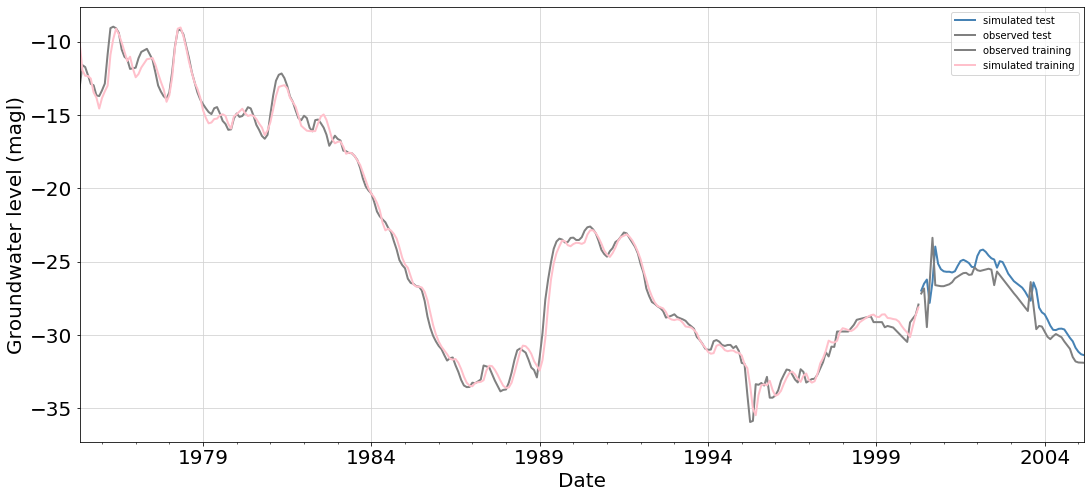

In [91]:
mse_gru = summary['mse_gru'].mean(axis=0)
rmse_gru= summary['rmse_gru'].mean(axis=0)
mae_gru = summary['mae_gru'].mean(axis=0)
r2_gru  = summary['r2_gru'].mean(axis=0)
stdv_gru= stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_gru, 3))
print("Mean squared error is:",round(mse_gru,3))
print("Root mean squared error is:",round(rmse_gru, 3))
print("Mean absolute error is:",round(mae_gru,3))


df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[300:359].index)
df1['observed test']      = pima.iloc[300:359, 0].values

df2 = pd.DataFrame(pima.iloc[0:300, 0].values, columns = ['observed training'],index =pima.iloc[0:300].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [92]:
y_gru = out_df['simulated test']

### FFNN

In [93]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_ff', 'rmse_ff', 'r2_ff','mae_ff'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)
    model = Sequential()
    # Add fully connected layer with a ReLU activation function
    model.add(Dense(units=32, activation='relu', input_shape=(1,6)))

    # Add fully connected layer with a ReLU activation function
    model.add(Dense(units=32, activation='relu'))

    # Add fully connected layer with no activation function
    model.add(Dense(units=1))
    #model.add(Flatten())

    # Compile neural network
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    
    X_val_reshaped = X_val_reshaped.reshape(59, 6)

    #running function
    gwl = -0.36470768
    test_forecast = X_test
    steps_ahead = 59
    y_pred = forecast(model, test_forecast, gwl, steps_ahead)
    y_pred = np.array(y_pred)
    
    #metrics for test
    y_ff = y_pred
    test_pred.append(y_ff)
    mse_ff = mean_squared_error(y_test, y_ff)
    rmse_ff = np.sqrt(mse_ff)
    r2_ff = r2_score(y_test, y_ff)
    mae_ff = mean_absolute_error(y_test, y_ff)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_ff,Round), round(rmse_ff,Round), round(r2_ff,Round),round(mae_ff,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')  

Running fold 1
(300, 6)
Train on 300 samples, validate on 59 samples
Epoch 1/1000
 96/300 [========>.....................] - ETA: 5s - loss: 1.1935 - mean_squared_error: 1.1935
Epoch 00001: val_loss improved from inf to 0.18235, saving model to model.h5
300/300 [==============================] - 8s 26ms/sample - loss: 1.2416 - mean_squared_error: 1.2416 - val_loss: 0.1824 - val_mean_squared_error: 0.1824
Epoch 2/1000
 96/300 [========>.....................] - ETA: 0s - loss: 1.1244 - mean_squared_error: 1.1244
Epoch 00002: val_loss improved from 0.18235 to 0.12680, saving model to model.h5
300/300 [==============================] - 0s 290us/sample - loss: 0.9330 - mean_squared_error: 0.9330 - val_loss: 0.1268 - val_mean_squared_error: 0.1268
Epoch 3/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.8732 - mean_squared_error: 0.8732
Epoch 00003: val_loss improved from 0.12680 to 0.08722, saving model to model.h5
300/300 [==============================] - 0s 218us/sample 

Epoch 26/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 00026: val_loss did not improve from 0.01527
300/300 [==============================] - 0s 156us/sample - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.0195 - val_mean_squared_error: 0.0195
Epoch 27/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0153 - mean_squared_error: 0.0153
Epoch 00027: val_loss did not improve from 0.01527
300/300 [==============================] - 0s 142us/sample - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0171 - val_mean_squared_error: 0.0171
Epoch 28/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 00028: val_loss did not improve from 0.01527
300/300 [==============================] - 0s 122us/sample - loss: 0.0144 - mean_squared_error: 0.0144 - val_loss: 0.0210 - val_mean_squared_error: 0.0210
Epoch 29/1000
 96/300 [========>.....................] 

 96/300 [========>.....................] - ETA: 0s - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 00052: val_loss did not improve from 0.01527
300/300 [==============================] - 0s 103us/sample - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0201 - val_mean_squared_error: 0.0201
Epoch 53/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0119 - mean_squared_error: 0.0119
Epoch 00053: val_loss did not improve from 0.01527
300/300 [==============================] - 0s 113us/sample - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0231 - val_mean_squared_error: 0.0231
Epoch 54/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 00054: val_loss did not improve from 0.01527
300/300 [==============================] - 0s 101us/sample - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0204 - val_mean_squared_error: 0.0204
Epoch 55/1000
 96/300 [========>.....................] - ETA: 0s - lo

 96/300 [========>.....................] - ETA: 0s - loss: 0.0185 - mean_squared_error: 0.0185
Epoch 00078: val_loss did not improve from 0.01527
300/300 [==============================] - 0s 114us/sample - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.0232 - val_mean_squared_error: 0.0232
Epoch 79/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0132 - mean_squared_error: 0.0132
Epoch 00079: val_loss did not improve from 0.01527
300/300 [==============================] - 0s 119us/sample - loss: 0.0123 - mean_squared_error: 0.0123 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 80/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 00080: val_loss did not improve from 0.01527
300/300 [==============================] - 0s 111us/sample - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0283 - val_mean_squared_error: 0.0283
Epoch 81/1000
 96/300 [========>.....................] - ETA: 0s - lo

 96/300 [========>.....................] - ETA: 0s - loss: 0.0143 - mean_squared_error: 0.0143
Epoch 00104: val_loss did not improve from 0.01527
300/300 [==============================] - 0s 104us/sample - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0216 - val_mean_squared_error: 0.0216
Epoch 105/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 00105: val_loss did not improve from 0.01527
300/300 [==============================] - 0s 116us/sample - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 106/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 00106: val_loss did not improve from 0.01527
300/300 [==============================] - 0s 112us/sample - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0304 - val_mean_squared_error: 0.0304
Epoch 107/1000
 96/300 [========>.....................] - ETA: 0s -

Epoch 20/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0194 - mean_squared_error: 0.0194
Epoch 00020: val_loss did not improve from 0.01597
300/300 [==============================] - 0s 131us/sample - loss: 0.0156 - mean_squared_error: 0.0156 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 21/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 00021: val_loss did not improve from 0.01597
300/300 [==============================] - 0s 170us/sample - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.0217 - val_mean_squared_error: 0.0217
Epoch 22/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0218 - mean_squared_error: 0.0218
Epoch 00022: val_loss did not improve from 0.01597
300/300 [==============================] - 0s 183us/sample - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 23/1000
 96/300 [========>.....................] 

 96/300 [========>.....................] - ETA: 0s - loss: 0.0195 - mean_squared_error: 0.0195
Epoch 00046: val_loss did not improve from 0.01597
300/300 [==============================] - 0s 119us/sample - loss: 0.0147 - mean_squared_error: 0.0147 - val_loss: 0.0460 - val_mean_squared_error: 0.0460
Epoch 47/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0197 - mean_squared_error: 0.0197
Epoch 00047: val_loss did not improve from 0.01597
300/300 [==============================] - 0s 121us/sample - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.0244 - val_mean_squared_error: 0.0244
Epoch 48/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0188 - mean_squared_error: 0.0188
Epoch 00048: val_loss did not improve from 0.01597
300/300 [==============================] - 0s 116us/sample - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.0456 - val_mean_squared_error: 0.0456
Epoch 49/1000
 96/300 [========>.....................] - ETA: 0s - lo

 96/300 [========>.....................] - ETA: 0s - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 00072: val_loss did not improve from 0.01597
300/300 [==============================] - 0s 123us/sample - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0327 - val_mean_squared_error: 0.0327
Epoch 73/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 00073: val_loss did not improve from 0.01597
300/300 [==============================] - 0s 125us/sample - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 74/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0145 - mean_squared_error: 0.0145
Epoch 00074: val_loss did not improve from 0.01597
300/300 [==============================] - 0s 117us/sample - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0341 - val_mean_squared_error: 0.0341
Epoch 75/1000
 96/300 [========>.....................] - ETA: 0s - lo

 96/300 [========>.....................] - ETA: 0s - loss: 0.0178 - mean_squared_error: 0.0178
Epoch 00098: val_loss did not improve from 0.01597
300/300 [==============================] - 0s 128us/sample - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 0.0309 - val_mean_squared_error: 0.0309
Epoch 99/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0141 - mean_squared_error: 0.0141
Epoch 00099: val_loss did not improve from 0.01597
300/300 [==============================] - 0s 113us/sample - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0232 - val_mean_squared_error: 0.0232
Epoch 100/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0184 - mean_squared_error: 0.0184
Epoch 00100: val_loss did not improve from 0.01597
300/300 [==============================] - 0s 120us/sample - loss: 0.0147 - mean_squared_error: 0.0147 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 101/1000
288/300 [===========================>..] - ETA: 0s - 

Epoch 18/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 00018: val_loss did not improve from 0.01919
300/300 [==============================] - 0s 140us/sample - loss: 0.0138 - mean_squared_error: 0.0138 - val_loss: 0.0298 - val_mean_squared_error: 0.0298
Epoch 19/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0181 - mean_squared_error: 0.0181
Epoch 00019: val_loss improved from 0.01919 to 0.01813, saving model to model.h5
300/300 [==============================] - 0s 301us/sample - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.0181 - val_mean_squared_error: 0.0181
Epoch 20/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 00020: val_loss did not improve from 0.01813
300/300 [==============================] - 0s 143us/sample - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.0203 - val_mean_squared_error: 0.0203
Epoch 21/1000
 96/300 [==

Epoch 44/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0201 - mean_squared_error: 0.0201
Epoch 00044: val_loss did not improve from 0.01679
300/300 [==============================] - 0s 130us/sample - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 0.0346 - val_mean_squared_error: 0.0346
Epoch 45/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0161 - mean_squared_error: 0.0161
Epoch 00045: val_loss did not improve from 0.01679
300/300 [==============================] - 0s 121us/sample - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0222 - val_mean_squared_error: 0.0222
Epoch 46/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0309 - mean_squared_error: 0.0309
Epoch 00046: val_loss did not improve from 0.01679
300/300 [==============================] - 0s 156us/sample - loss: 0.0191 - mean_squared_error: 0.0191 - val_loss: 0.0294 - val_mean_squared_error: 0.0294
Epoch 47/1000
 96/300 [========>.....................] 

 96/300 [========>.....................] - ETA: 0s - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 00070: val_loss did not improve from 0.01679
300/300 [==============================] - 0s 129us/sample - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 71/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0207 - mean_squared_error: 0.0207
Epoch 00071: val_loss did not improve from 0.01679
300/300 [==============================] - 0s 157us/sample - loss: 0.0176 - mean_squared_error: 0.0176 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 72/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0144 - mean_squared_error: 0.0144
Epoch 00072: val_loss did not improve from 0.01679
300/300 [==============================] - 0s 125us/sample - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.0353 - val_mean_squared_error: 0.0353
Epoch 73/1000
 96/300 [========>.....................] - ETA: 0s - lo

 96/300 [========>.....................] - ETA: 0s - loss: 0.0143 - mean_squared_error: 0.0143
Epoch 00096: val_loss did not improve from 0.01679
300/300 [==============================] - 0s 128us/sample - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0392 - val_mean_squared_error: 0.0392
Epoch 97/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0145 - mean_squared_error: 0.0145
Epoch 00097: val_loss did not improve from 0.01679
300/300 [==============================] - 0s 122us/sample - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 98/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 00098: val_loss did not improve from 0.01679
300/300 [==============================] - 0s 123us/sample - loss: 0.0149 - mean_squared_error: 0.0149 - val_loss: 0.0212 - val_mean_squared_error: 0.0212
Epoch 99/1000
 96/300 [========>.....................] - ETA: 0s - lo

Running fold 4
(300, 6)
Train on 300 samples, validate on 59 samples
Epoch 1/1000
 96/300 [========>.....................] - ETA: 8s - loss: 1.3330 - mean_squared_error: 1.3330
Epoch 00001: val_loss improved from inf to 0.24510, saving model to model.h5
300/300 [==============================] - 10s 35ms/sample - loss: 1.1380 - mean_squared_error: 1.1380 - val_loss: 0.2451 - val_mean_squared_error: 0.2451
Epoch 2/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.8698 - mean_squared_error: 0.8698
Epoch 00002: val_loss improved from 0.24510 to 0.18421, saving model to model.h5
300/300 [==============================] - 0s 322us/sample - loss: 0.7193 - mean_squared_error: 0.7193 - val_loss: 0.1842 - val_mean_squared_error: 0.1842
Epoch 3/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.3391 - mean_squared_error: 0.3391
Epoch 00003: val_loss improved from 0.18421 to 0.07019, saving model to model.h5
300/300 [==============================] - 0s 323us/sample

 96/300 [========>.....................] - ETA: 0s - loss: 0.0168 - mean_squared_error: 0.0168
Epoch 00026: val_loss did not improve from 0.02014
300/300 [==============================] - 0s 140us/sample - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch 27/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0264 - mean_squared_error: 0.0264
Epoch 00027: val_loss did not improve from 0.02014
300/300 [==============================] - 0s 165us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - val_loss: 0.0309 - val_mean_squared_error: 0.0309
Epoch 28/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0347 - mean_squared_error: 0.0347
Epoch 00028: val_loss did not improve from 0.02014
300/300 [==============================] - 0s 154us/sample - loss: 0.0202 - mean_squared_error: 0.0202 - val_loss: 0.0344 - val_mean_squared_error: 0.0344
Epoch 29/1000
 96/300 [========>.....................] - ETA: 0s - lo

 96/300 [========>.....................] - ETA: 0s - loss: 0.0153 - mean_squared_error: 0.0153
Epoch 00052: val_loss did not improve from 0.02014
300/300 [==============================] - 0s 139us/sample - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0427 - val_mean_squared_error: 0.0427
Epoch 53/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0220 - mean_squared_error: 0.0220
Epoch 00053: val_loss did not improve from 0.02014
300/300 [==============================] - 0s 142us/sample - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.0221 - val_mean_squared_error: 0.0221
Epoch 54/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 00054: val_loss did not improve from 0.02014
300/300 [==============================] - 0s 138us/sample - loss: 0.0148 - mean_squared_error: 0.0148 - val_loss: 0.0338 - val_mean_squared_error: 0.0338
Epoch 55/1000
 96/300 [========>.....................] - ETA: 0s - lo

 96/300 [========>.....................] - ETA: 0s - loss: 0.0204 - mean_squared_error: 0.0204
Epoch 00078: val_loss did not improve from 0.02014
300/300 [==============================] - 0s 139us/sample - loss: 0.0167 - mean_squared_error: 0.0167 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 79/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 00079: val_loss did not improve from 0.02014
300/300 [==============================] - 0s 132us/sample - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 80/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0154 - mean_squared_error: 0.0154
Epoch 00080: val_loss did not improve from 0.02014
300/300 [==============================] - 0s 133us/sample - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0312 - val_mean_squared_error: 0.0312
Epoch 81/1000
 96/300 [========>.....................] - ETA: 0s - lo

 96/300 [========>.....................] - ETA: 0s - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 00104: val_loss did not improve from 0.02014
300/300 [==============================] - 0s 178us/sample - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0356 - val_mean_squared_error: 0.0356
Epoch 105/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0090 - mean_squared_error: 0.0090
Epoch 00105: val_loss did not improve from 0.02014
300/300 [==============================] - 0s 166us/sample - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0283 - val_mean_squared_error: 0.0283
Epoch 106/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 00106: val_loss did not improve from 0.02014
300/300 [==============================] - 0s 183us/sample - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0295 - val_mean_squared_error: 0.0295
Epoch 107/1000
 96/300 [========>.....................] - ETA: 0s -

Epoch 18/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0305 - mean_squared_error: 0.0305
Epoch 00018: val_loss did not improve from 0.01844
300/300 [==============================] - 0s 191us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 19/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0262 - mean_squared_error: 0.0262
Epoch 00019: val_loss did not improve from 0.01844
300/300 [==============================] - 0s 195us/sample - loss: 0.0155 - mean_squared_error: 0.0155 - val_loss: 0.0349 - val_mean_squared_error: 0.0349
Epoch 20/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 00020: val_loss did not improve from 0.01844
300/300 [==============================] - 0s 163us/sample - loss: 0.0211 - mean_squared_error: 0.0211 - val_loss: 0.0231 - val_mean_squared_error: 0.0231
Epoch 21/1000
 96/300 [========>.....................] 

288/300 [===========================>..] - ETA: 0s - loss: 0.0177 - mean_squared_error: 0.0177
Epoch 00044: val_loss did not improve from 0.01844
300/300 [==============================] - 0s 330us/sample - loss: 0.0180 - mean_squared_error: 0.0180 - val_loss: 0.0353 - val_mean_squared_error: 0.0353
Epoch 45/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0251 - mean_squared_error: 0.0251
Epoch 00045: val_loss did not improve from 0.01844
300/300 [==============================] - 0s 210us/sample - loss: 0.0153 - mean_squared_error: 0.0153 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 46/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 00046: val_loss did not improve from 0.01844
300/300 [==============================] - 0s 250us/sample - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch 47/1000
 96/300 [========>.....................] - ETA: 0s - lo

 96/300 [========>.....................] - ETA: 0s - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 00070: val_loss did not improve from 0.01844
300/300 [==============================] - 0s 173us/sample - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 71/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0245 - mean_squared_error: 0.0245
Epoch 00071: val_loss did not improve from 0.01844
300/300 [==============================] - 0s 196us/sample - loss: 0.0185 - mean_squared_error: 0.0185 - val_loss: 0.0296 - val_mean_squared_error: 0.0296
Epoch 72/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 00072: val_loss did not improve from 0.01844
300/300 [==============================] - 0s 156us/sample - loss: 0.0172 - mean_squared_error: 0.0172 - val_loss: 0.0599 - val_mean_squared_error: 0.0599
Epoch 73/1000
 96/300 [========>.....................] - ETA: 0s - lo

 96/300 [========>.....................] - ETA: 0s - loss: 0.0208 - mean_squared_error: 0.0208
Epoch 00096: val_loss did not improve from 0.01844
300/300 [==============================] - 0s 183us/sample - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 97/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0152 - mean_squared_error: 0.0152
Epoch 00097: val_loss did not improve from 0.01844
300/300 [==============================] - 0s 276us/sample - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0367 - val_mean_squared_error: 0.0367
Epoch 98/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0173 - mean_squared_error: 0.0173
Epoch 00098: val_loss did not improve from 0.01844
300/300 [==============================] - 0s 174us/sample - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.0317 - val_mean_squared_error: 0.0317
Epoch 99/1000
 96/300 [========>.....................] - ETA: 0s - lo

288/300 [===========================>..] - ETA: 0s - loss: 0.0182 - mean_squared_error: 0.0182
Epoch 00018: val_loss did not improve from 0.02252
300/300 [==============================] - 0s 442us/sample - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.0296 - val_mean_squared_error: 0.0296
Epoch 19/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0249 - mean_squared_error: 0.0249
Epoch 00019: val_loss did not improve from 0.02252
300/300 [==============================] - 0s 258us/sample - loss: 0.0207 - mean_squared_error: 0.0207 - val_loss: 0.0371 - val_mean_squared_error: 0.0371
Epoch 20/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0330 - mean_squared_error: 0.0330
Epoch 00020: val_loss did not improve from 0.02252
300/300 [==============================] - 0s 202us/sample - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.0387 - val_mean_squared_error: 0.0387
Epoch 21/1000
 96/300 [========>.....................] - ETA: 0s - lo

 96/300 [========>.....................] - ETA: 0s - loss: 0.0201 - mean_squared_error: 0.0201
Epoch 00044: val_loss did not improve from 0.02252
300/300 [==============================] - 0s 223us/sample - loss: 0.0201 - mean_squared_error: 0.0201 - val_loss: 0.0302 - val_mean_squared_error: 0.0302
Epoch 45/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0183 - mean_squared_error: 0.0183
Epoch 00045: val_loss did not improve from 0.02252
300/300 [==============================] - 0s 213us/sample - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.0343 - val_mean_squared_error: 0.0343
Epoch 46/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0083 - mean_squared_error: 0.0083
Epoch 00046: val_loss did not improve from 0.02252
300/300 [==============================] - 0s 220us/sample - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.0472 - val_mean_squared_error: 0.0472
Epoch 47/1000
 96/300 [========>.....................] - ETA: 0s - lo

 96/300 [========>.....................] - ETA: 0s - loss: 0.0171 - mean_squared_error: 0.0171
Epoch 00070: val_loss did not improve from 0.02252
300/300 [==============================] - 0s 230us/sample - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0396 - val_mean_squared_error: 0.0396
Epoch 71/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0162 - mean_squared_error: 0.0162
Epoch 00071: val_loss did not improve from 0.02252
300/300 [==============================] - 0s 215us/sample - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.0394 - val_mean_squared_error: 0.0394
Epoch 72/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0458 - mean_squared_error: 0.0458
Epoch 00072: val_loss did not improve from 0.02252
300/300 [==============================] - 0s 201us/sample - loss: 0.0260 - mean_squared_error: 0.0260 - val_loss: 0.0293 - val_mean_squared_error: 0.0293
Epoch 73/1000
 96/300 [========>.....................] - ETA: 0s - lo

 96/300 [========>.....................] - ETA: 0s - loss: 0.0181 - mean_squared_error: 0.0181
Epoch 00096: val_loss did not improve from 0.02252
300/300 [==============================] - 0s 176us/sample - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0314 - val_mean_squared_error: 0.0314
Epoch 97/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0130 - mean_squared_error: 0.0130
Epoch 00097: val_loss did not improve from 0.02252
300/300 [==============================] - 0s 231us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0329 - val_mean_squared_error: 0.0329
Epoch 98/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 00098: val_loss did not improve from 0.02252
300/300 [==============================] - 0s 181us/sample - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0367 - val_mean_squared_error: 0.0367
Epoch 99/1000
 96/300 [========>.....................] - ETA: 0s - lo

Epoch 13/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0306 - mean_squared_error: 0.0306
Epoch 00013: val_loss did not improve from 0.02421
300/300 [==============================] - 0s 216us/sample - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 14/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0333 - mean_squared_error: 0.0333
Epoch 00014: val_loss did not improve from 0.02421
300/300 [==============================] - 0s 253us/sample - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 15/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0188 - mean_squared_error: 0.0188
Epoch 00015: val_loss did not improve from 0.02421
300/300 [==============================] - 0s 392us/sample - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 0.0311 - val_mean_squared_error: 0.0311
Epoch 16/1000
288/300 [===========================>..] 

 96/300 [========>.....................] - ETA: 0s - loss: 0.0157 - mean_squared_error: 0.0157
Epoch 00039: val_loss did not improve from 0.02421
300/300 [==============================] - 0s 229us/sample - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0309 - val_mean_squared_error: 0.0309
Epoch 40/1000
288/300 [===========================>..] - ETA: 0s - loss: 0.0170 - mean_squared_error: 0.0170
Epoch 00040: val_loss did not improve from 0.02421
300/300 [==============================] - 0s 356us/sample - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 41/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0195 - mean_squared_error: 0.0195
Epoch 00041: val_loss did not improve from 0.02421
300/300 [==============================] - 0s 227us/sample - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0290 - val_mean_squared_error: 0.0290
Epoch 42/1000
 96/300 [========>.....................] - ETA: 0s - lo

 96/300 [========>.....................] - ETA: 0s - loss: 0.0190 - mean_squared_error: 0.0190
Epoch 00065: val_loss did not improve from 0.02421
300/300 [==============================] - 0s 219us/sample - loss: 0.0264 - mean_squared_error: 0.0264 - val_loss: 0.0601 - val_mean_squared_error: 0.0601
Epoch 66/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0253 - mean_squared_error: 0.0253
Epoch 00066: val_loss did not improve from 0.02421
300/300 [==============================] - 0s 279us/sample - loss: 0.0153 - mean_squared_error: 0.0153 - val_loss: 0.0282 - val_mean_squared_error: 0.0282
Epoch 67/1000
288/300 [===========================>..] - ETA: 0s - loss: 0.0155 - mean_squared_error: 0.0155
Epoch 00067: val_loss did not improve from 0.02421
300/300 [==============================] - 0s 324us/sample - loss: 0.0151 - mean_squared_error: 0.0151 - val_loss: 0.0394 - val_mean_squared_error: 0.0394
Epoch 68/1000
 96/300 [========>.....................] - ETA: 0s - lo

Epoch 91/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0338 - mean_squared_error: 0.0338
Epoch 00091: val_loss did not improve from 0.02421
300/300 [==============================] - 0s 352us/sample - loss: 0.0205 - mean_squared_error: 0.0205 - val_loss: 0.0336 - val_mean_squared_error: 0.0336
Epoch 92/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0162 - mean_squared_error: 0.0162
Epoch 00092: val_loss did not improve from 0.02421
300/300 [==============================] - 0s 260us/sample - loss: 0.0165 - mean_squared_error: 0.0165 - val_loss: 0.0349 - val_mean_squared_error: 0.0349
Epoch 93/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 00093: val_loss did not improve from 0.02421
300/300 [==============================] - 0s 302us/sample - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0306 - val_mean_squared_error: 0.0306
Epoch 94/1000
 96/300 [========>.....................] 

Epoch 15/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0412 - mean_squared_error: 0.0412
Epoch 00015: val_loss did not improve from 0.02233
300/300 [==============================] - 0s 182us/sample - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.0288 - val_mean_squared_error: 0.0288
Epoch 16/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0215 - mean_squared_error: 0.0215
Epoch 00016: val_loss did not improve from 0.02233
300/300 [==============================] - 0s 280us/sample - loss: 0.0199 - mean_squared_error: 0.0199 - val_loss: 0.0295 - val_mean_squared_error: 0.0295
Epoch 17/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0120 - mean_squared_error: 0.0120
Epoch 00017: val_loss did not improve from 0.02233
300/300 [==============================] - 0s 197us/sample - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0266 - val_mean_squared_error: 0.0266
Epoch 18/1000
 96/300 [========>.....................] 

288/300 [===========================>..] - ETA: 0s - loss: 0.0286 - mean_squared_error: 0.0286
Epoch 00041: val_loss did not improve from 0.02233
300/300 [==============================] - 0s 305us/sample - loss: 0.0282 - mean_squared_error: 0.0282 - val_loss: 0.0303 - val_mean_squared_error: 0.0303
Epoch 42/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0246 - mean_squared_error: 0.0246
Epoch 00042: val_loss did not improve from 0.02233
300/300 [==============================] - 0s 242us/sample - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 43/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0153 - mean_squared_error: 0.0153
Epoch 00043: val_loss did not improve from 0.02233
300/300 [==============================] - 0s 211us/sample - loss: 0.0140 - mean_squared_error: 0.0140 - val_loss: 0.0285 - val_mean_squared_error: 0.0285
Epoch 44/1000
192/300 [==================>...........] - ETA: 0s - lo

 96/300 [========>.....................] - ETA: 0s - loss: 0.0665 - mean_squared_error: 0.0665
Epoch 00067: val_loss did not improve from 0.02233
300/300 [==============================] - 0s 228us/sample - loss: 0.0347 - mean_squared_error: 0.0347 - val_loss: 0.0357 - val_mean_squared_error: 0.0357
Epoch 68/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0354 - mean_squared_error: 0.0354
Epoch 00068: val_loss did not improve from 0.02233
300/300 [==============================] - 0s 249us/sample - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.0314 - val_mean_squared_error: 0.0314
Epoch 69/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 00069: val_loss did not improve from 0.02233
300/300 [==============================] - 0s 253us/sample - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0343 - val_mean_squared_error: 0.0343
Epoch 70/1000
288/300 [===========================>..] - ETA: 0s - lo

 96/300 [========>.....................] - ETA: 0s - loss: 0.0119 - mean_squared_error: 0.0119
Epoch 00093: val_loss did not improve from 0.02233
300/300 [==============================] - 0s 230us/sample - loss: 0.0161 - mean_squared_error: 0.0161 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 94/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0181 - mean_squared_error: 0.0181
Epoch 00094: val_loss did not improve from 0.02233
300/300 [==============================] - 0s 239us/sample - loss: 0.0193 - mean_squared_error: 0.0193 - val_loss: 0.0312 - val_mean_squared_error: 0.0312
Epoch 95/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0088 - mean_squared_error: 0.0088
Epoch 00095: val_loss did not improve from 0.02233
300/300 [==============================] - 0s 262us/sample - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0390 - val_mean_squared_error: 0.0390
Epoch 96/1000
 96/300 [========>.....................] - ETA: 0s - lo

Epoch 16/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 00016: val_loss did not improve from 0.01878
300/300 [==============================] - 0s 245us/sample - loss: 0.0148 - mean_squared_error: 0.0148 - val_loss: 0.0295 - val_mean_squared_error: 0.0295
Epoch 17/1000
288/300 [===========================>..] - ETA: 0s - loss: 0.0209 - mean_squared_error: 0.0209
Epoch 00017: val_loss did not improve from 0.01878
300/300 [==============================] - 0s 718us/sample - loss: 0.0219 - mean_squared_error: 0.0219 - val_loss: 0.0292 - val_mean_squared_error: 0.0292
Epoch 18/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0211 - mean_squared_error: 0.0211
Epoch 00018: val_loss did not improve from 0.01878
300/300 [==============================] - 0s 448us/sample - loss: 0.0212 - mean_squared_error: 0.0212 - val_loss: 0.0345 - val_mean_squared_error: 0.0345
Epoch 19/1000
 96/300 [========>.....................] 

 96/300 [========>.....................] - ETA: 0s - loss: 0.0255 - mean_squared_error: 0.0255
Epoch 00042: val_loss did not improve from 0.01878
300/300 [==============================] - 0s 283us/sample - loss: 0.0204 - mean_squared_error: 0.0204 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 43/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0330 - mean_squared_error: 0.0330
Epoch 00043: val_loss did not improve from 0.01878
300/300 [==============================] - 0s 226us/sample - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 44/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0132 - mean_squared_error: 0.0132
Epoch 00044: val_loss did not improve from 0.01878
300/300 [==============================] - 0s 235us/sample - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 0.0277 - val_mean_squared_error: 0.0277
Epoch 45/1000
 96/300 [========>.....................] - ETA: 0s - lo

288/300 [===========================>..] - ETA: 0s - loss: 0.0132 - mean_squared_error: 0.0132
Epoch 00068: val_loss did not improve from 0.01878
300/300 [==============================] - 0s 421us/sample - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.0251 - val_mean_squared_error: 0.0251
Epoch 69/1000
288/300 [===========================>..] - ETA: 0s - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 00069: val_loss did not improve from 0.01878
300/300 [==============================] - 0s 413us/sample - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0304 - val_mean_squared_error: 0.0304
Epoch 70/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0802 - mean_squared_error: 0.0802
Epoch 00070: val_loss did not improve from 0.01878
300/300 [==============================] - 0s 291us/sample - loss: 0.0397 - mean_squared_error: 0.0397 - val_loss: 0.0280 - val_mean_squared_error: 0.0280
Epoch 71/1000
 96/300 [========>.....................] - ETA: 0s - lo

 96/300 [========>.....................] - ETA: 0s - loss: 0.0661 - mean_squared_error: 0.0661
Epoch 00094: val_loss did not improve from 0.01878
300/300 [==============================] - 0s 221us/sample - loss: 0.0353 - mean_squared_error: 0.0353 - val_loss: 0.0256 - val_mean_squared_error: 0.0256
Epoch 95/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0102 - mean_squared_error: 0.0102
Epoch 00095: val_loss did not improve from 0.01878
300/300 [==============================] - 0s 233us/sample - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 96/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 00096: val_loss did not improve from 0.01878
300/300 [==============================] - 0s 278us/sample - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.0293 - val_mean_squared_error: 0.0293
Epoch 97/1000
 96/300 [========>.....................] - ETA: 0s - lo

Epoch 18/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0253 - mean_squared_error: 0.0253
Epoch 00018: val_loss did not improve from 0.01986
300/300 [==============================] - 0s 188us/sample - loss: 0.0300 - mean_squared_error: 0.0300 - val_loss: 0.0394 - val_mean_squared_error: 0.0394
Epoch 19/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0276 - mean_squared_error: 0.0276
Epoch 00019: val_loss did not improve from 0.01986
300/300 [==============================] - 0s 186us/sample - loss: 0.0276 - mean_squared_error: 0.0276 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 20/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0211 - mean_squared_error: 0.0211
Epoch 00020: val_loss did not improve from 0.01986
300/300 [==============================] - 0s 206us/sample - loss: 0.0163 - mean_squared_error: 0.0163 - val_loss: 0.0325 - val_mean_squared_error: 0.0325
Epoch 21/1000
 96/300 [========>.....................] 

 96/300 [========>.....................] - ETA: 0s - loss: 0.0248 - mean_squared_error: 0.0248
Epoch 00044: val_loss did not improve from 0.01986
300/300 [==============================] - 0s 235us/sample - loss: 0.0219 - mean_squared_error: 0.0219 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epoch 45/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0212 - mean_squared_error: 0.0212
Epoch 00045: val_loss did not improve from 0.01986
300/300 [==============================] - 0s 233us/sample - loss: 0.0144 - mean_squared_error: 0.0144 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 46/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0207 - mean_squared_error: 0.0207
Epoch 00046: val_loss did not improve from 0.01986
300/300 [==============================] - 0s 225us/sample - loss: 0.0175 - mean_squared_error: 0.0175 - val_loss: 0.0300 - val_mean_squared_error: 0.0300
Epoch 47/1000
 96/300 [========>.....................] - ETA: 0s - lo

 96/300 [========>.....................] - ETA: 0s - loss: 0.0498 - mean_squared_error: 0.0498
Epoch 00070: val_loss did not improve from 0.01986
300/300 [==============================] - 0s 219us/sample - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0743 - val_mean_squared_error: 0.0743
Epoch 71/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 00071: val_loss did not improve from 0.01986
300/300 [==============================] - 0s 215us/sample - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0282 - val_mean_squared_error: 0.0282
Epoch 72/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 00072: val_loss did not improve from 0.01986
300/300 [==============================] - 0s 205us/sample - loss: 0.0190 - mean_squared_error: 0.0190 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch 73/1000
 96/300 [========>.....................] - ETA: 0s - lo

 96/300 [========>.....................] - ETA: 0s - loss: 0.0175 - mean_squared_error: 0.0175
Epoch 00096: val_loss did not improve from 0.01986
300/300 [==============================] - 0s 242us/sample - loss: 0.0216 - mean_squared_error: 0.0216 - val_loss: 0.0305 - val_mean_squared_error: 0.0305
Epoch 97/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0249 - mean_squared_error: 0.0249
Epoch 00097: val_loss did not improve from 0.01986
300/300 [==============================] - 0s 252us/sample - loss: 0.0273 - mean_squared_error: 0.0273 - val_loss: 0.0341 - val_mean_squared_error: 0.0341
Epoch 98/1000
 96/300 [========>.....................] - ETA: 0s - loss: 0.0175 - mean_squared_error: 0.0175
Epoch 00098: val_loss did not improve from 0.01986
300/300 [==============================] - 0s 302us/sample - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0498 - val_mean_squared_error: 0.0498
Epoch 99/1000
 96/300 [========>.....................] - ETA: 0s - lo

In [94]:
summary

Iteration_No  mse_ff  rmse_ff  r2_ff  mae_ff
0   Iteration_1   0.027    0.165  0.666   0.124
1   Iteration_2   0.025    0.157  0.699   0.119
2   Iteration_3   0.037    0.191  0.549   0.152
3   Iteration_4   0.027    0.165  0.667   0.129
4   Iteration_5   0.034    0.185  0.578   0.160
5   Iteration_6   0.060    0.246  0.258   0.229
6   Iteration_7   0.036    0.190  0.557   0.145
7   Iteration_8   0.031    0.176  0.621   0.130
8   Iteration_9   0.030    0.174  0.626   0.127
9  Iteration_10   0.034    0.185  0.577   0.140

In [95]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]

train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:300, 6].values

In [96]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]

test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[300:359, 6].values

In [97]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:300]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))


#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[300:359]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.007
Root mean squared error is: 0.082
Mean absolute error is: 0.06
R^2 score is:  0.994

The model performance for the test set
--------------------------------------
R^2 score is:  0.58
Mean squared error is: 0.034
Root mean squared error is: 0.183
Mean absolute error is: 0.146


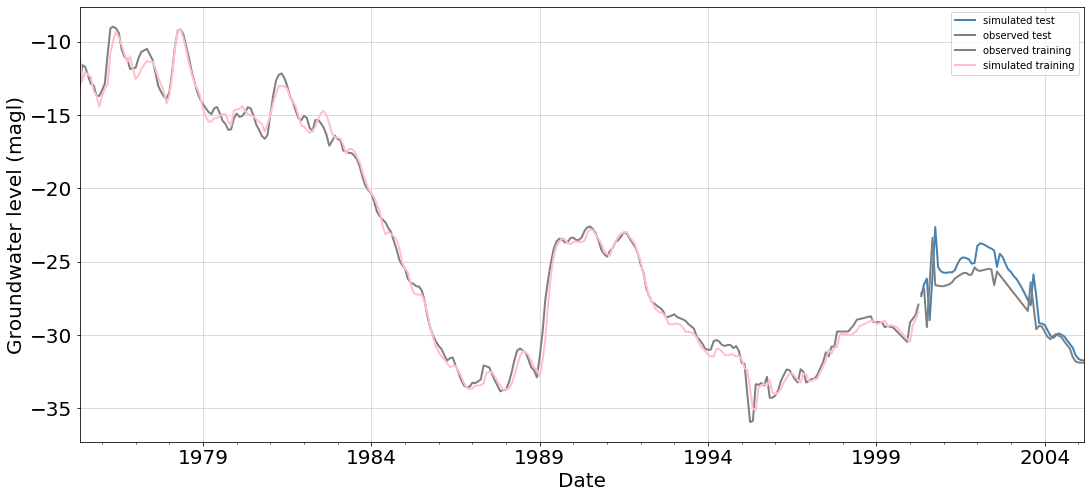

In [98]:
mse_ff  = summary['mse_ff'].mean(axis=0)
rmse_ff = summary['rmse_ff'].mean(axis=0)
mae_ff  = summary['mae_ff'].mean(axis=0)
r2_ff   = summary['r2_ff'].mean(axis=0)
stdv_ff = stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_ff, 3))
print("Mean squared error is:",round(mse_ff,3))
print("Root mean squared error is:",round(rmse_ff, 3))
print("Mean absolute error is:",round(mae_ff,3))


df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[300:359].index)
df1['observed test']      = pima.iloc[300:359, 0].values

df2 = pd.DataFrame(pima.iloc[0:300, 0].values, columns = ['observed training'],index =pima.iloc[0:300].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [99]:
y_ff = out_df['simulated test']

## Static Models

In [101]:
pima2  = pima[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2','D4N0115']]

In [102]:
X = pima2[['Discharge_log' ,'precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']].values
y = pima2['D4N0115'].values
y = y.reshape(-1,1)

In [103]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tss.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(300, 6) (300, 1)
(59, 6) (59, 1)


In [104]:
def forecast(model, test_forecast, gwl, steps_ahead):
    y_pred = []
    current_output = gwl
    for step in range(steps_ahead):
        #print(test_forecast[step])
        input_test = np.concatenate([test_forecast[step][:-1], [current_output]])
        #input_test = [test_forecast[0][0][:-1], gwl]
        #print(input_test)
        pred = model.fit(input_test.reshape(1,1,6))
        y_pred.append(pred[0][0])
        #print(pred)
        current_output = pred[0][0]
    return y_pred

### Decision Tree

In [105]:
from sklearn.metrics import *
import numpy as np
import csv  

from sklearn.tree import DecisionTreeRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_dc', 'rmse_dc', 'r2_dc','mae_dc'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    regressor = DecisionTreeRegressor(max_features='auto') #random state is so i get same results whenever i run the regressor
    regressor.fit(X_train,y_train)
    y_dc = regressor.predict(X_test)

    #metrics for test
    y_dc = y_dc
    test_pred.append(y_dc)
    mse_dc = mean_squared_error(y_test, y_dc)
    rmse_dc = np.sqrt(mse_dc)
    r2_dc = r2_score(y_test, y_dc)
    mae_dc = mean_absolute_error(y_test, y_dc)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_dc,Round), round(rmse_dc,Round), round(r2_dc,Round),round(mae_dc,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(300, 6)
Running fold 2
(300, 6)
Running fold 3
(300, 6)
Running fold 4
(300, 6)
Running fold 5
(300, 6)
Running fold 6
(300, 6)
Running fold 7
(300, 6)
Running fold 8
(300, 6)
Running fold 9
(300, 6)
Running fold 10
(300, 6)


In [106]:
summary

Iteration_No  mse_dc  rmse_dc  r2_dc  mae_dc
0   Iteration_1   1.156    1.075  0.742   0.754
1   Iteration_2   0.970    0.985  0.784   0.622
2   Iteration_3   0.952    0.976  0.788   0.692
3   Iteration_4   1.074    1.037  0.761   0.702
4   Iteration_5   1.065    1.032  0.763   0.713
5   Iteration_6   1.098    1.048  0.755   0.733
6   Iteration_7   1.198    1.094  0.733   0.814
7   Iteration_8   1.129    1.062  0.749   0.731
8   Iteration_9   1.135    1.066  0.747   0.734
9  Iteration_10   1.350    1.162  0.699   0.874

In [107]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:300, 6].values

In [108]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.0
Root mean squared error is: 0.0
Mean absolute error is: 0.0
R^2 score is:  1.0

The model performance for the test set
--------------------------------------
R^2 score is:  0.752
Mean squared error is: 1.113
Root mean squared error is: 1.054
Mean absolute error is: 0.737


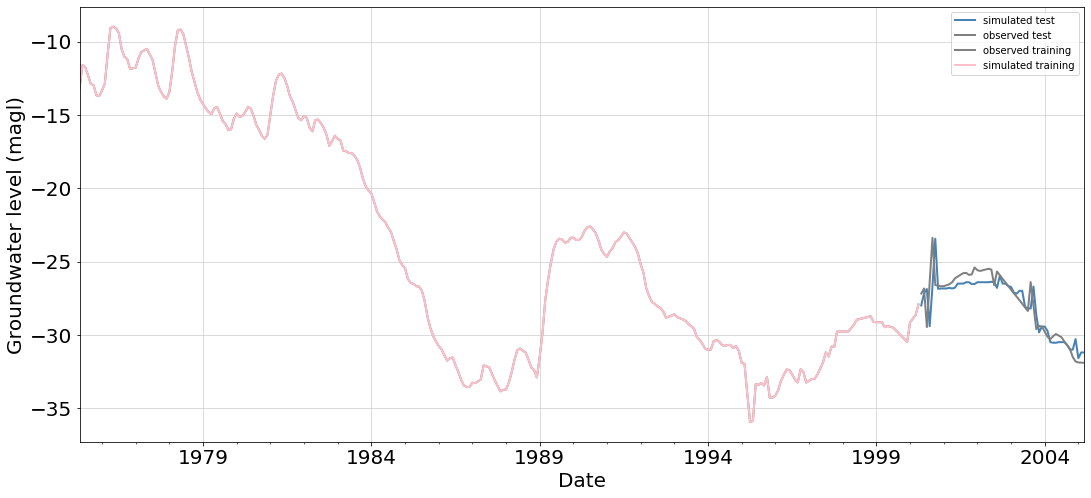

In [109]:
mse_dc = summary['mse_dc'].mean(axis=0)
rmse_dc = summary['rmse_dc'].mean(axis=0)
mae_dc = summary['mae_dc'].mean(axis=0)
r2_dc  = summary['r2_dc'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_dc, 3))
print("Mean squared error is:",round(mse_dc,3))
print("Root mean squared error is:",round(rmse_dc, 3))
print("Mean absolute error is:",round(mae_dc,3))




df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[300:359].index)
df1['observed test']      = pima.iloc[300:359, 0].values

df2 = pd.DataFrame(pima.iloc[0:300, 0].values, columns = ['observed training'],index =pima.iloc[0:300].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### SVR

In [110]:
from sklearn.svm import SVR

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_svr', 'rmse_svr', 'r2_svr','mae_svr'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)
    
    regressor = SVR(kernel='rbf', epsilon=0.1, C=1, degree=4 ,gamma='auto') 
    regressor.fit(X_train,y_train)
    y_svr = regressor.predict(X_test)

    #metrics for test
    y_svr = y_svr
    test_pred.append(y_svr)
    mse_svr = mean_squared_error(y_test, y_svr)
    rmse_svr = np.sqrt(mse_svr)
    r2_svr = r2_score(y_test, y_svr)
    mae_svr = mean_absolute_error(y_test, y_svr)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_svr,Round), round(rmse_svr,Round), round(r2_svr,Round),round(mae_svr,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(300, 6)
Running fold 2
(300, 6)
Running fold 3
(300, 6)
Running fold 4
(300, 6)
Running fold 5
(300, 6)
Running fold 6
(300, 6)
Running fold 7
(300, 6)
Running fold 8
(300, 6)
Running fold 9
(300, 6)
Running fold 10
(300, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

In [111]:
summary

Iteration_No  mse_svr  rmse_svr  r2_svr  mae_svr
0   Iteration_1    1.541     1.241   0.657     0.89
1   Iteration_2    1.541     1.241   0.657     0.89
2   Iteration_3    1.541     1.241   0.657     0.89
3   Iteration_4    1.541     1.241   0.657     0.89
4   Iteration_5    1.541     1.241   0.657     0.89
5   Iteration_6    1.541     1.241   0.657     0.89
6   Iteration_7    1.541     1.241   0.657     0.89
7   Iteration_8    1.541     1.241   0.657     0.89
8   Iteration_9    1.541     1.241   0.657     0.89
9  Iteration_10    1.541     1.241   0.657     0.89

In [112]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:300, 6].values

In [113]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 1.652
Root mean squared error is: 1.285
Mean absolute error is: 0.552
R^2 score is:  0.974

The model performance for the test set
--------------------------------------
R^2 score is:  0.657
Mean squared error is: 1.541
Root mean squared error is: 1.241
Mean absolute error is: 0.89


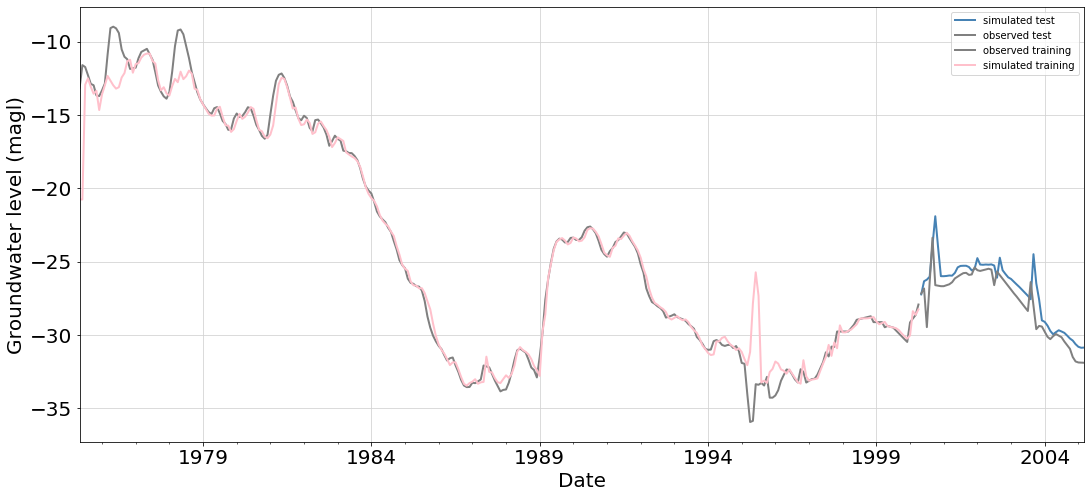

In [114]:
mse_svr  = summary['mse_svr'].mean(axis=0)
rmse_svr = summary['rmse_svr'].mean(axis=0)
mae_svr  = summary['mae_svr'].mean(axis=0)
r2_svr   = summary['r2_svr'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_svr, 3))
print("Mean squared error is:",round(mse_svr,3))
print("Root mean squared error is:",round(rmse_svr, 3))
print("Mean absolute error is:",round(mae_svr,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[300:359].index)
df1['observed test']      = pima.iloc[300:359, 0].values

df2 = pd.DataFrame(pima.iloc[0:300, 0].values, columns = ['observed training'],index =pima.iloc[0:300].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### GradientBoostingRegressor

In [115]:
from sklearn.ensemble import GradientBoostingRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_gb', 'rmse_gb', 'r2_gb','mae_gb'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    regressor = GradientBoostingRegressor()
    regressor.fit(X_train,y_train)
    y_gb = regressor.predict(X_test)

    #metrics for test
    y_gb = y_gb
    test_pred.append(y_gb)
    mse_gb = mean_squared_error(y_test, y_gb)
    rmse_gb = np.sqrt(mse_gb)
    r2_gb = r2_score(y_test, y_gb)
    mae_gb = mean_absolute_error(y_test, y_gb)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_gb,Round), round(rmse_gb,Round), round(r2_gb,Round),round(mae_gb,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(300, 6)
Running fold 2
(300, 6)
Running fold 3
(300, 6)
Running fold 4
(300, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

Running fold 5
(300, 6)
Running fold 6
(300, 6)
Running fold 7
(300, 6)
Running fold 8
(300, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

Running fold 9
(300, 6)
Running fold 10
(300, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [116]:
summary

Iteration_No  mse_gb  rmse_gb  r2_gb  mae_gb
0   Iteration_1   0.923    0.961  0.794   0.616
1   Iteration_2   0.910    0.954  0.797   0.599
2   Iteration_3   0.973    0.987  0.783   0.652
3   Iteration_4   0.924    0.961  0.794   0.609
4   Iteration_5   0.912    0.955  0.797   0.598
5   Iteration_6   0.907    0.952  0.798   0.597
6   Iteration_7   0.951    0.975  0.788   0.632
7   Iteration_8   0.930    0.965  0.793   0.614
8   Iteration_9   0.946    0.973  0.789   0.633
9  Iteration_10   0.917    0.958  0.796   0.603

In [117]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:300, 6].values

In [118]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.054
Root mean squared error is: 0.232
Mean absolute error is: 0.178
R^2 score is:  0.999

The model performance for the test set
--------------------------------------
R^2 score is:  0.793
Mean squared error is: 0.929
Root mean squared error is: 0.964
Mean absolute error is: 0.615


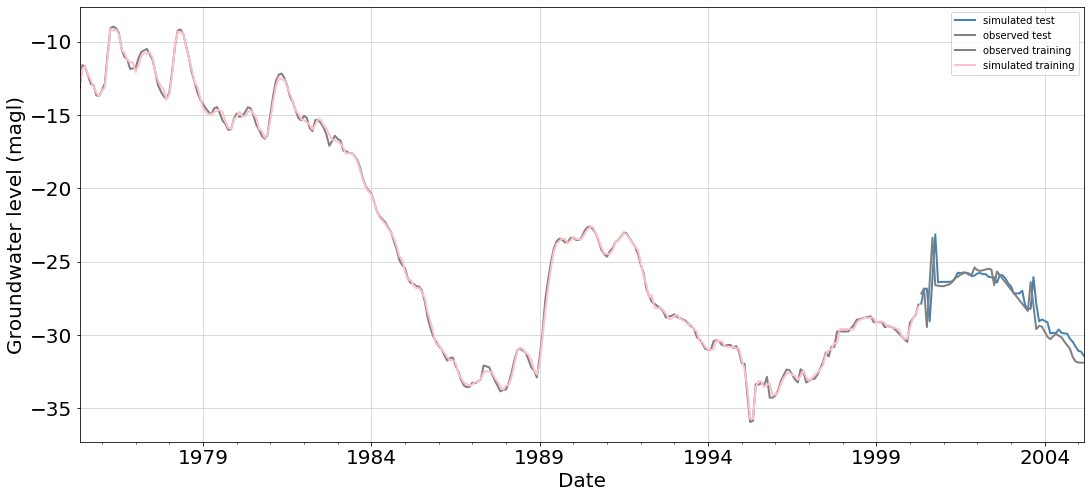

In [119]:
mse_gb  = summary['mse_gb'].mean(axis=0)
rmse_gb = summary['rmse_gb'].mean(axis=0)
mae_gb  = summary['mae_gb'].mean(axis=0)
r2_gb   = summary['r2_gb'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_gb, 3))
print("Mean squared error is:",round(mse_gb,3))
print("Root mean squared error is:",round(rmse_gb, 3))
print("Mean absolute error is:",round(mae_gb,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[300:359].index)
df1['observed test']      = pima.iloc[300:359, 0].values

df2 = pd.DataFrame(pima.iloc[0:300, 0].values, columns = ['observed training'],index =pima.iloc[0:300].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### Randon Forest

In [120]:
from sklearn.ensemble import RandomForestRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_rf', 'rmse_rf', 'r2_rf','mae_rf'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)



    rf = RandomForestRegressor(n_estimators=10)
    rf.fit(X_train, y_train)
    y_rf = rf.predict(X_test)

    #metrics for test
    y_rf= y_rf
    test_pred.append(y_rf)
    mse_rf= mean_squared_error(y_test, y_rf)
    rmse_rf= np.sqrt(mse_rf)
    r2_rf= r2_score(y_test, y_rf)
    mae_rf= mean_absolute_error(y_test, y_rf)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_rf,Round), round(rmse_rf,Round), round(r2_rf,Round),round(mae_rf,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(300, 6)
Running fold 2
(300, 6)
Running fold 3
(300, 6)
Running fold 4
(300, 6)
Running fold 5
(300, 6)
Running fold 6
(300, 6)
Running fold 7
(300, 6)
Running fold 8
(300, 6)
Running fold 9
(300, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-

Running fold 10
(300, 6)


In [121]:
summary

Iteration_No  mse_rf  rmse_rf  r2_rf  mae_rf
0   Iteration_1   0.861    0.928  0.808   0.545
1   Iteration_2   0.934    0.966  0.792   0.604
2   Iteration_3   0.904    0.951  0.799   0.623
3   Iteration_4   0.942    0.971  0.790   0.639
4   Iteration_5   0.959    0.979  0.786   0.602
5   Iteration_6   0.941    0.970  0.790   0.610
6   Iteration_7   0.956    0.978  0.787   0.591
7   Iteration_8   1.166    1.080  0.740   0.756
8   Iteration_9   0.941    0.970  0.790   0.613
9  Iteration_10   0.929    0.964  0.793   0.627

In [122]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:300, 6].values

In [123]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.054
Root mean squared error is: 0.232
Mean absolute error is: 0.178
R^2 score is:  0.999

The model performance for the test set
--------------------------------------
R^2 score is:  0.788
Mean squared error is: 0.953
Root mean squared error is: 0.976
Mean absolute error is: 0.621


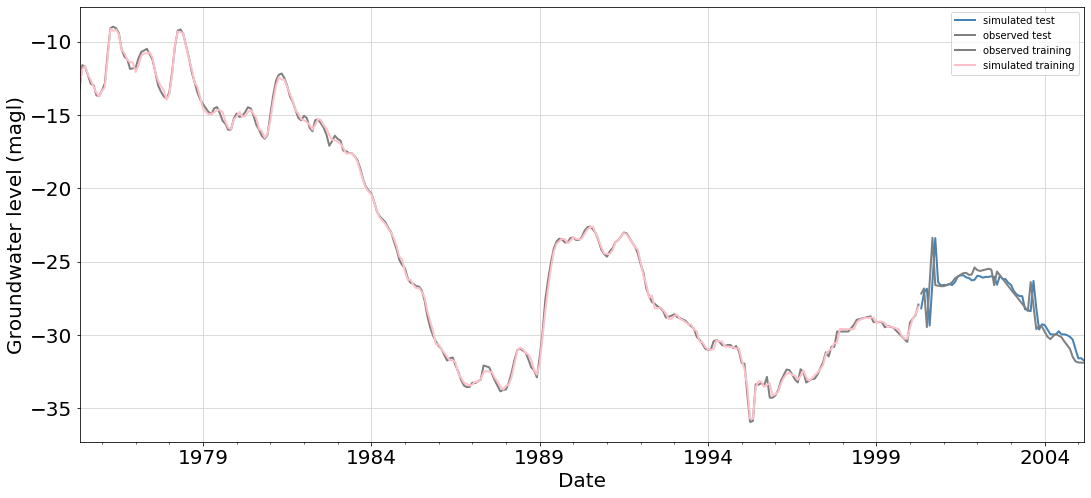

In [124]:
mse_rf  = summary['mse_rf'].mean(axis=0)
rmse_rf = summary['rmse_rf'].mean(axis=0)
mae_rf  = summary['mae_rf'].mean(axis=0)
r2_rf   = summary['r2_rf'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_rf, 3))
print("Mean squared error is:",round(mse_rf,3))
print("Root mean squared error is:",round(rmse_rf, 3))
print("Mean absolute error is:",round(mae_rf,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[300:359].index)
df1['observed test']      = pima.iloc[300:359, 0].values

df2 = pd.DataFrame(pima.iloc[0:300, 0].values, columns = ['observed training'],index =pima.iloc[0:300].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [125]:
vs = pd.DataFrame(pima.iloc[300:359, 0].values, columns = ['Observed'],index =pima.iloc[300:359].index)
vs['SVR'] = y_svr
vs['GB'] = y_gb
vs['RF'] = y_rf
vs['DC'] = y_dc
vs['LSTM'] = y_lstm
vs['GRU'] = y_gru

Text(0, 0.5, 'Groundwater levels (magl)')

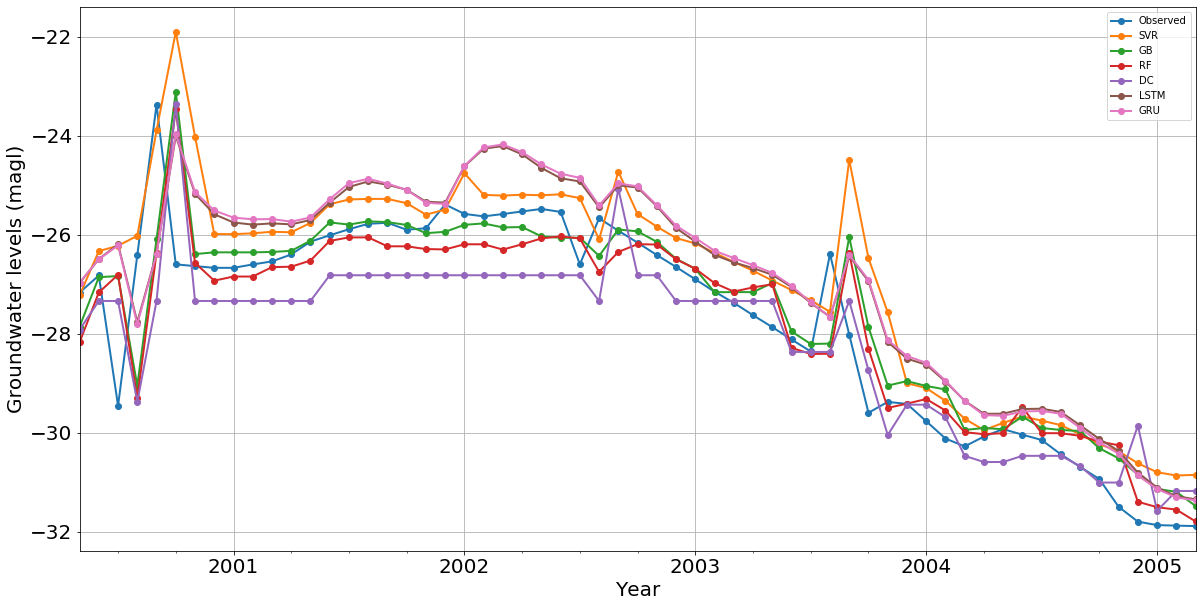

In [126]:
vs.plot(figsize=(20,10), linewidth=2, fontsize = 20, grid=True, marker='o')
plt.xlabel("Year",fontsize=20)
plt.ylabel("Groundwater levels (magl)",fontsize=20)